## **Problem Statement**:

Sebuah perusahaan level multinasional yang memiliki jumlah pegawai dalam skala besar, ingin melebarkan usaha bisnisnya dengan membuka cabang di beberapa lokasi yang baru. Oleh karena itu, perusahaan yang melihat pegawainya sebagai aset (*talent*) ingin melakukan proses promosi kepada seluruh pegawainya yang nantinya akan menduduki jabatan satu tingkat di atas jabatan sebelumnya sesuai dengan departmennya masing-masing. Proses penentuan promosi jabatan akan diumumkan setelah pegawai melewati periode pelatihan dan evaluasi. Program pelatihan dan evaluasi ini bertujuan untuk pengembangan kemampuan pegawai. Dan apabila pegawai pada akhirnya dipromosikan, budaya perusahaan tetap terjaga di tempat yang baru.

Proses pemilihan kandidat pegawai yang akan dipromosi:
1. Perusahaan mengidentifikasi data pegawai berdasarkan rekomendasi dan kinerja.
2. Pegawai yang terpilih akan menjalani program pelatihan dan evaluasi secara terpisah untuk masing-masing departmennya. Program ini berlandaskan pada kemampuan yang dibutuhkan dari setiap departemen.
3. Di akhir program, berdasarkan berbagai faktor seperti kinerja pelatihan, dll., seorang pegawai akan menjadi kandidat untuk dipromosikan.

## **Goals**:

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pegawai yang akan dipromosikan pada perusahaan tersebut atau tidak, sehingga perusahaan dapat memfokuskan untuk mempersiapkan test assesment untuk kandidat pegawai yang direkomendasi oleh model dan proses promosi pegawai yang akan diumumkan pada tahap akhir. Limitasi model yang akan digunakan untuk memprediksi promosi pegawai (di bawah C-Level).
Dan juga, perusahaan ingin mengetahui faktor apa yang membuat seorang pegawai dipromosi atau tidak, sehingga perusahaan dapat membuat rencana/program yang lebih baik dalam mempromosikan pegawai potensial.

## **Metrics**

0 : Tidak Promosi Jabatan

1 : Promosi Jabatan

Type 1 error : False Positive  
Konsekuensi : Sia-sianya biaya, waktu dan tenaga test assesment dikarenakan karyawan yang mendapatkan promosi bukan dari karyawan yang sangat berpotensi.

Type 2 error : False Negative  
Konsekuensi: Karyawan yang berpotensi di prediksi tidak mendapatkan promosi.

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang efisien yang dapat mengurangi waktu dan tenaga. Namun juga membuat model tanpa membuat hilangnya pegawai potensial yang akan memegang tanggung jawab lebih besar dari sebelumnya. Maka dari itu, nilai recall dan precision berdasarkan kelas positivenya perlu untuk diseimbangkan. Sehingga metric utama yang akan digunakan adalah `f1-score`.

## **Analytical Approach**

Kami akan menggunakan pendekatan berbasis data (*data-driven*) untuk memprediksi apakah pegawai akan direkomendasi untuk promosi atau tidak. Prediksi kami berdasarkan pada informasi terkait demografi, pendidikan terakhir, kinerja, dan fitur lainnya yang ada pada pegawai.
 
Selanjutnya, kami akan melakukan analisis data untuk menemukan pola yang membedakan pegawai yang akan dipromosikan dan tidak dipromosikan jabatannya.

Kemudian, kami akan mengembangkan model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pegawai yang akan dipromosikan di perusahaan tersebut atau tidak.

## **Define Columns**

| **Nama Kolom** |**Keterangan Kolom** |
| --- | --- |
|CustomerID| ID unik yang mengidentifikasi setiap pelanggan|
|Employee_id | Unique ID for employee|
|Department | Department of employee|
|Region | Regio R of employment (unordered)|
|Education | Edu cationELevel|
|Gender | Gender of Employee|
|Recruitment_channel | Channel of recruitment for employee
|No_ of_ trainings | No of other trainings completed in previous year on soft skills, technical skills etc|
|Age | Age of Employee
|Previous_ year_ rating | Employee Rating for the previous year|
|Length_ of_ service | Length of service in years|
|Awards_ won? | If awards won during previous year then 1 else 0|
|Avg_ training_ score | Average score in current training evaluations|
|Is_promoted|(Target) Recommended for promotion|

# **2. DATA WRANGLING**

In [1]:
# Library
import pandas as pd # Pandas Library 
import numpy as np # Numpy Library

# Visualization
import matplotlib.pyplot as plt # For Data Visualization
import seaborn as sns # For Data Visualization

# Feature Engineering
from sklearn.pipeline import Pipeline # to Create a Pipeline for Feature Engineering
from sklearn.impute import SimpleImputer # For Missing Value Handling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder # to Handle Catogorical Features
from sklearn.compose import ColumnTransformer # to Transform Features
import category_encoders as ce # to encode category features

# Model Selection
from sklearn.linear_model import LogisticRegression # Base Model for Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Base Model for Decision Tree 
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV , GridSearchCV# Finding Best Hyperparameter with GridsearchCV
from sklearn.metrics import classification_report, confusion_matrix # to Display Classification Report and Confusion Matrix
from sklearn.neighbors import KNeighborsClassifier # Base Model for KNN
from sklearn.ensemble import RandomForestClassifier # Ensemble method using Random Forest
from xgboost import XGBClassifier # Ensemble method using XGBoost
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score # Evaluation Metric

# Imbalance Dataset
from imblearn.pipeline import Pipeline # to Create Pipeline for Imbalance Handling
from imblearn.over_sampling import RandomOverSampler, SMOTE # Random Over Sample as Imblance Handling method
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

# Ignore Warning
import warnings 
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('employeepromotiondata.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [3]:
df.shape

(54808, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000


In [7]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
round(df.isna().sum()*100/len(df),2)

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  awards_won?           48660 non-null  int64  
 11  avg_training_score    48660 non-null  int64  
 12  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.2+ MB


In [11]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [12]:
round(df.isna().sum()*100/len(df),2)

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

array([[<AxesSubplot:title={'center':'employee_id'}>,
        <AxesSubplot:title={'center':'no_of_trainings'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'previous_year_rating'}>,
        <AxesSubplot:title={'center':'length_of_service'}>,
        <AxesSubplot:title={'center':'awards_won?'}>],
       [<AxesSubplot:title={'center':'avg_training_score'}>,
        <AxesSubplot:title={'center':'is_promoted'}>, <AxesSubplot:>]],
      dtype=object)

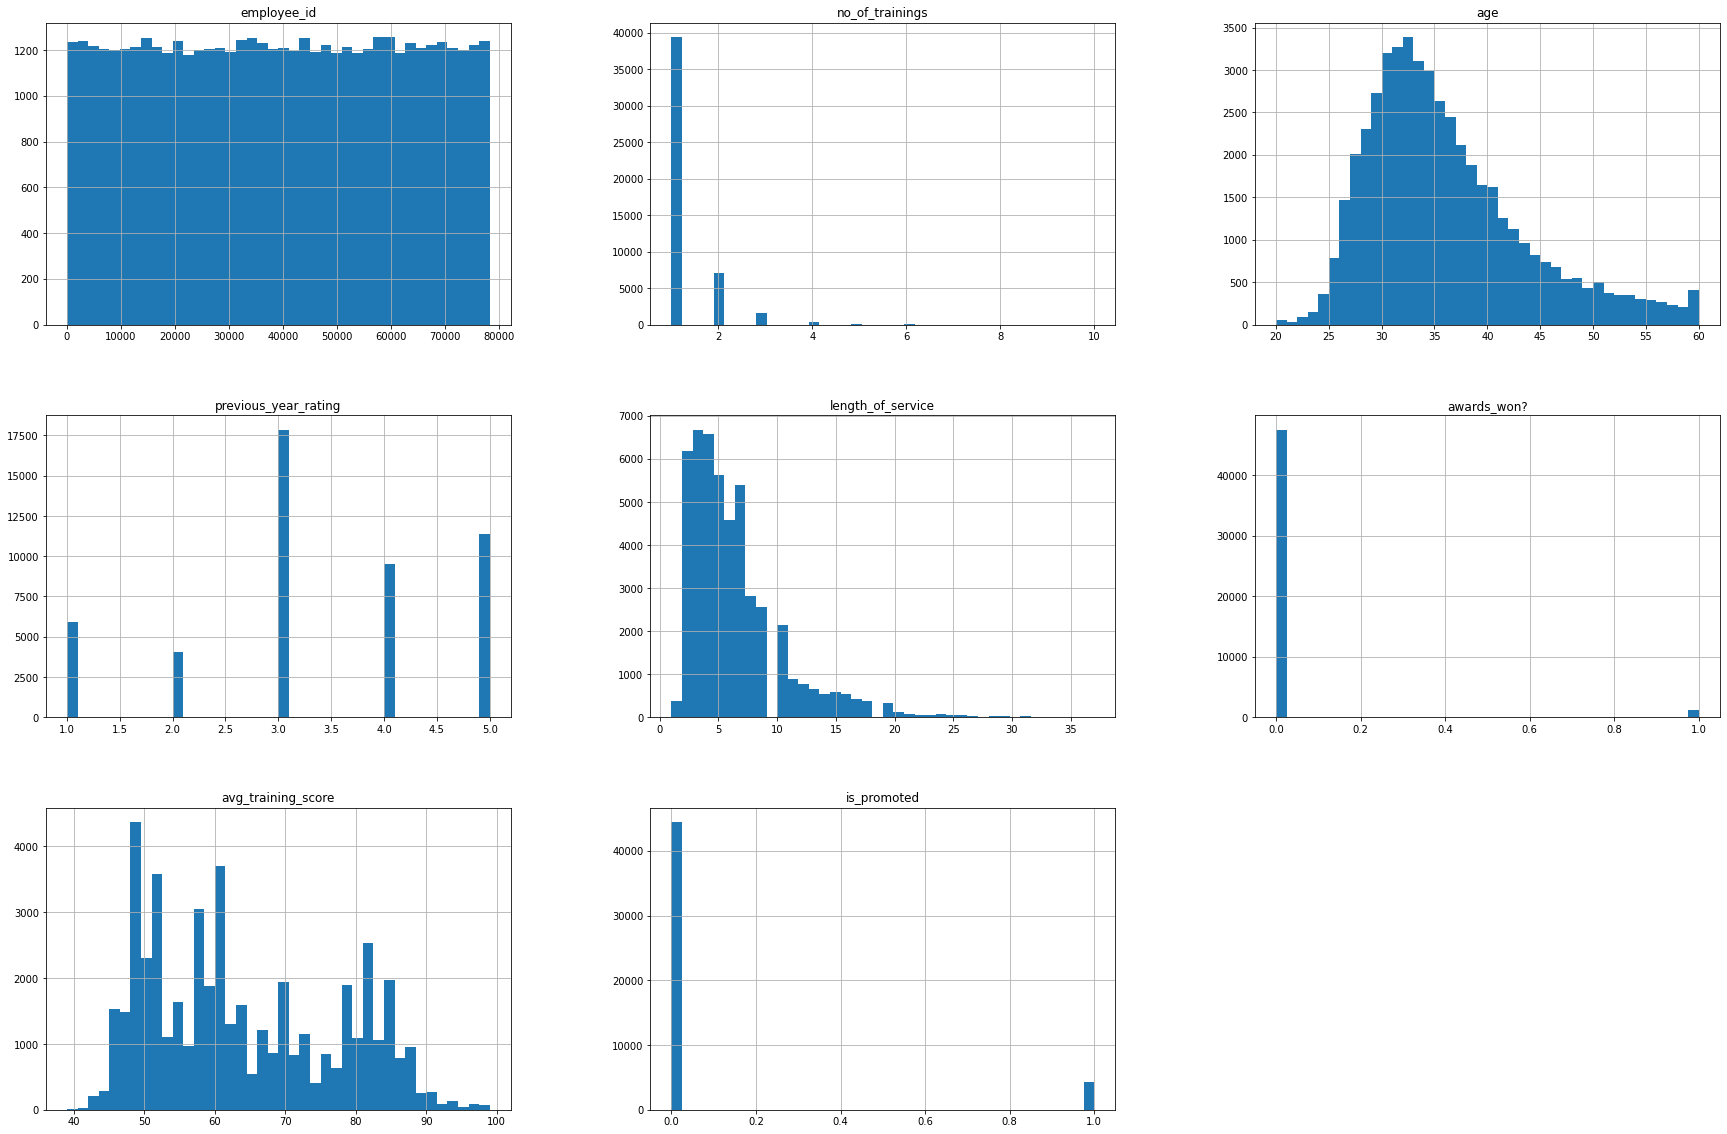

In [13]:
df.hist(bins=40,figsize=(30,20))

##### Cleaning

In [14]:
df.drop(columns=['employee_id'],inplace=True)

In [15]:
df['avg_training_score'].unique()

array([49, 60, 50, 73, 85, 59, 63, 83, 54, 80, 84, 77, 51, 46, 75, 68, 79,
       72, 61, 58, 87, 47, 57, 52, 88, 71, 48, 65, 62, 53, 78, 44, 91, 82,
       69, 74, 86, 90, 92, 67, 89, 56, 76, 81, 70, 45, 55, 39, 94, 93, 64,
       66, 95, 42, 96, 40, 99, 43, 97, 41, 98], dtype=int64)

In [16]:
def avgscore(x):
    if x > 0 and x <60:
        return 'Low'
    elif x > 60 and x <80 :
        return 'Good'
    else :
        return 'Excellent'

In [17]:
df['avg_training_score_range'] = df['avg_training_score']

In [18]:
df['avg_training_score_range'] = df['avg_training_score_range'].apply(avgscore)

In [19]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,avg_training_score_range
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,Low
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,Excellent
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,Low
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,Low
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,Good


In [20]:
df.to_csv('employeepromotiondata_visualization.csv')

# **3. DATA ANALYST**

In [21]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,avg_training_score_range
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,Low
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,Excellent
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,Low
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,Low
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,Good


In [22]:
total = float(len(df))

#### **Promoted**

In [23]:
pd.crosstab(index=df['is_promoted'],columns='count')

col_0,count
is_promoted,
0,44428
1,4232


In [24]:
pd.crosstab(index=df['is_promoted'],columns='count',normalize=True).round(2)

col_0,count
is_promoted,
0,0.91
1,0.09


#### **Department**

In [25]:
pd.crosstab(index=df['department'],columns='Jumlah').sort_values(by='Jumlah',ascending=False)

col_0,Jumlah
department,
Sales & Marketing,14239
Operations,10547
Procurement,6641
Technology,6502
Analytics,4610
Finance,2219
HR,2142
R&D,893
Legal,867


In [26]:
pd.crosstab(index=df['department'],columns='Jumlah',normalize=True).round(2).sort_values(by='Jumlah',ascending=False)

col_0,Jumlah
department,
Sales & Marketing,0.29
Operations,0.22
Procurement,0.14
Technology,0.13
Analytics,0.09
Finance,0.05
HR,0.04
Legal,0.02
R&D,0.02


- Insight :
  - Banyak karyawan berasal dari departement `Sales & Marketing` dengan total karyawan 14.239 dengan total persentase 29% dari keseluruhan karyawan yang ada di perusahaan paling banyak dari departement `Sales & Marketing`.

#### **Department & Promoted**

In [27]:
pd.crosstab(index=df['department'],columns=df['is_promoted']).sort_values(1,ascending=False)

is_promoted,0,1
department,,
Sales & Marketing,13179,1060
Operations,9568,979
Technology,5808,694
Procurement,5990,651
Analytics,4165,445
Finance,2037,182
HR,2021,121
R&D,835,58
Legal,825,42


In [28]:
pd.crosstab(index=df['department'],columns=df['is_promoted'],normalize=True).round(2).sort_values(1,ascending=False)

is_promoted,0,1
department,,
Operations,0.20,0.02
Sales & Marketing,0.27,0.02
Analytics,0.09,0.01
Procurement,0.12,0.01
Technology,0.12,0.01
Finance,0.04,0.00
HR,0.04,0.00
Legal,0.02,0.00
R&D,0.02,0.00


#### **Visualization Department & Promoted**

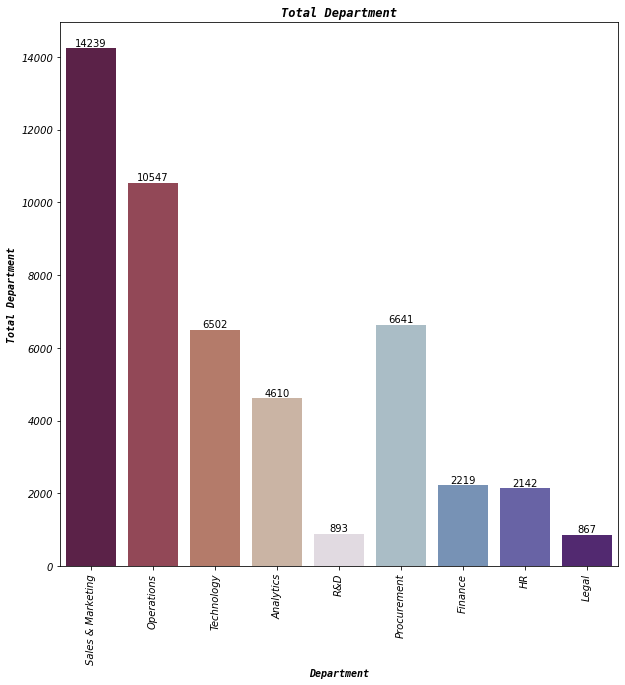

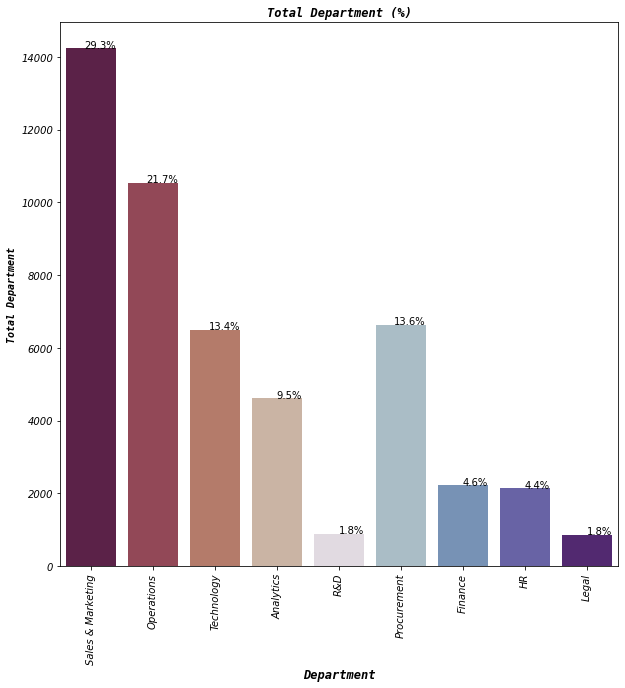

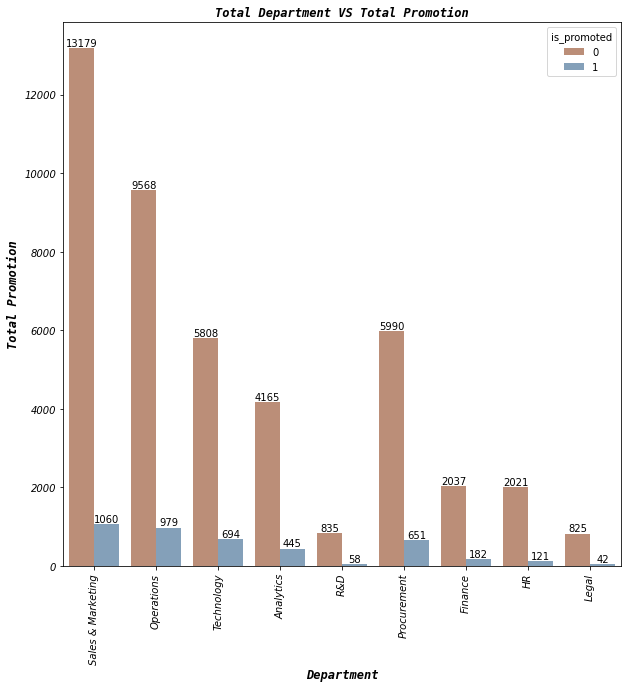

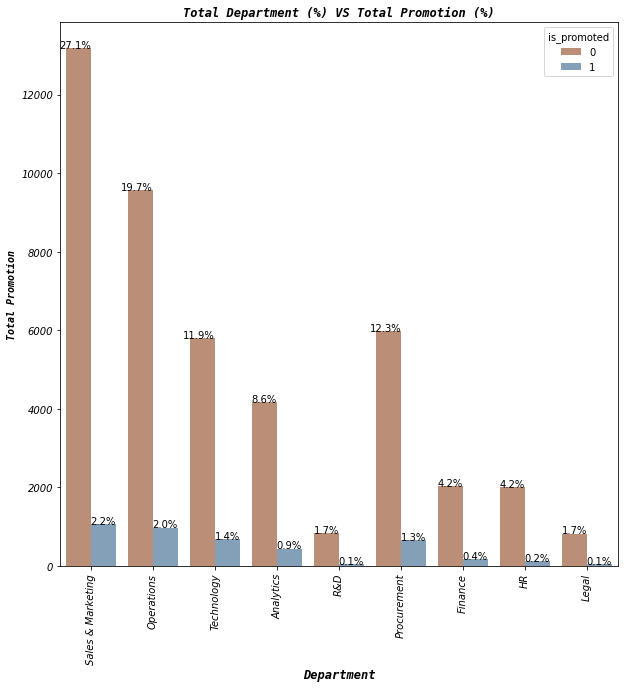

In [29]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x='department', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic',rotation = 90)
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Department',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Department', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Department', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,10))
ax = sns.countplot(x="department",data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic',rotation = 90)
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Total Department (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Department', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Department', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(10,10))
ax = sns.countplot(x='department', data=df, hue="is_promoted", palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic',rotation = 90)
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Department VS Total Promotion',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Department', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Promotion', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,10))
ax = sns.countplot(x="department", hue="is_promoted", data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic',rotation=90)
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Total Department (%) VS Total Promotion (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Department', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Promotion', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Dari seluruh karyawan yang ada diperusahaan paling banyak berasal dari department `Operations` dan department `Sales & Marketing` mendapatkan promosi dengan total persentase 2% dari kedua department.

#### **Previous Year Rating** 

In [30]:
pd.crosstab(index=df['previous_year_rating'],columns='count').sort_values(by='count',ascending=False)

col_0,count
previous_year_rating,
3.0,17867
5.0,11362
4.0,9509
1.0,5887
2.0,4035


In [31]:
pd.crosstab(index=df['previous_year_rating'],columns='count',normalize=True).round(2).sort_values(by='count',ascending=False)

col_0,count
previous_year_rating,
3.0,0.37
5.0,0.23
4.0,0.20
1.0,0.12
2.0,0.08


#### **Previous Year Rating & Promoted** 

In [32]:
pd.crosstab(index=df['previous_year_rating'],columns=df['is_promoted']).sort_values(1,ascending=False)

is_promoted,0,1
previous_year_rating,,
5.0,9487,1875
3.0,16542,1325
4.0,8742,767
2.0,3856,179
1.0,5801,86


In [33]:
pd.crosstab(index=df['previous_year_rating'],columns=df['is_promoted'],normalize=True).round(2).sort_values(1,ascending=False)

is_promoted,0,1
previous_year_rating,,
5.0,0.19,0.04
3.0,0.34,0.03
4.0,0.18,0.02
1.0,0.12,0.00
2.0,0.08,0.00


#### **Previous Year Rating & Department** 

In [34]:
analisa_1 = pd.crosstab(index=[df['previous_year_rating'],df['department']],columns=df['is_promoted']).sort_values(1,ascending=False)
analisa_1_1 = analisa_1[[1]]
analisa_1_1.head()

is_promoted                               1
previous_year_rating department            
5.0                  Operations         470
                     Sales & Marketing  369
3.0                  Sales & Marketing  351
5.0                  Procurement        324
3.0                  Operations         320

#### **Visualization Previous Year Rating , Promoted & Department** 

In [35]:
analisa_1_1_1 = pd.crosstab(index=[df['previous_year_rating'],df['department']],columns=df['is_promoted'],normalize=True).round(2)
analisa_1_1_1[[1]].sort_values(1,ascending=False)

is_promoted                                1
previous_year_rating department             
3.0                  Operations         0.01
                     Sales & Marketing  0.01
5.0                  Sales & Marketing  0.01
                     Procurement        0.01
                     Operations         0.01
4.0                  Sales & Marketing  0.01
5.0                  Technology         0.01
1.0                  Sales & Marketing  0.00
4.0                  Technology         0.00
                     Finance            0.00
                     HR                 0.00
                     Legal              0.00
                     Operations         0.00
                     Procurement        0.00
                     R&D                0.00
1.0                  Procurement        0.00
5.0                  Analytics          0.00
1.0                  Technology         0.00
5.0                  Finance            0.00
                     HR                 0.00
                     Legal              0.00
1.0                  Operations         0.00
                     Legal              0.00
5.0                  R&D                0.00
1.0                  HR                 0.00
4.0                  Analytics          0.00
3.0                  Technology         0.00
1.0                  R&D                0.00
3.0                  R&D                0.00
2.0                  Analytics          0.00
                     Finance            0.00
                     HR                 0.00
                     Legal              0.00
                     Operations         0.00
                     Procurement        0.00
                     R&D                0.00
                     Sales & Marketing  0.00
                     Technology         0.00
3.0                  Analytics          0.00
                     Finance            0.00
                     HR                 0.00
                     Legal              0.00
1.0                  Finance            0.00
3.0                  Procurement        0.00
1.0                  Analytics          0.00

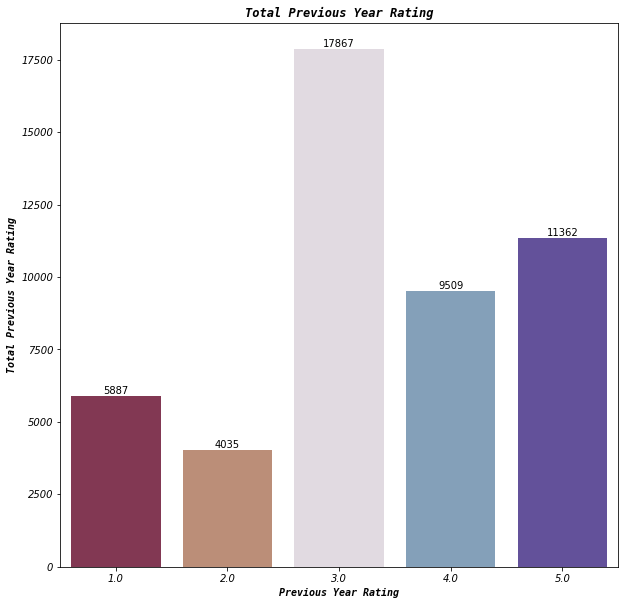

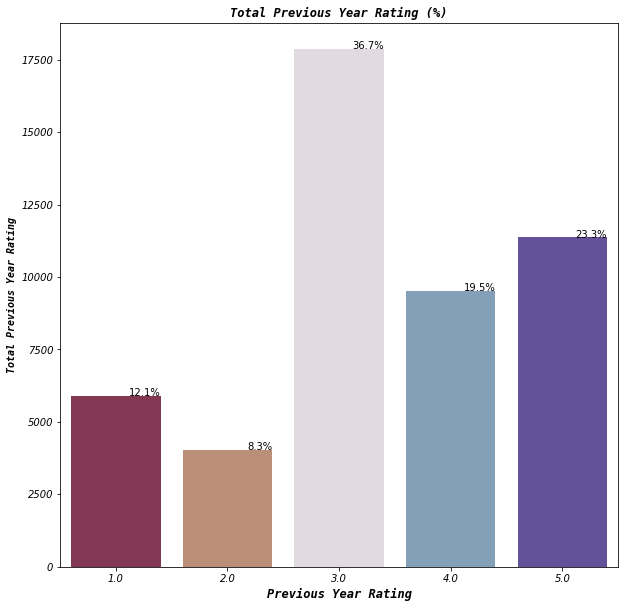

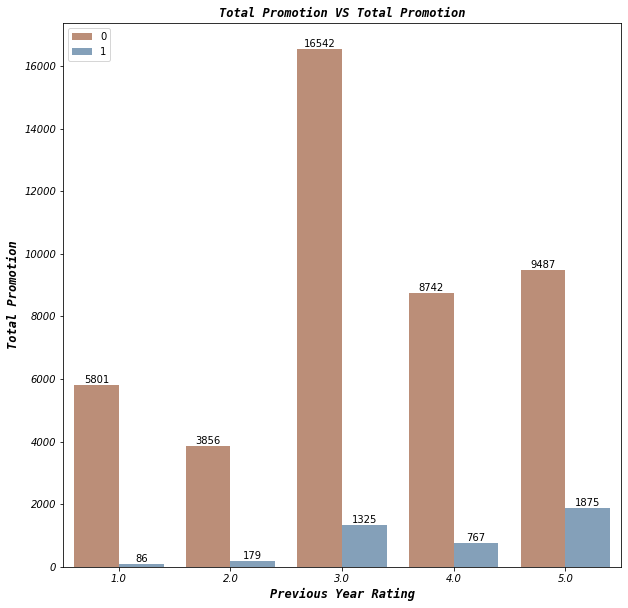

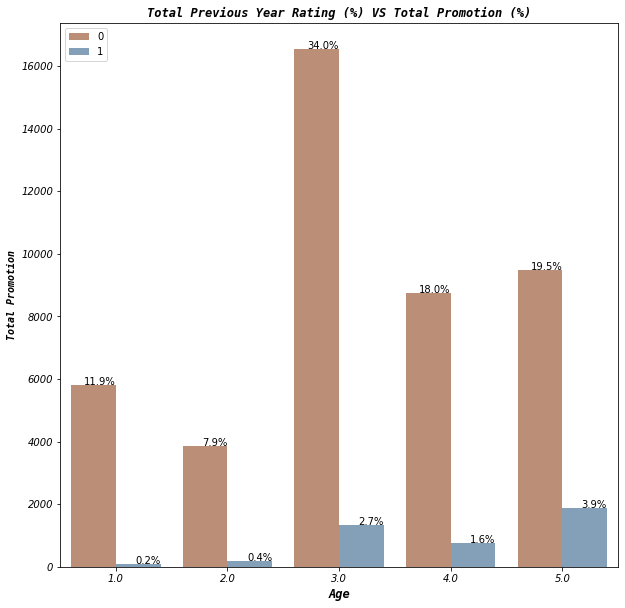

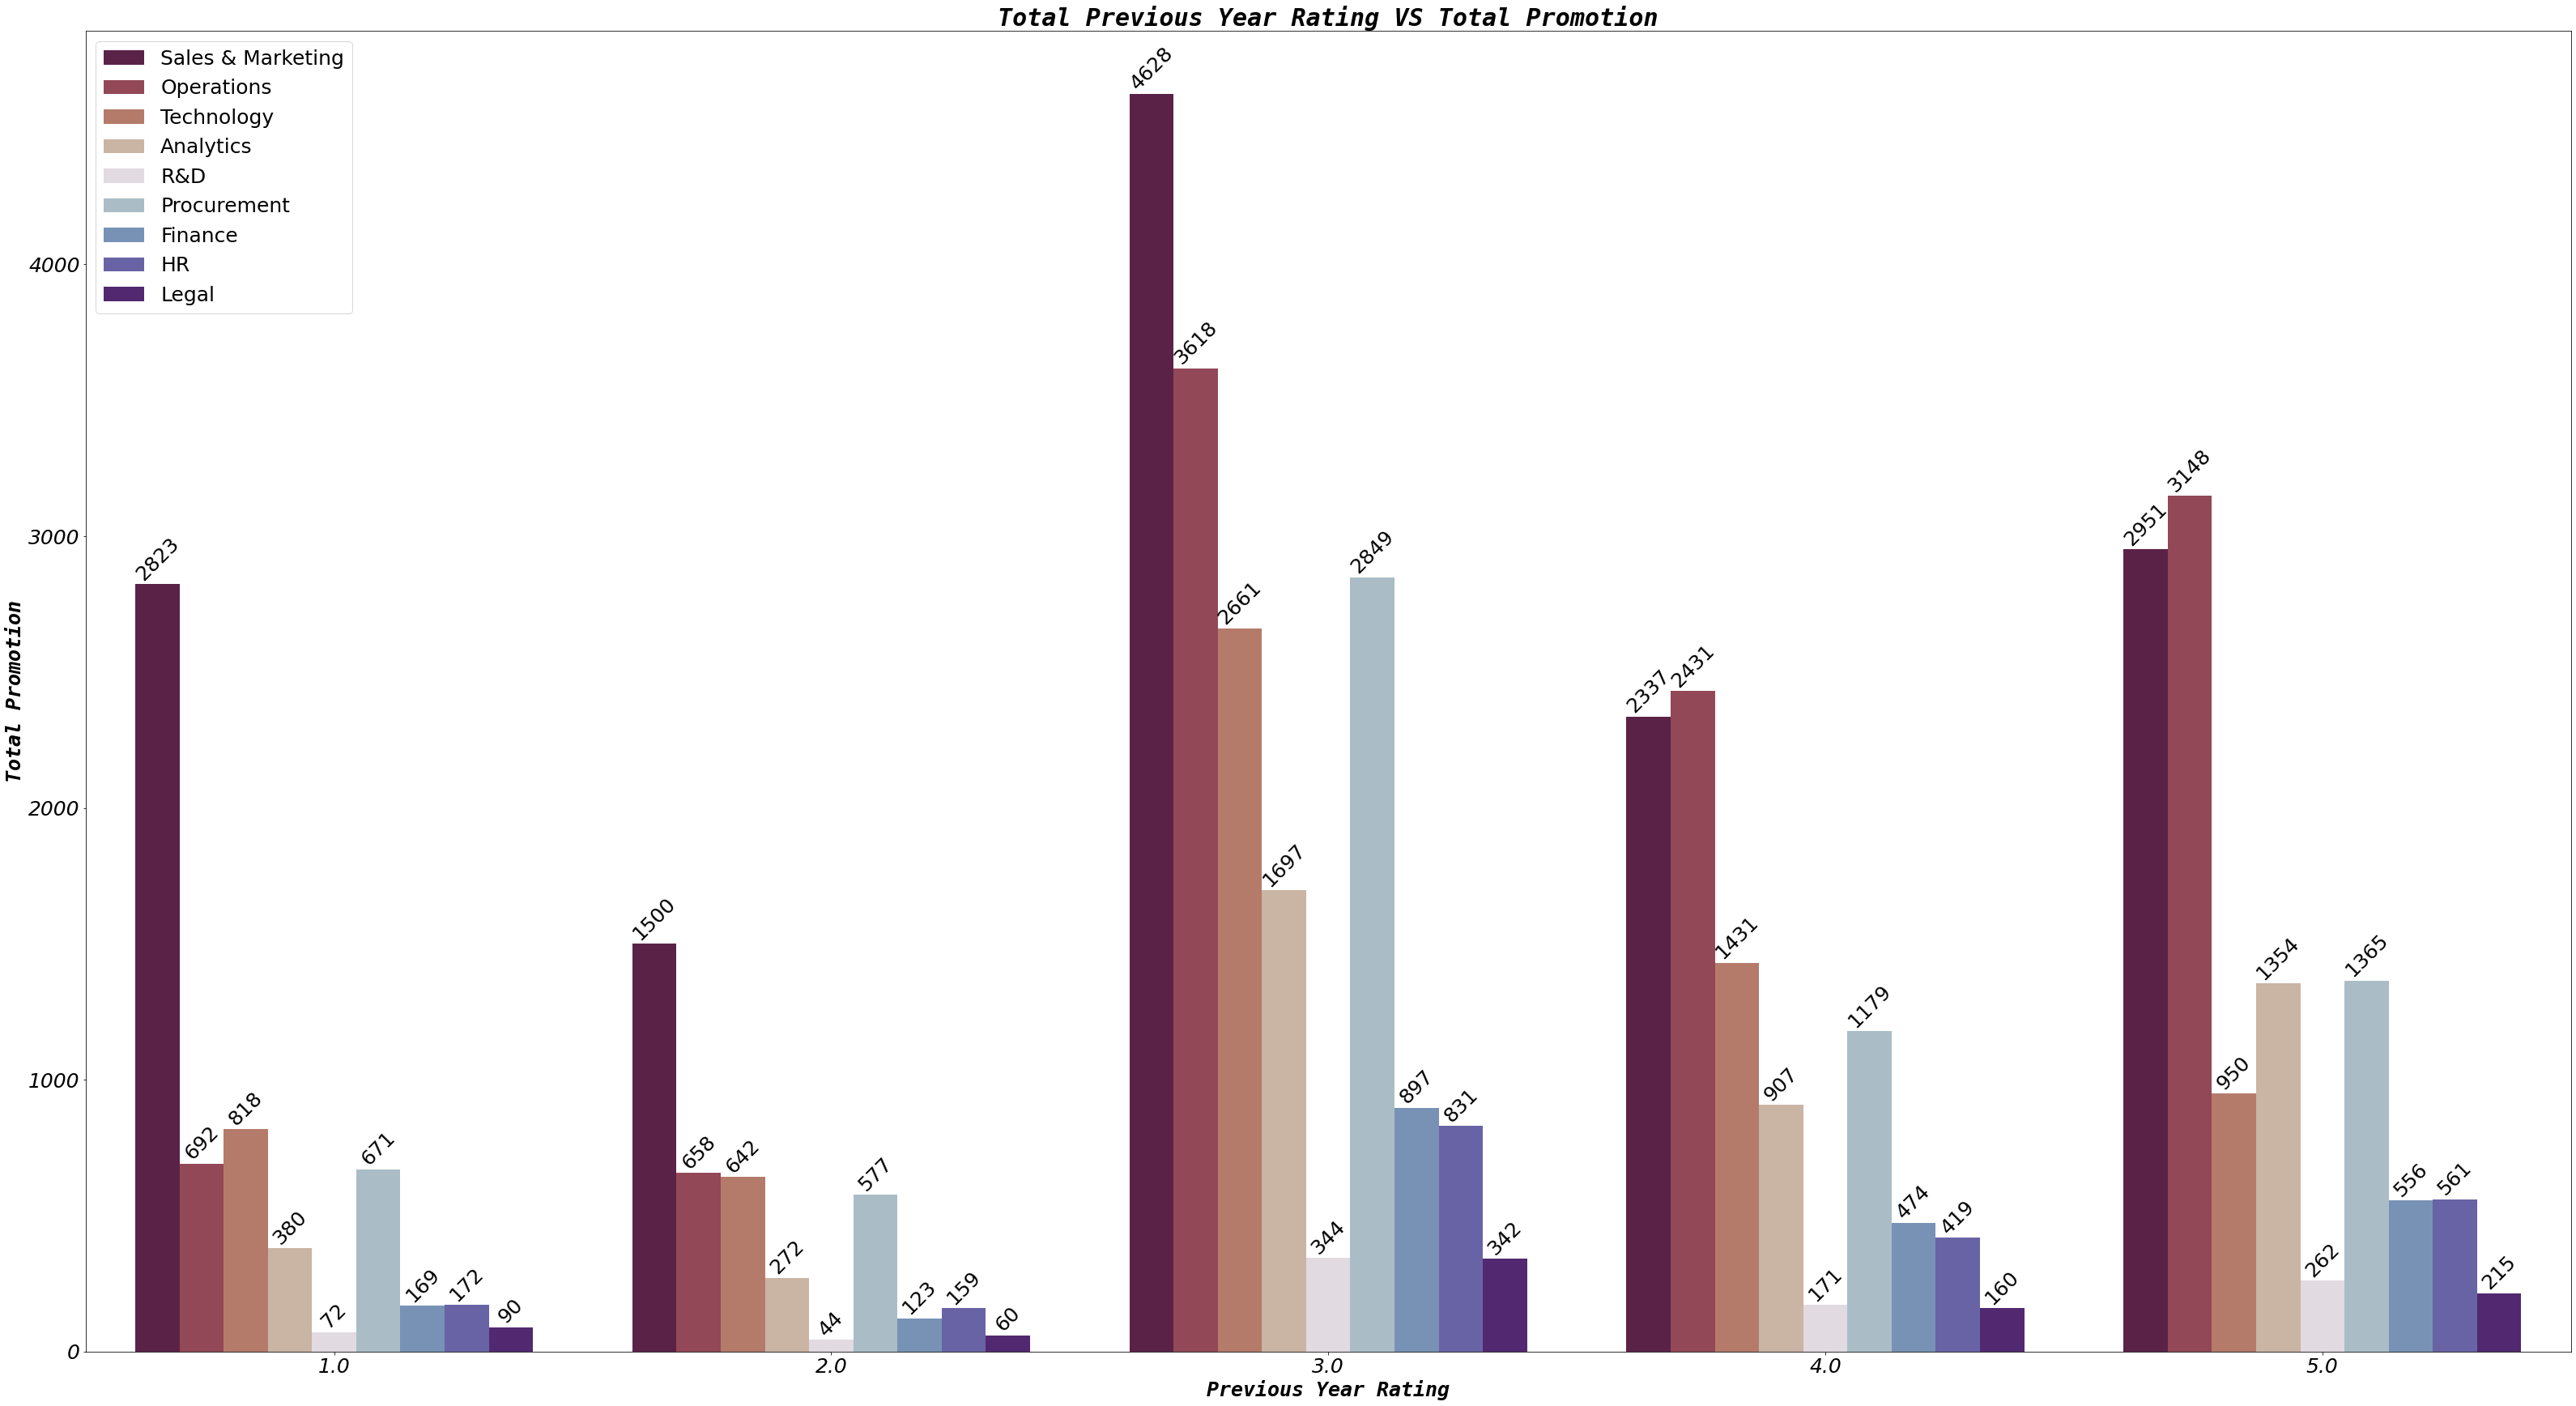

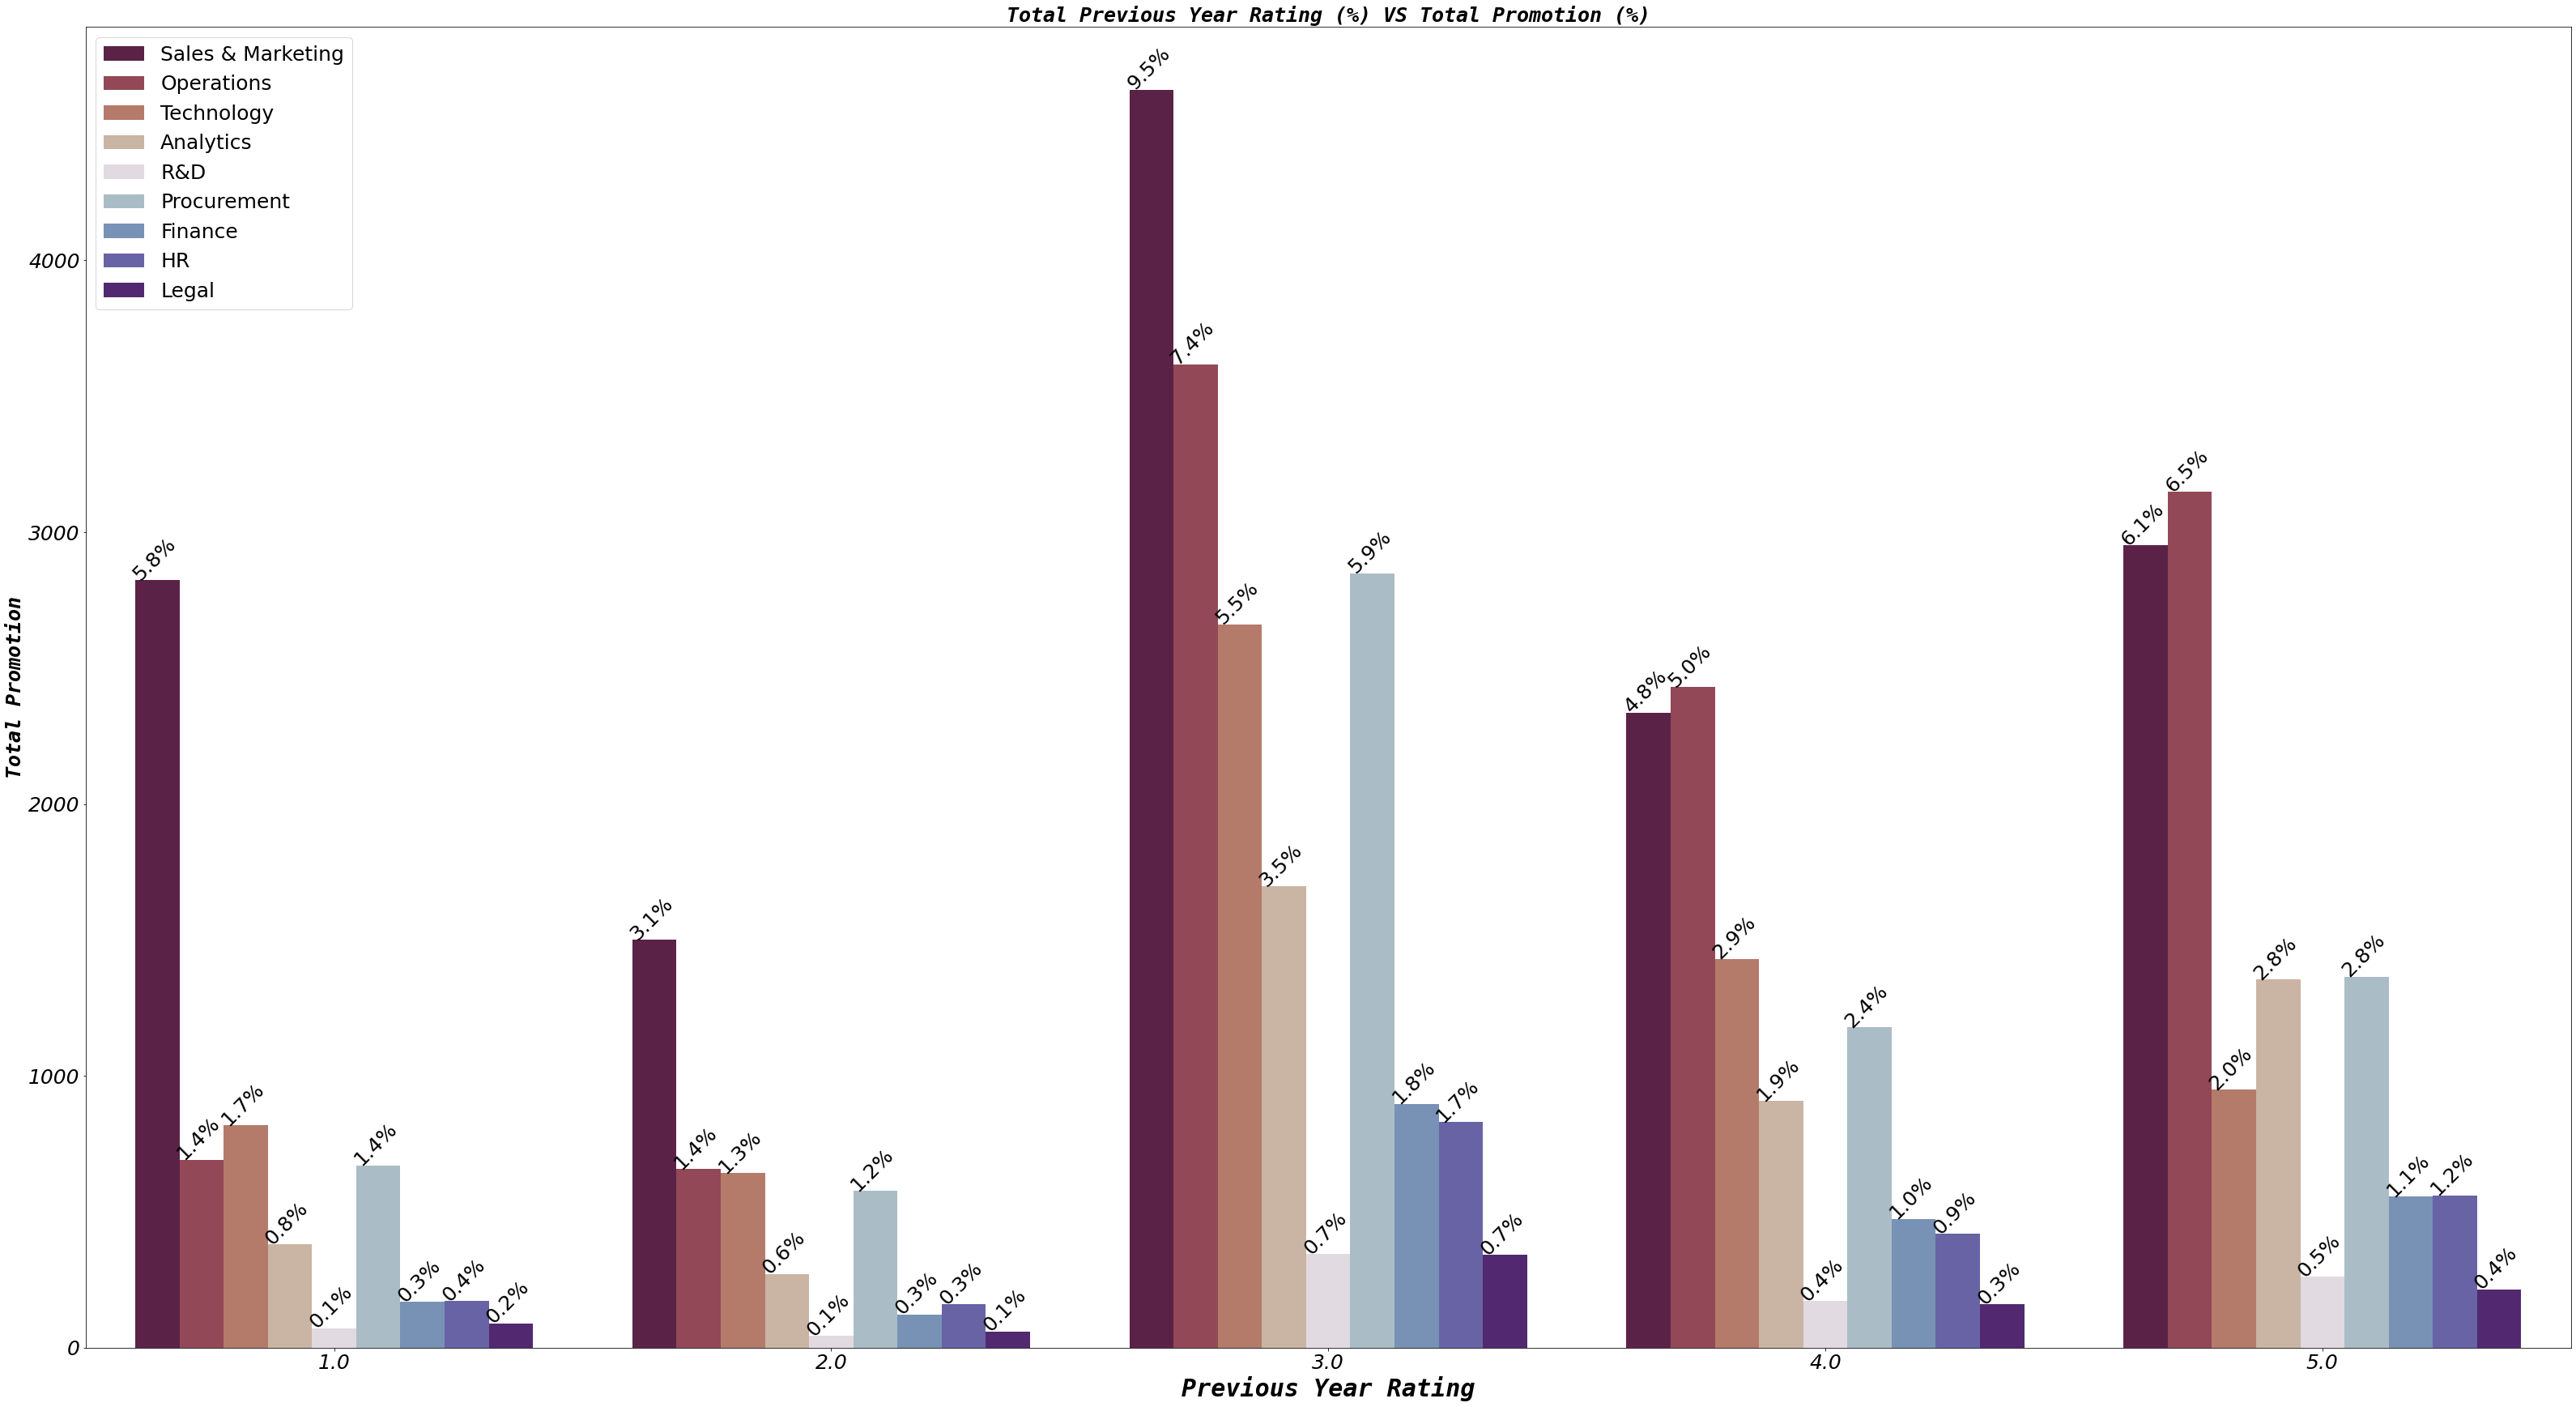

In [36]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x='previous_year_rating', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Previous Year Rating',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Previous Year Rating', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Total Previous Year Rating', size=10, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
# plt.legend(loc="upper left", fontsize=5)
plt.show()

plt.figure(figsize=(10,10))
ax = sns.countplot(x="previous_year_rating",data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Total Previous Year Rating (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Previous Year Rating', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Previous Year Rating', size=10, fontstyle='italic',family='monospace', weight=900)
# plt.legend(loc="upper left", fontsize=5)
plt.show()

plt.figure(figsize=(10,10))
ax = sns.countplot(x='previous_year_rating', data=df, hue="is_promoted", palette = 'twilight_shifted_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Promotion VS Total Promotion',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Previous Year Rating', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Promotion', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.legend(loc="upper left", fontsize=10)
plt.show()

plt.figure(figsize=(10,10))
ax = sns.countplot(x="previous_year_rating", hue="is_promoted", data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=10,fontstyle='italic')
    plt.yticks(size=10,fontstyle='italic')
    plt.title('Total Previous Year Rating (%) VS Total Promotion (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Age', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Promotion', size=10, fontstyle='italic',family='monospace', weight=900)
plt.legend(loc="upper left", fontsize=10)
plt.show()

plt.figure(figsize=(55,30))
ax = sns.countplot(x='previous_year_rating', data=df, hue="department", palette = 'twilight_shifted_r')
plt.xticks(size=25,fontstyle='italic')
plt.yticks(size=25,fontstyle='italic')
plt.title('Total Previous Year Rating VS Total Promotion',fontstyle='italic',fontsize=30,family='monospace', weight=900)
plt.xlabel('Previous Year Rating', fontstyle='italic', size=25, family='monospace',weight=900)
plt.ylabel('Total Promotion', size=25, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=25, horizontalalignment='left',rotation=45)
plt.legend(loc="upper left", fontsize=25)
plt.show()

plt.figure(figsize=(55,30))
ax = sns.countplot(x="previous_year_rating", hue="department", data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right',size=25, rotation=45)
    plt.xticks(size=25,fontstyle='italic')
    plt.yticks(size=25,fontstyle='italic')
    plt.title('Total Previous Year Rating (%) VS Total Promotion (%)',fontsize=25,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Previous Year Rating', fontstyle='italic', size=30, family='monospace',weight=900)
    plt.ylabel('Total Promotion', size=25, fontstyle='italic',family='monospace', weight=900)
plt.legend(loc="upper left", fontsize=25)
plt.show()

- Insight :
  - Karyawan yang mendapatkan promosi berasal dari karyawan yang mendapatkan `previous_year_rating` 5.0 dengan total 1.875 karyawan dan setara dengan 4%, dan karyawan yang paling banyak mendapatkan promosi berasal dari department `Operations` dan `Sales & Marketing` 

In [37]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,avg_training_score_range
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,Low
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,Excellent
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,Low
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,Low
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,Good


#### **Education**

In [38]:
pd.crosstab(index=df['education'],columns='count').sort_values(by='count',ascending=False).head()

col_0,count
education,
Bachelor's,33404
Master's & above,14798
Below Secondary,458


In [39]:
pd.crosstab(index=df['education'],columns='count',normalize=True).round(2).sort_values(by='count',ascending=False).head()

col_0,count
education,
Bachelor's,0.69
Master's & above,0.30
Below Secondary,0.01


In [40]:
pd.crosstab(index=df['education'],columns=df['is_promoted']).sort_values(1,ascending=False).head()

is_promoted,0,1
education,,
Bachelor's,30671,2733
Master's & above,13335,1463
Below Secondary,422,36


In [41]:
pd.crosstab(index=df['education'],columns=df['is_promoted'],normalize=True).round(2).sort_values(1,ascending=False).head()

is_promoted,0,1
education,,
Bachelor's,0.63,0.06
Master's & above,0.27,0.03
Below Secondary,0.01,0.00


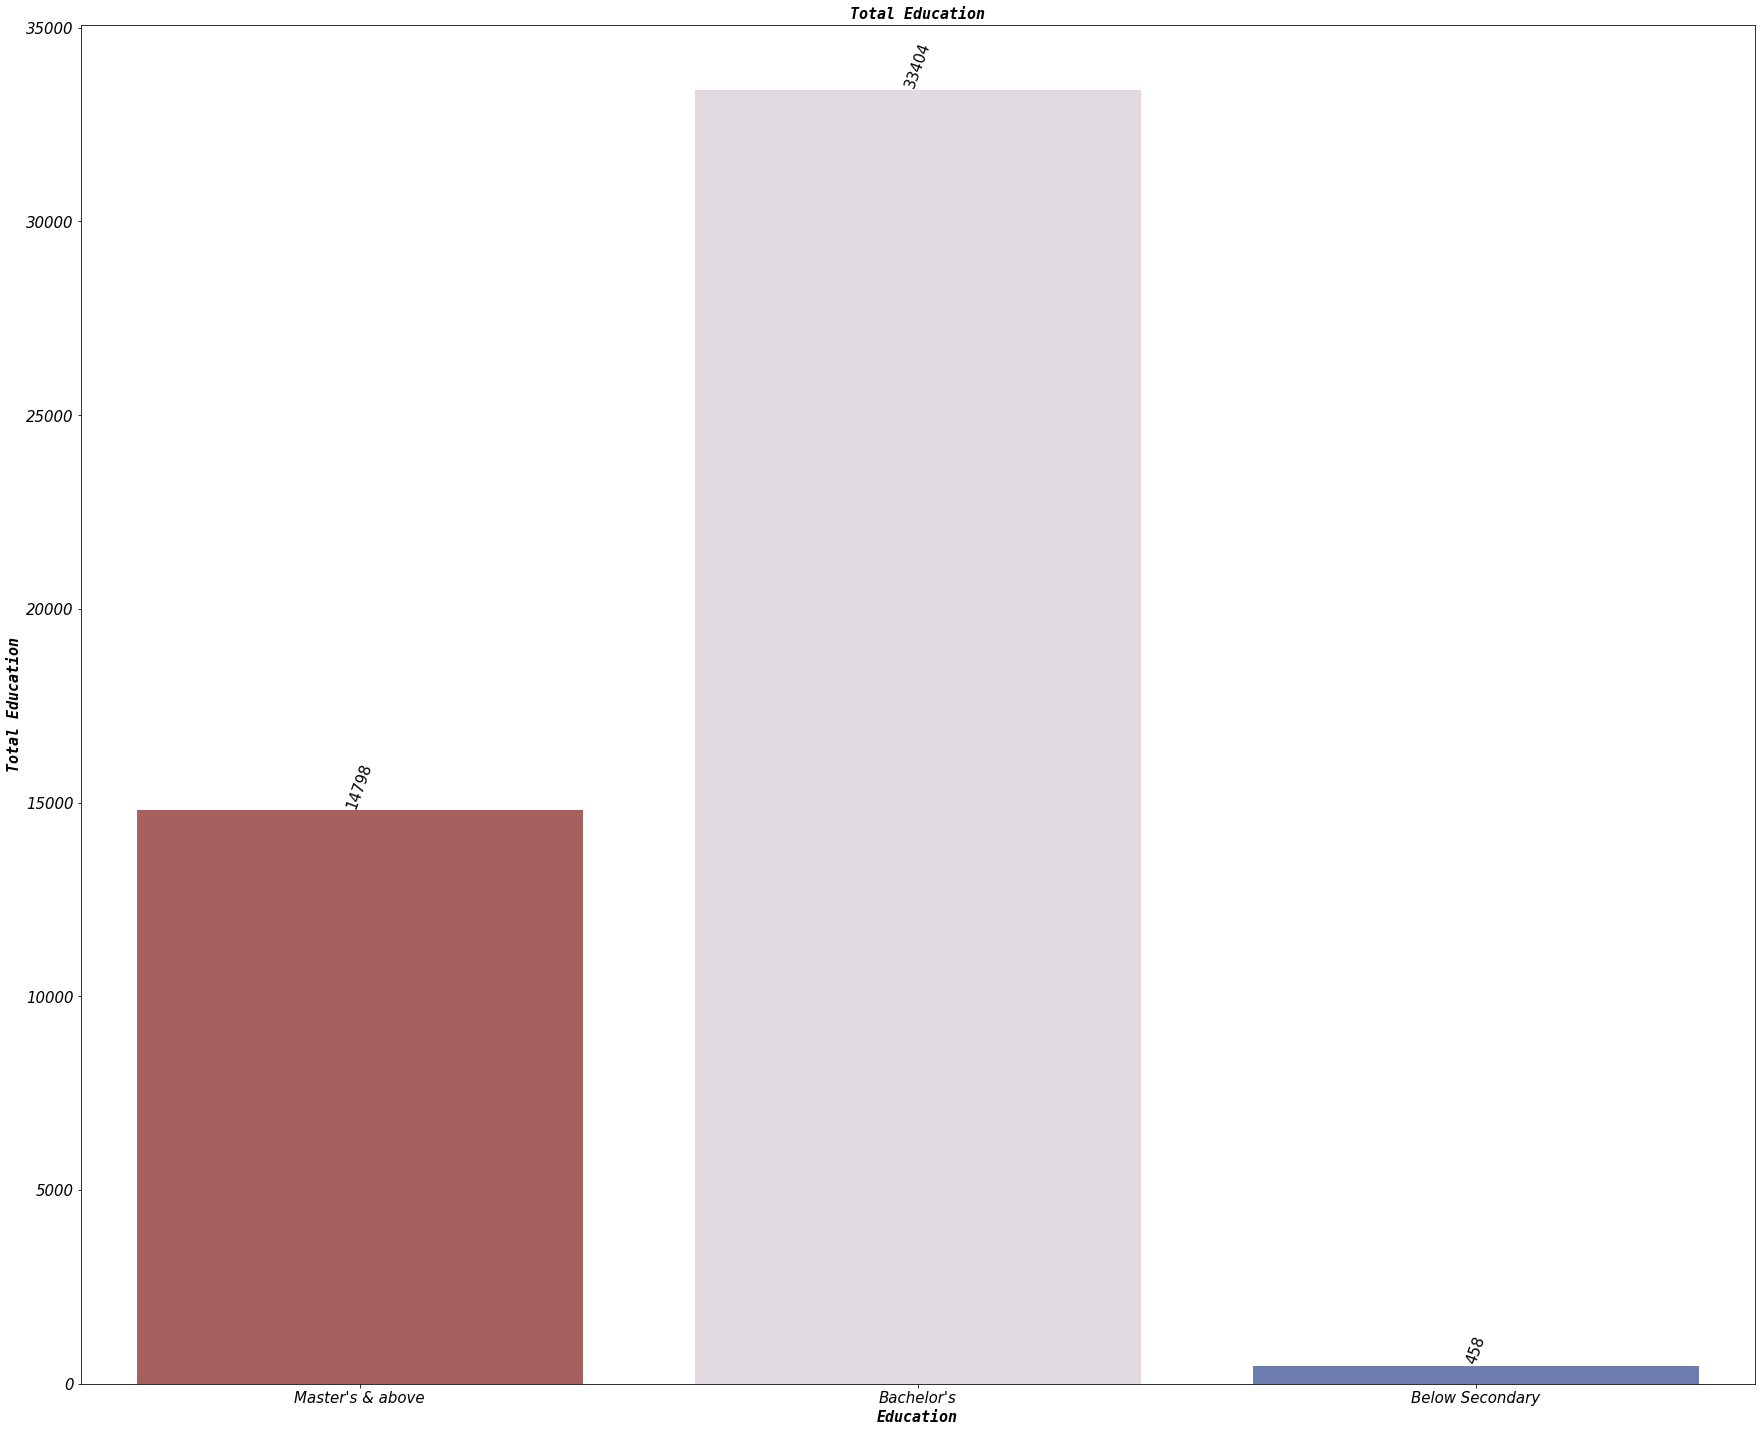

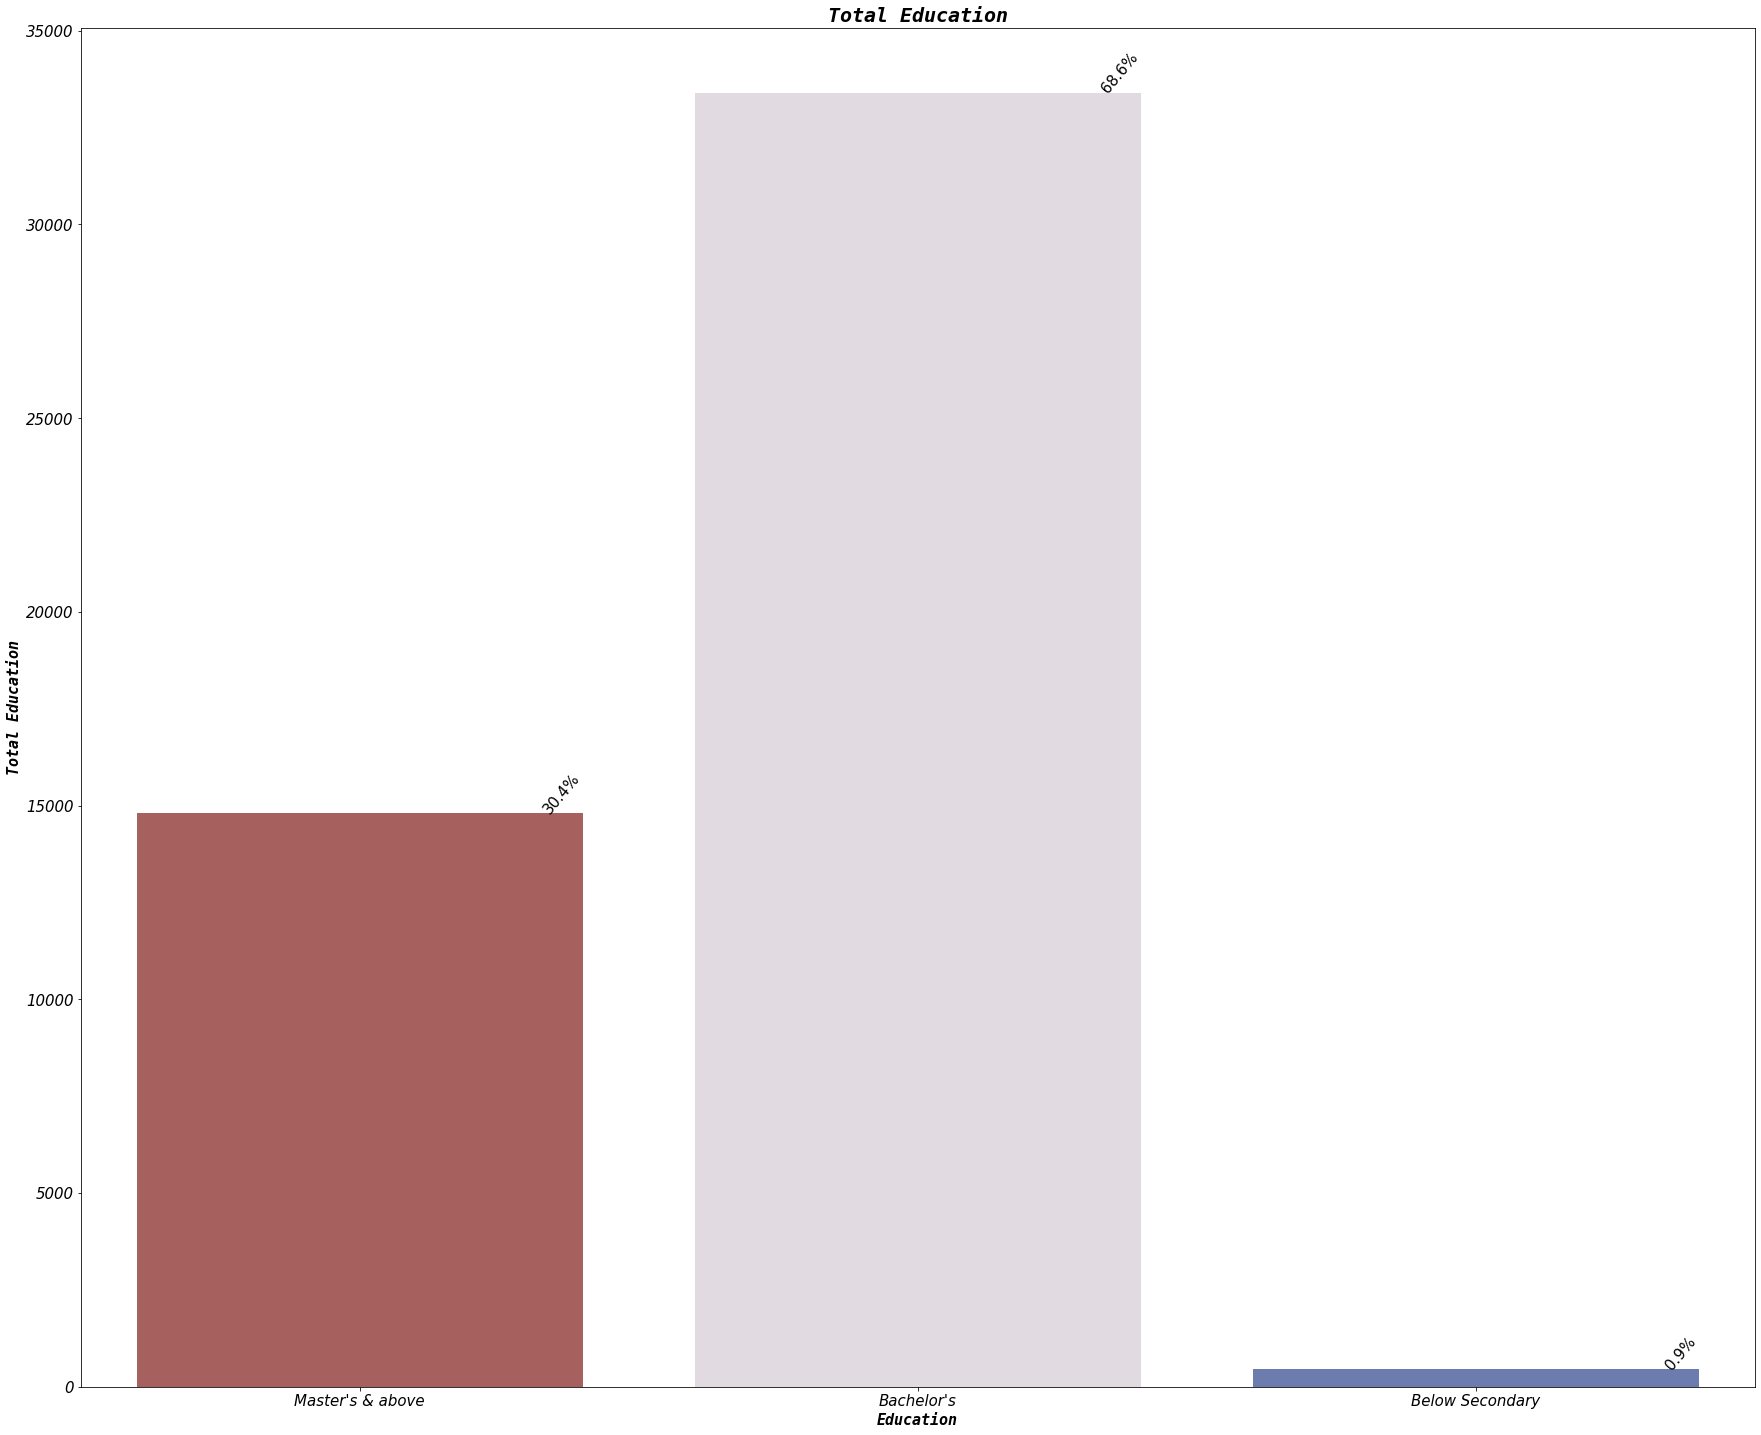

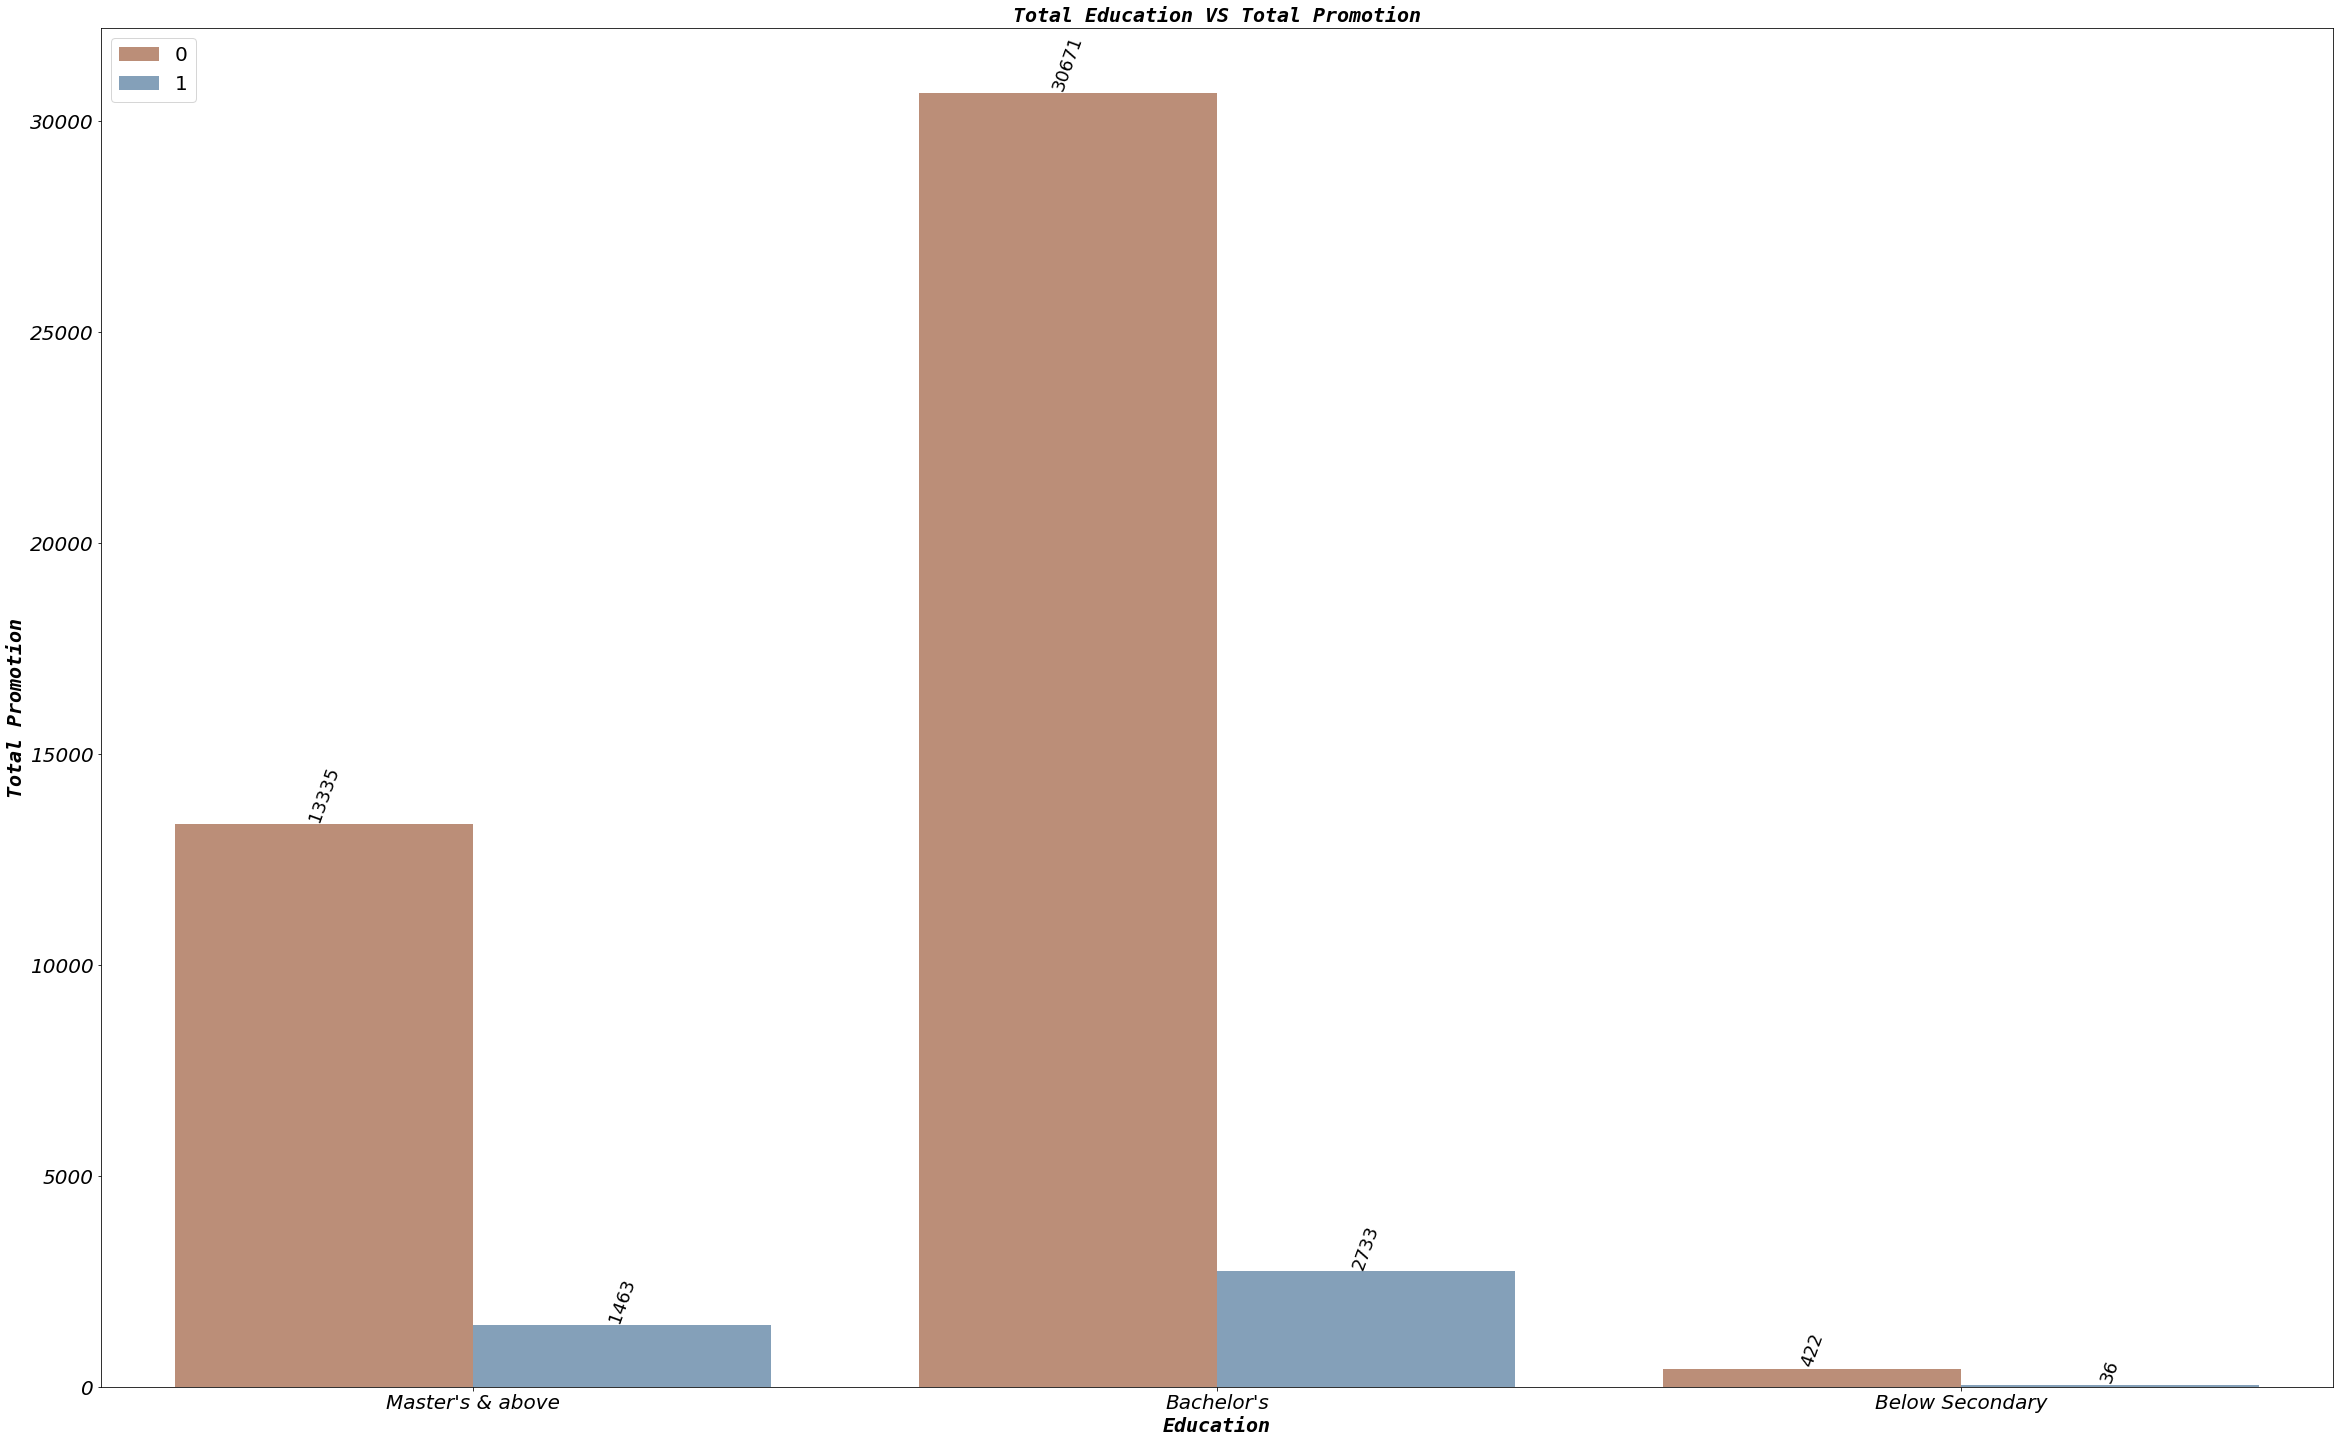

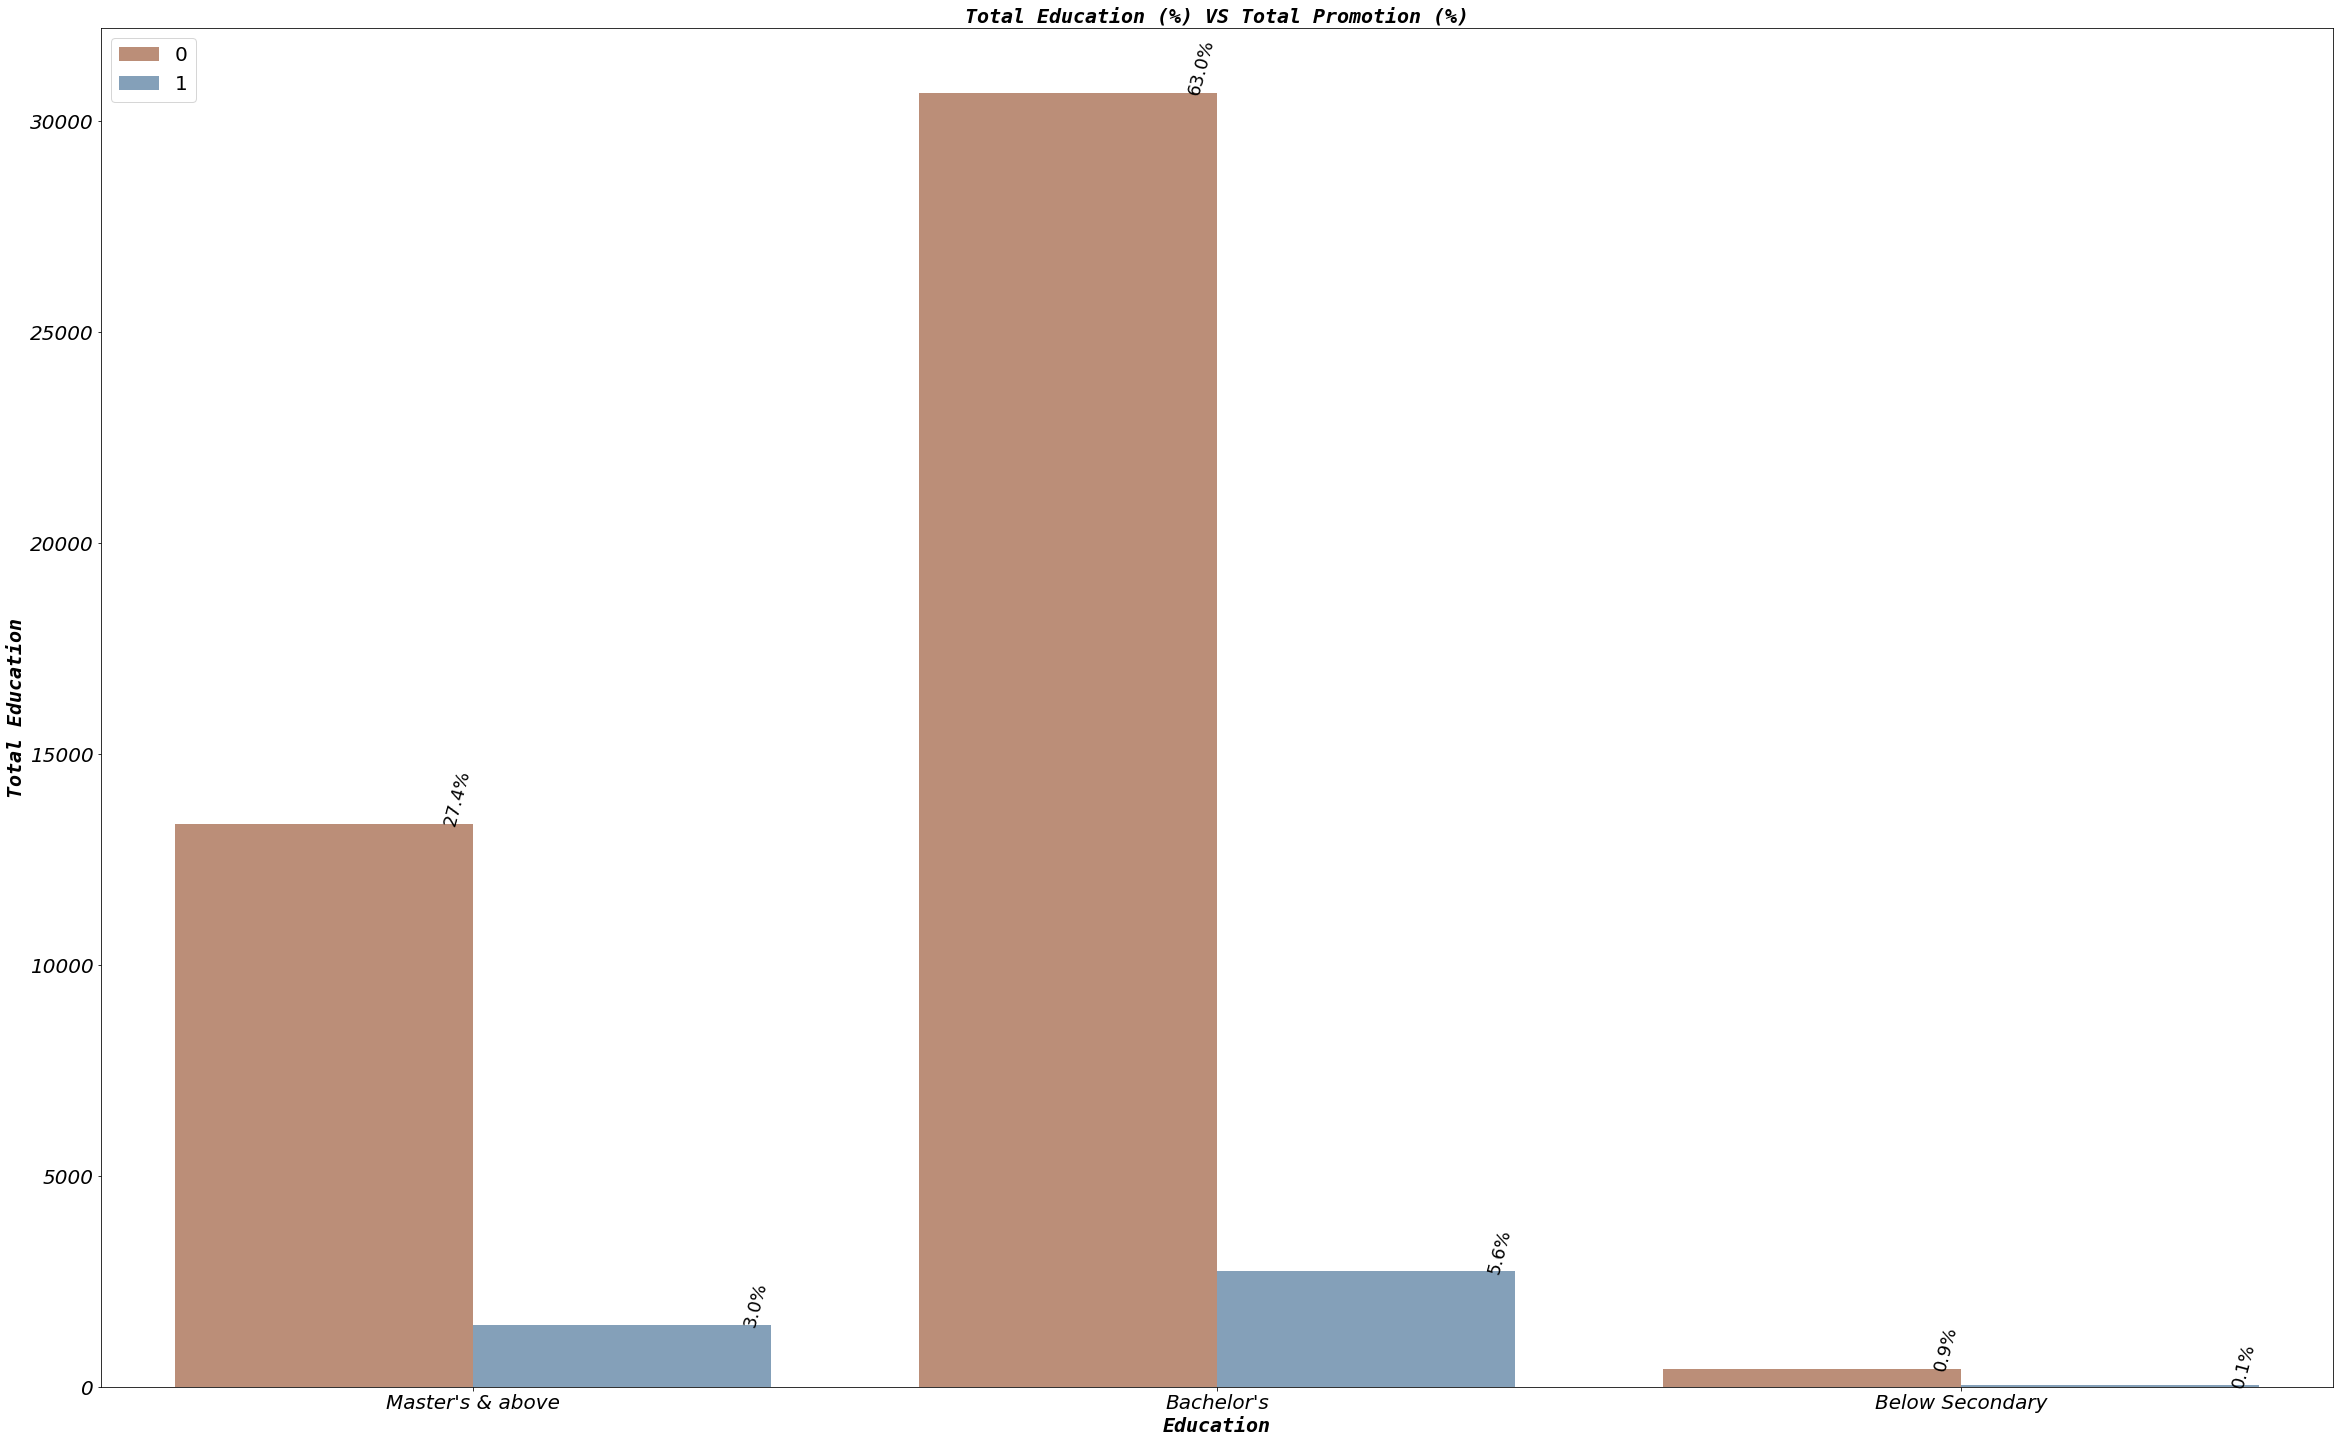

In [42]:
plt.figure(figsize=(30,25))
ax = sns.countplot(x='education', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=15,fontstyle='italic')
plt.yticks(size=15,fontstyle='italic')
plt.title('Total Education',size=15,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Education', fontstyle='italic', size=15, family='monospace',weight=900)
plt.ylabel('Total Education', size=15, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=15,rotation=70, horizontalalignment='left')
plt.show()

plt.figure(figsize=(30,25))
ax = sns.countplot(x="education",data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right',size=15,rotation=50)
    plt.xticks(size=15,fontstyle='italic')
    plt.yticks(size=15,fontstyle='italic')
    plt.title('Total Education',size=20,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Education', fontstyle='italic', size=15, family='monospace',weight=900)
    plt.ylabel('Total Education', size=15, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(40,25))
ax = sns.countplot(x='education', data=df, hue="is_promoted", palette = 'twilight_shifted_r')
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Total Education VS Total Promotion',fontstyle='italic',family='monospace', weight=900, size=20)
plt.xlabel('Education', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total Promotion', size=20, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=18,rotation=70, horizontalalignment='left')
plt.legend(loc="upper left", fontsize=20)
plt.show()

plt.figure(figsize=(40,25))
ax = sns.countplot(x="education", hue="is_promoted", data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=18,rotation=75, horizontalalignment='right')
    plt.xticks(size=20,fontstyle='italic')
    plt.yticks(size=20,fontstyle='italic')
    plt.title('Total Education (%) VS Total Promotion (%)',fontstyle='italic',family='monospace', weight=900,size=20)
    plt.xlabel('Education', fontstyle='italic', size=20, family='monospace',weight=900)
    plt.ylabel('Total Education', size=20, fontstyle='italic',family='monospace', weight=900)
plt.legend(loc="upper left", fontsize=20)
plt.show()

- Insight :
  - Karyawan diperusahaan paling banyak berasal dari pendidikan Bachelor dengan total persentase 63% dengan total karyawan 33.404 dan karyawan yang mendapatkan promosi paling banyak juga berasal dari karyawan dengan gelar bacher sebanyak 5,6% atau sebanyak 2.733 karyawan.

#### **Gender**

In [43]:
pd.crosstab(index=df['gender'],columns='count').sort_values(by='count',ascending=False)

col_0,count
gender,
m,33852
f,14808


In [44]:
pd.crosstab(index=df['gender'],columns='count',normalize=True).round(2).sort_values(by='count',ascending=False)

col_0,count
gender,
m,0.7
f,0.3


In [45]:
pd.crosstab(index=df['gender'],columns=df['is_promoted']).sort_values(1,ascending=False).head()

is_promoted,0,1
gender,,
m,30983,2869
f,13445,1363


In [46]:
pd.crosstab(index=df['gender'],columns=df['is_promoted'],normalize=True).round(2).sort_values(1,ascending=False).head()

is_promoted,0,1
gender,,
m,0.64,0.06
f,0.28,0.03


#### **Visualization Gender & Promoted**

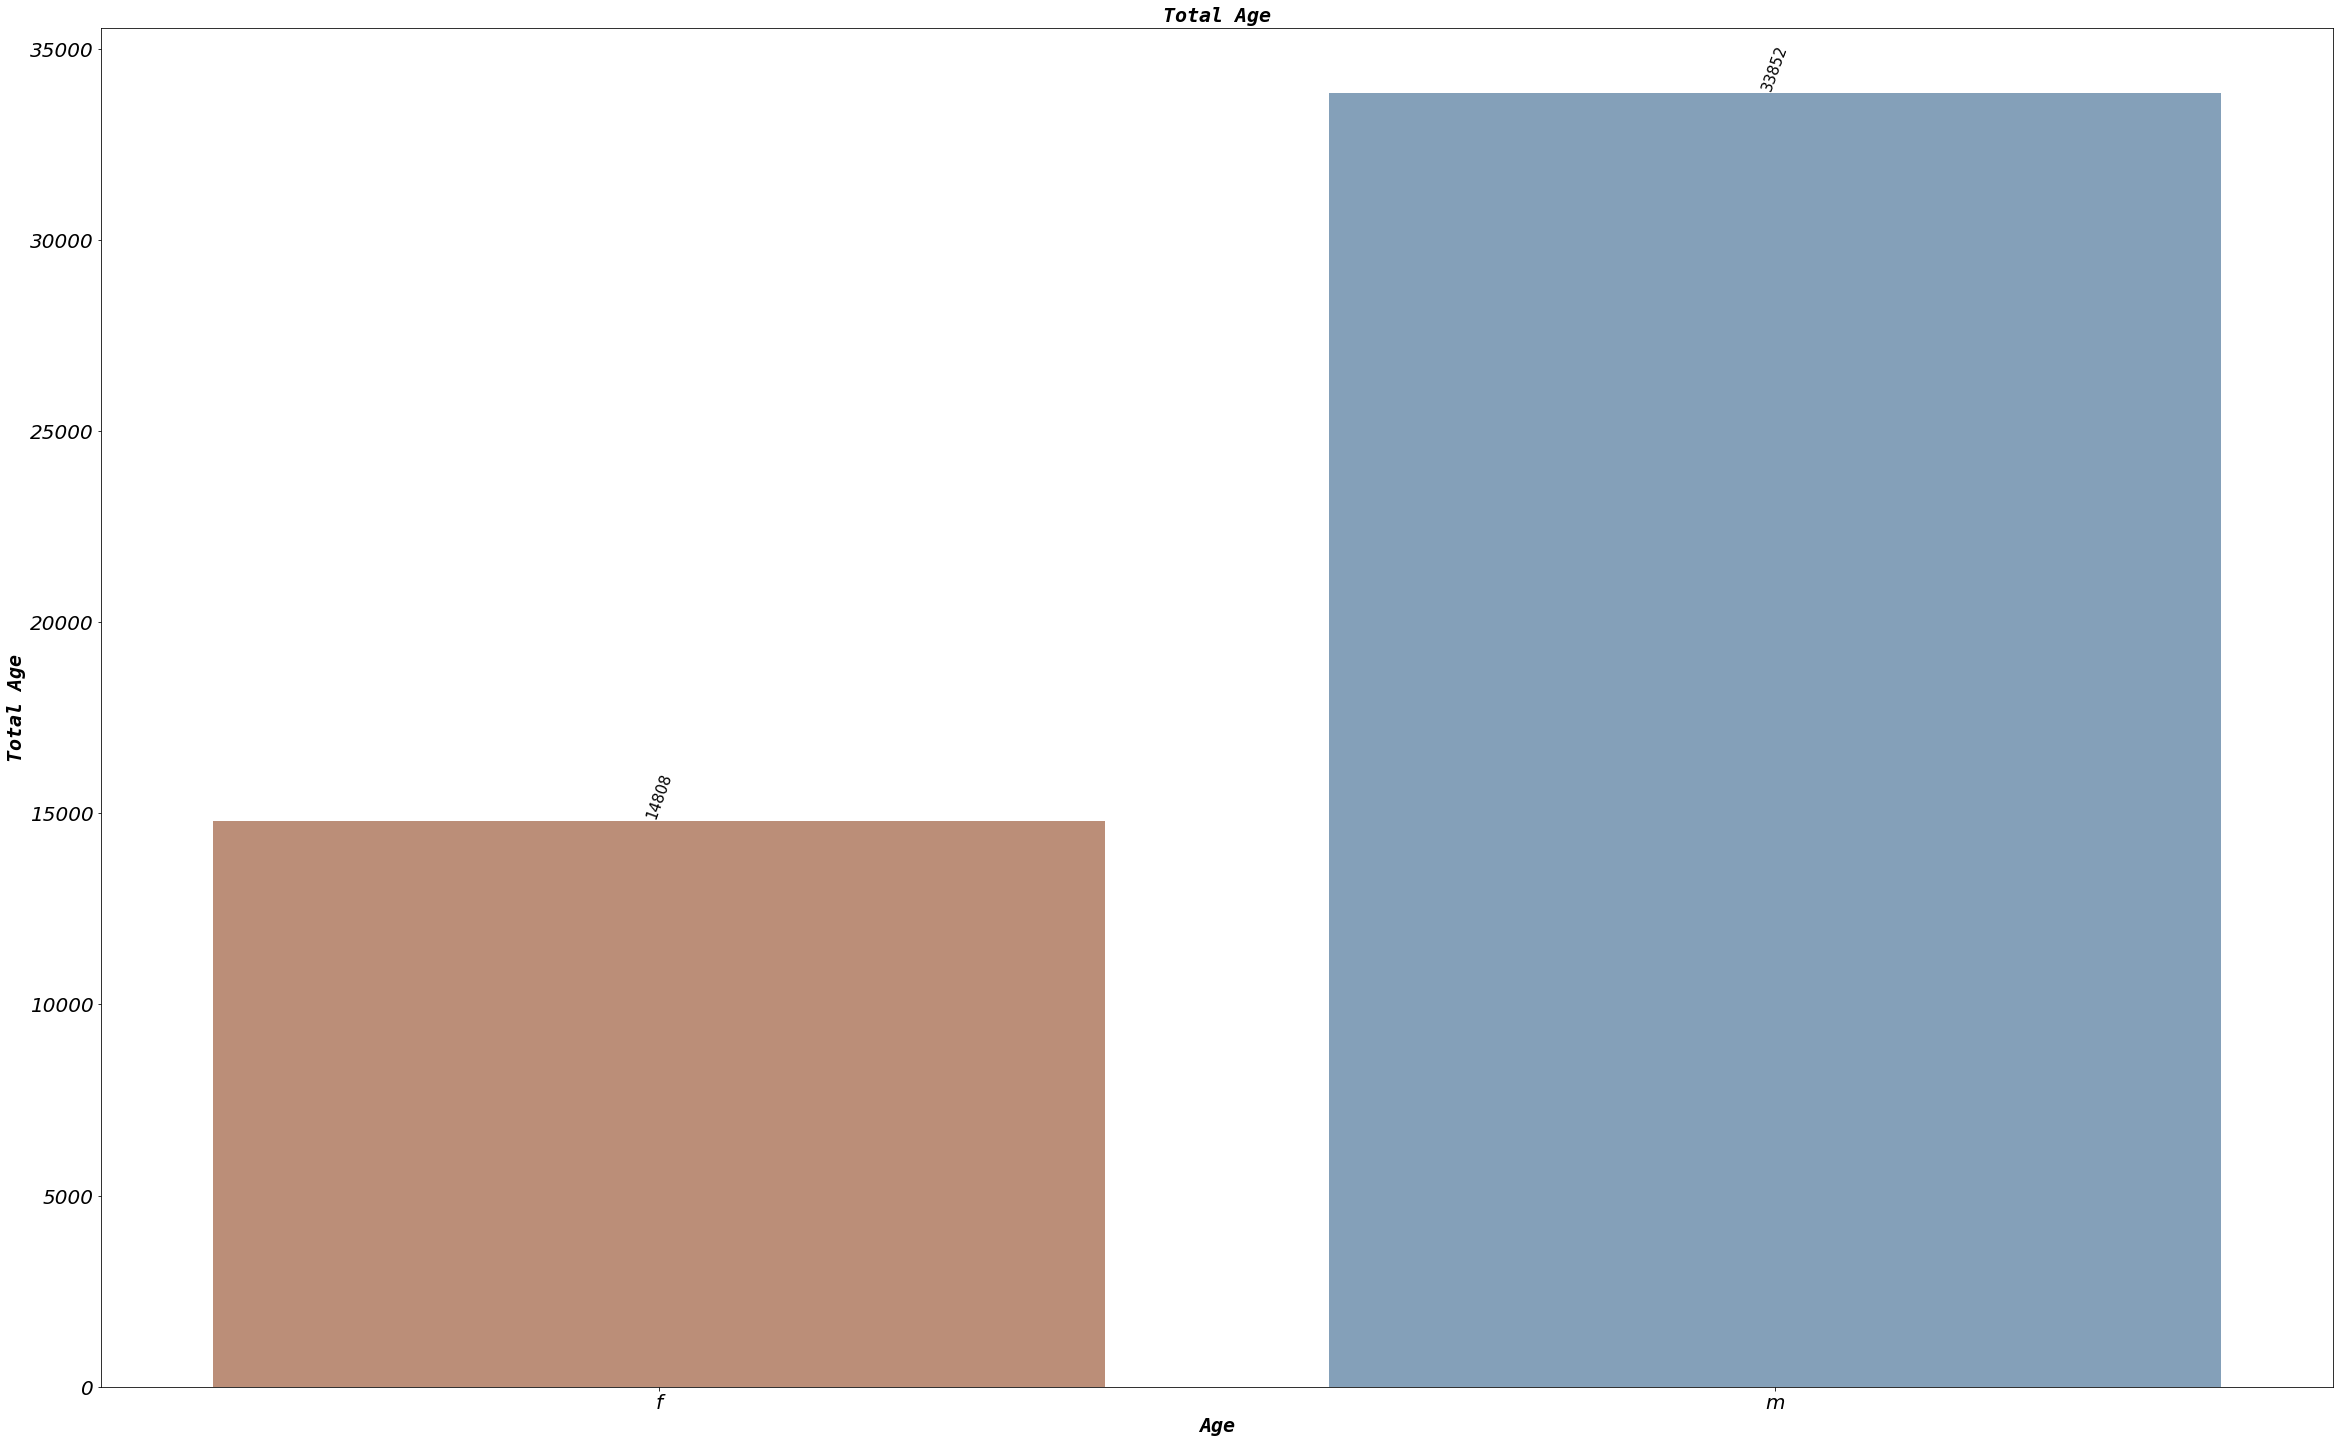

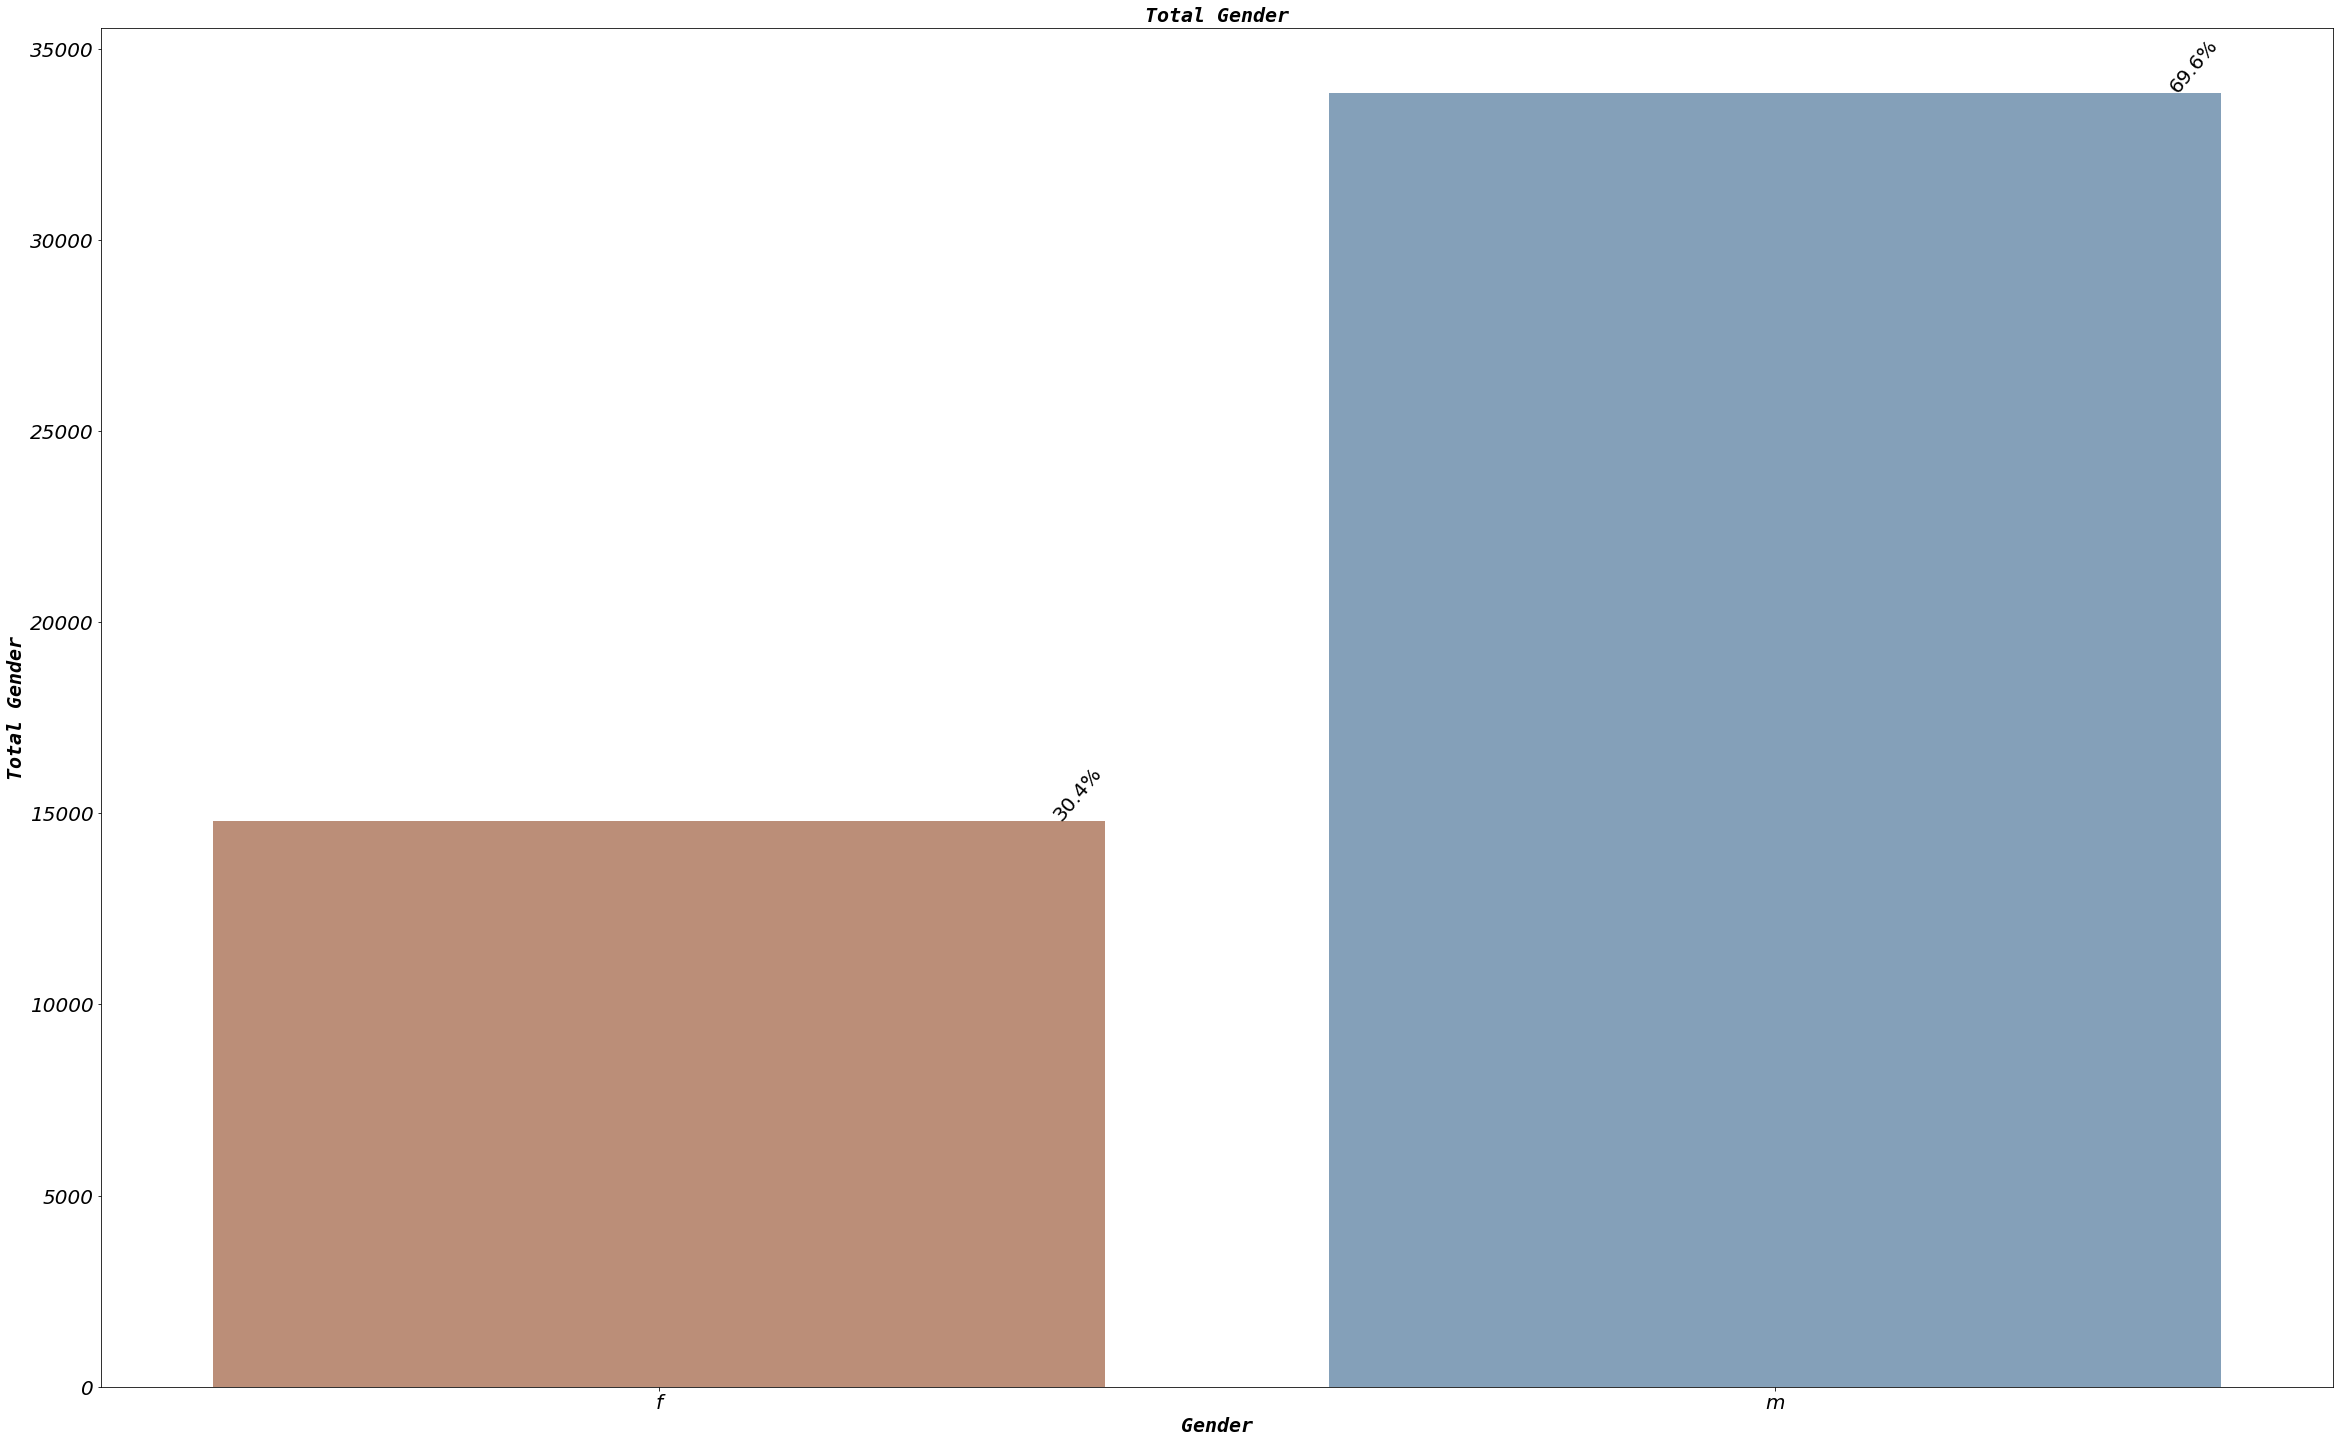

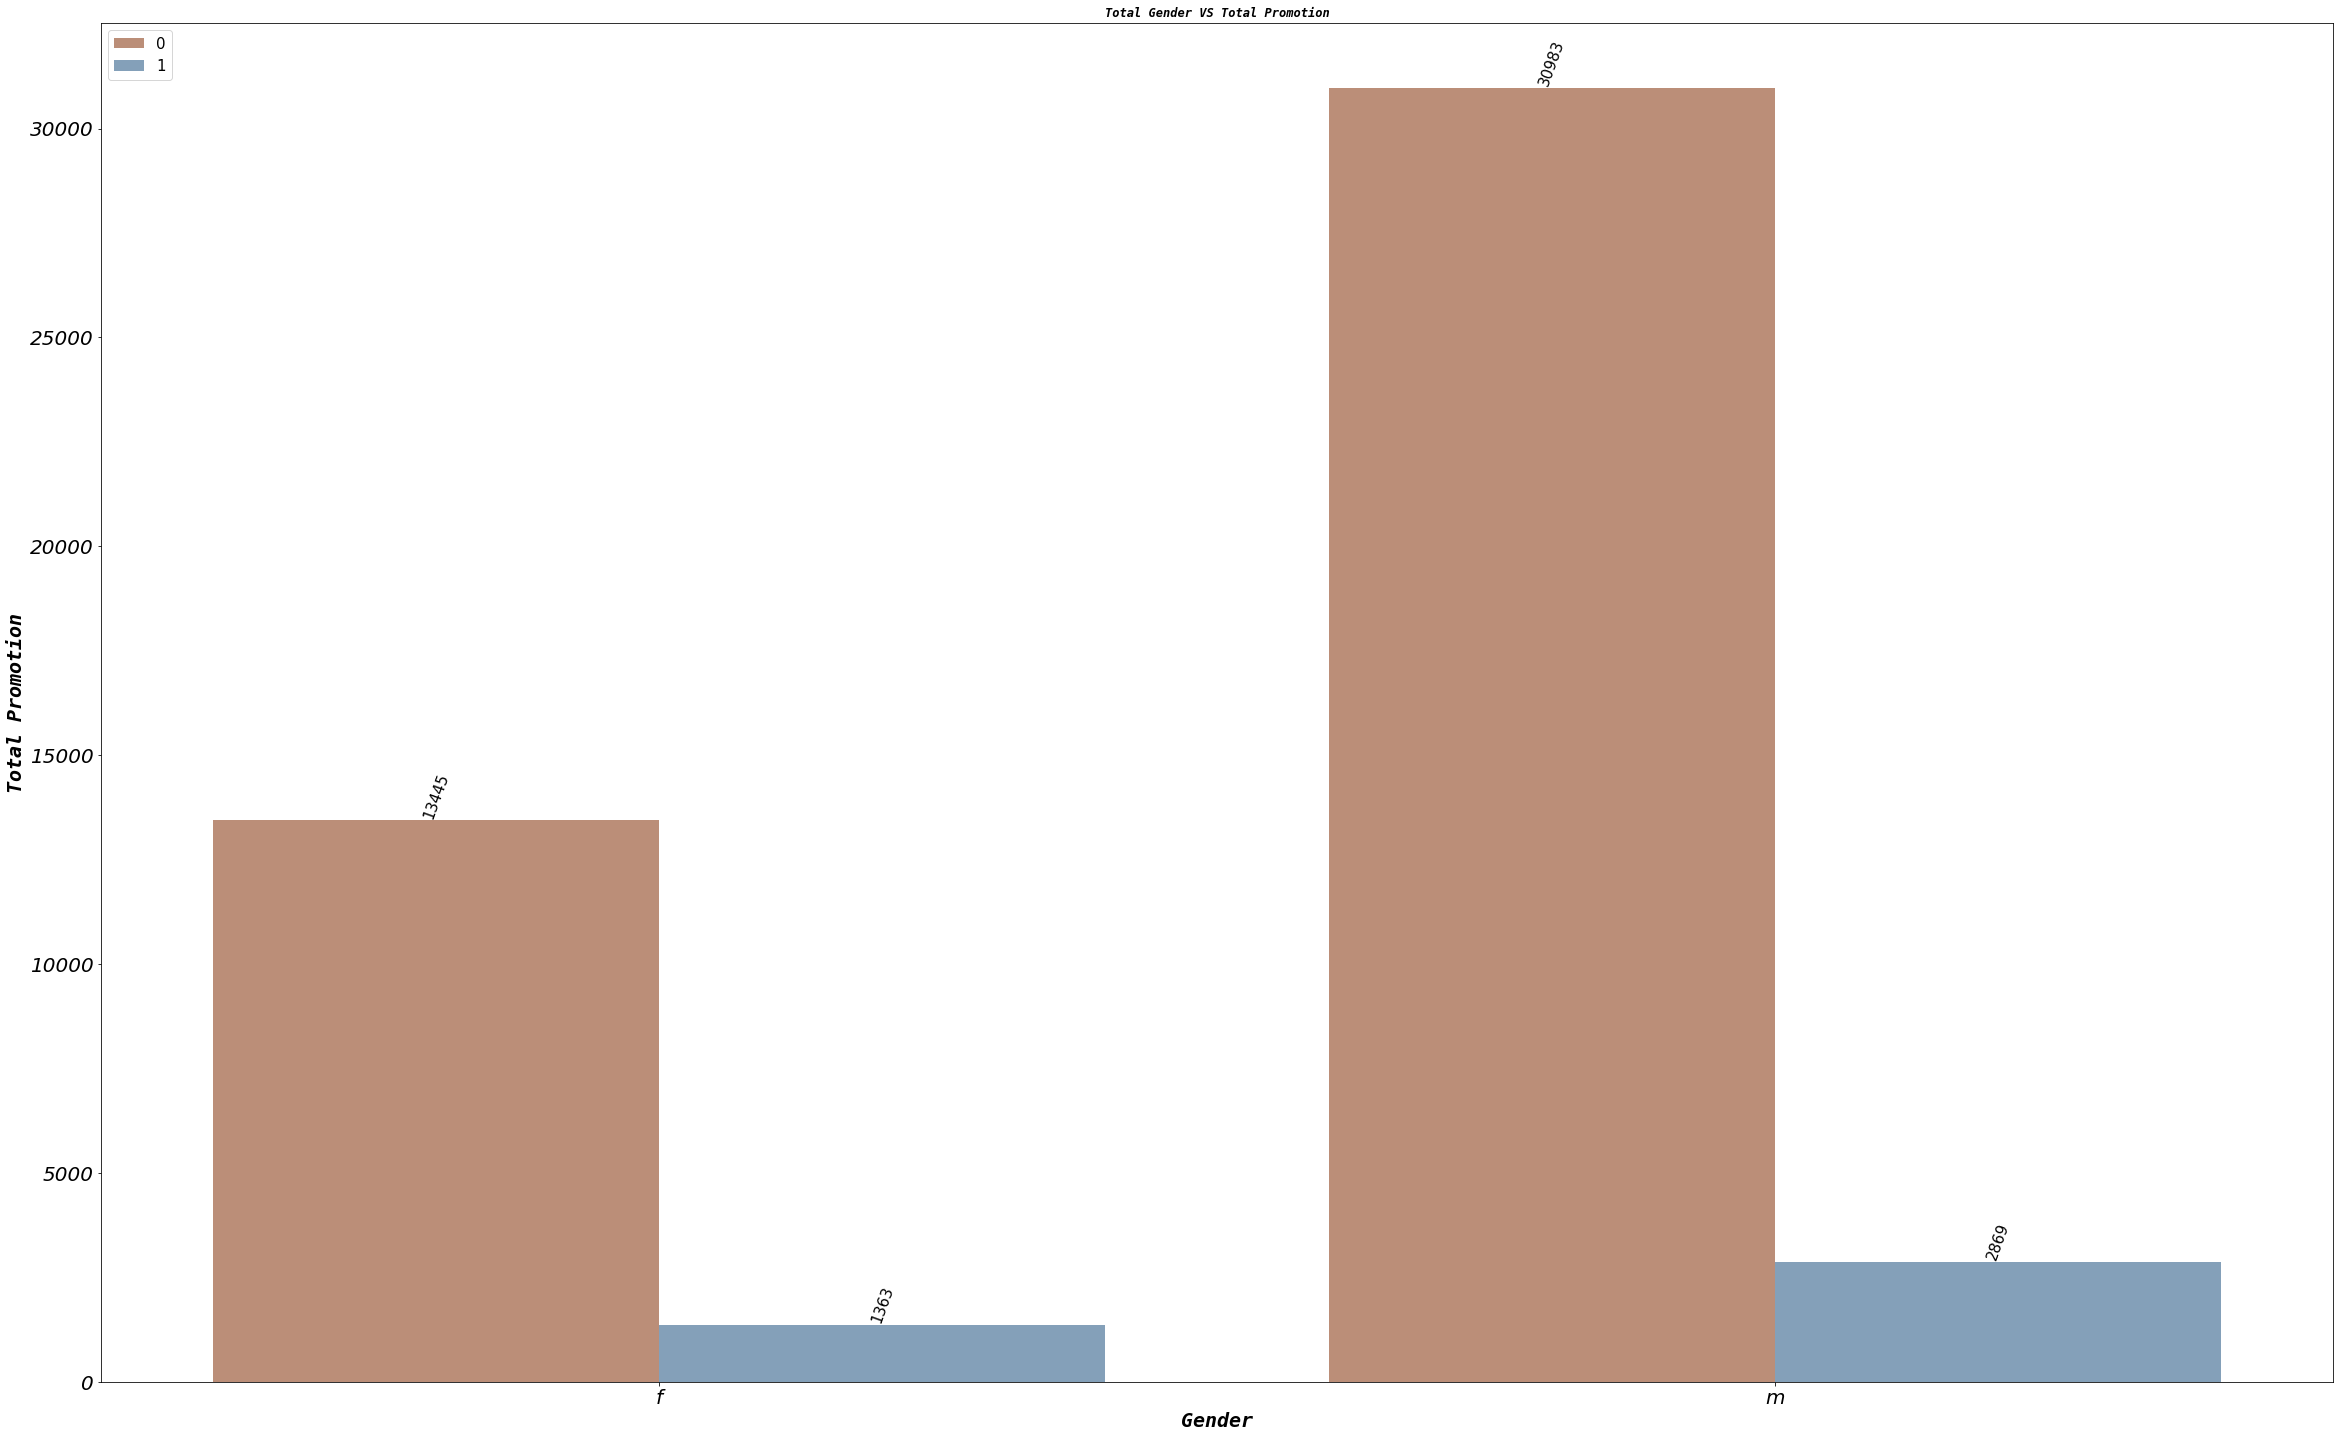

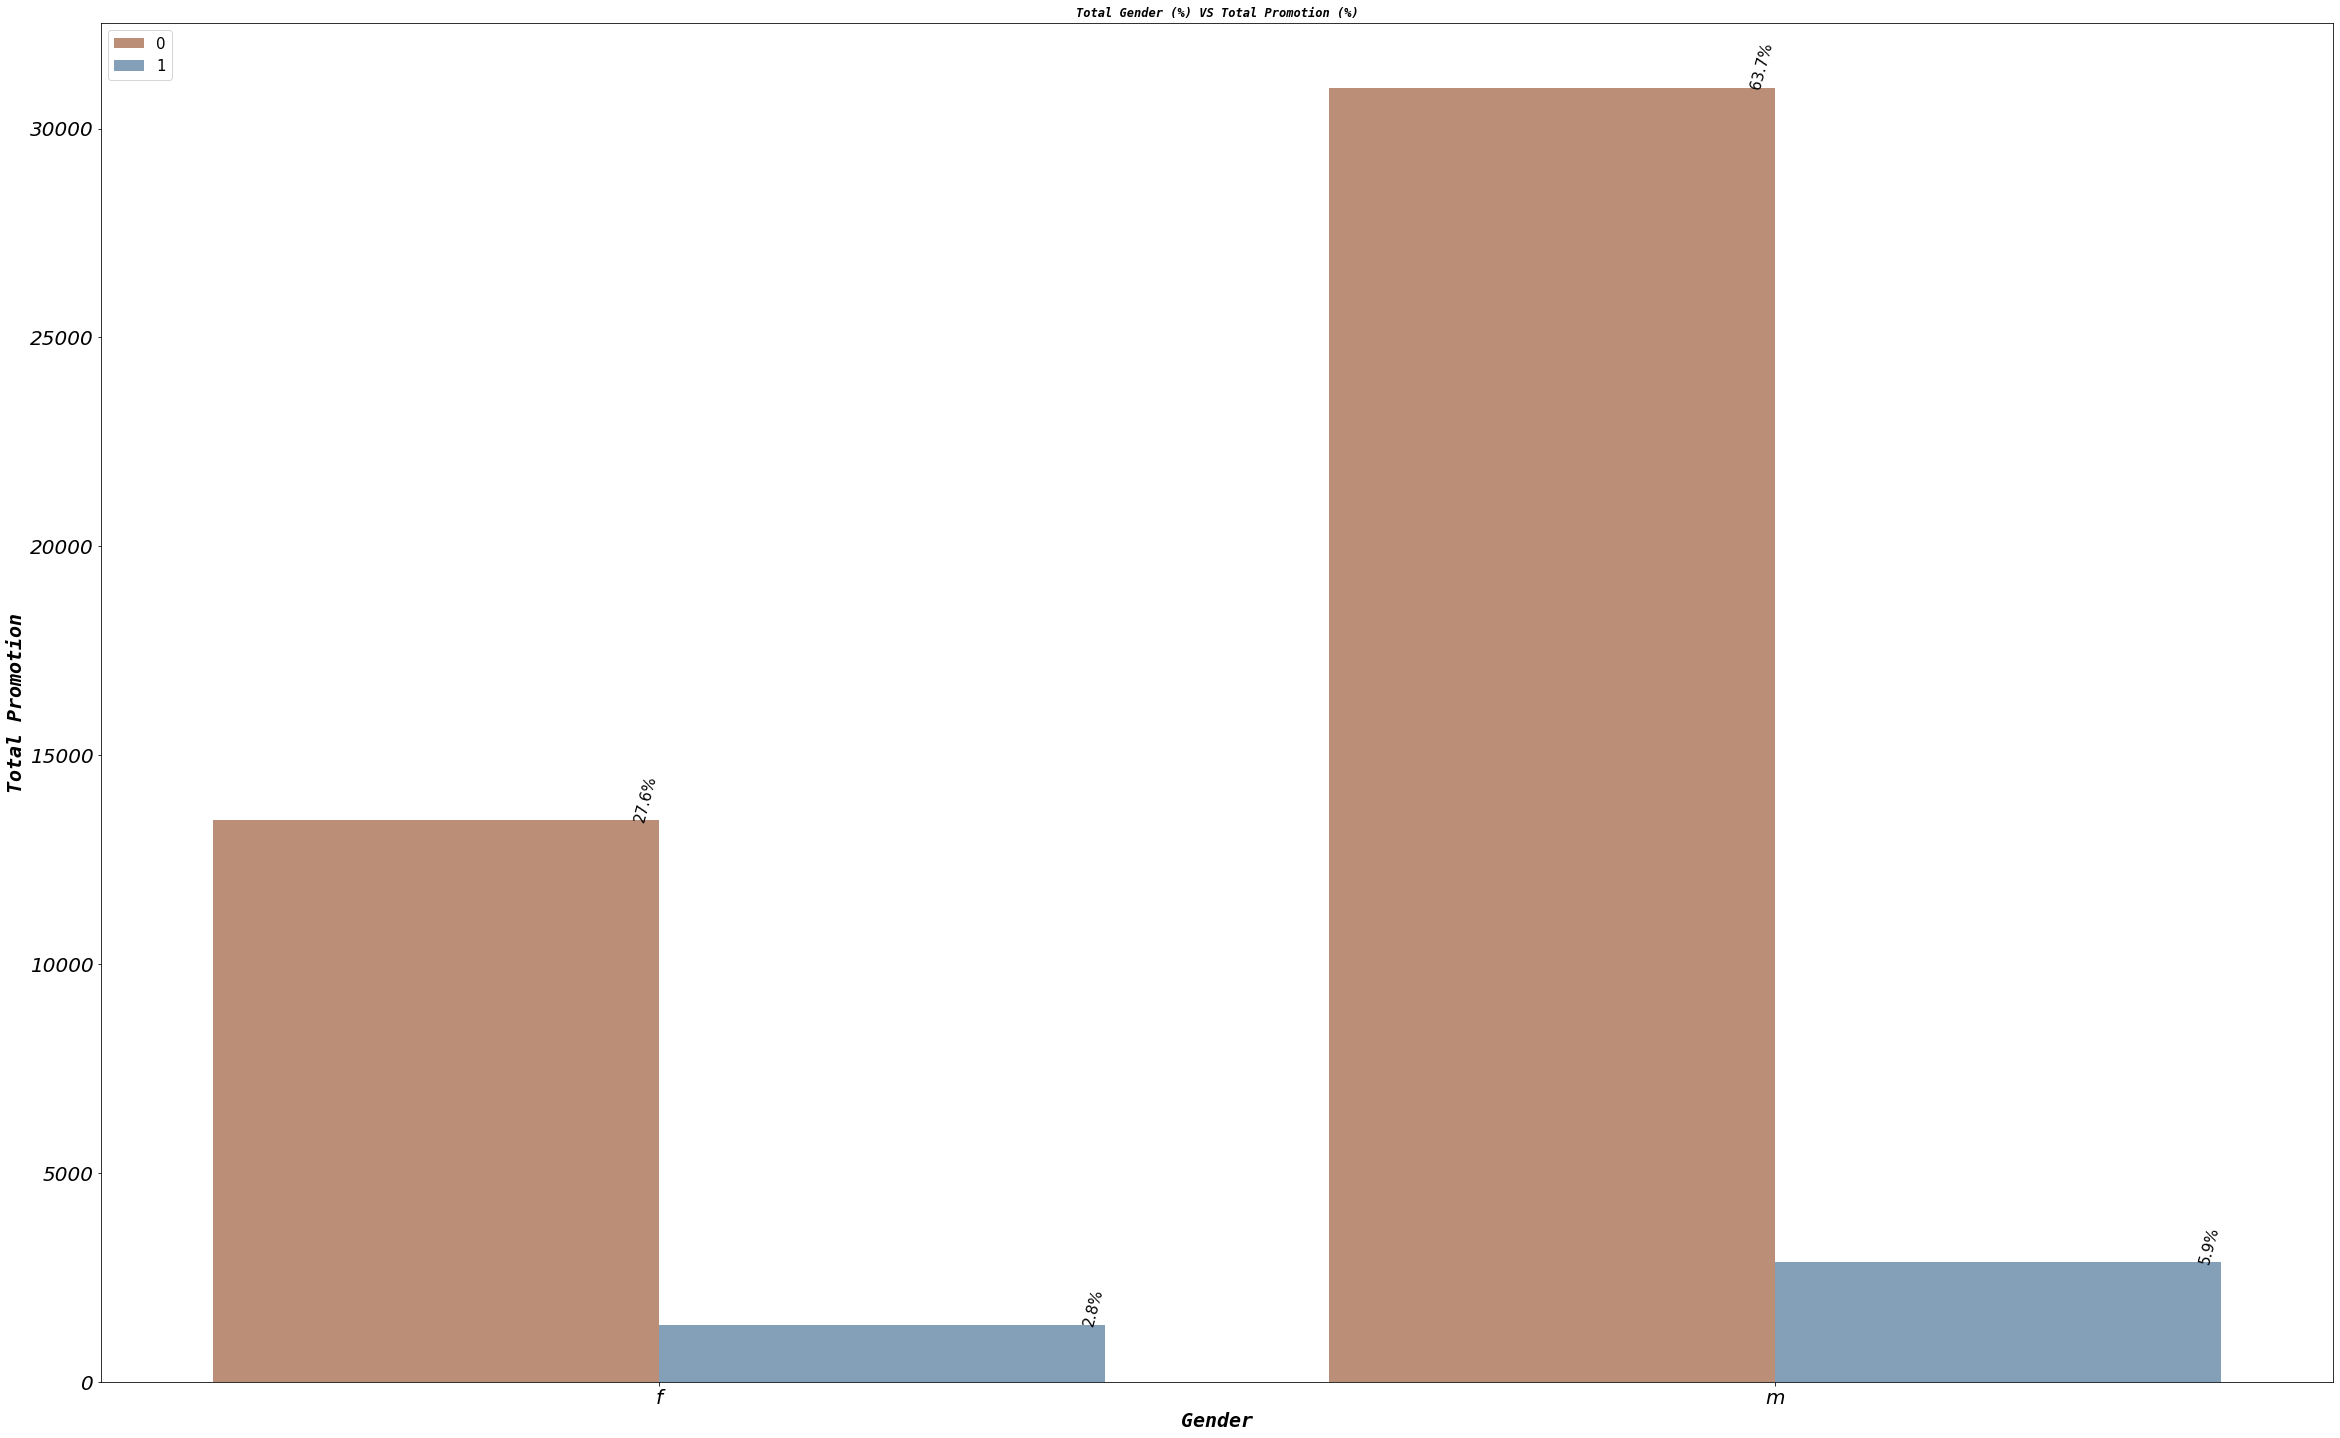

In [47]:
plt.figure(figsize=(40,25))
ax = sns.countplot(x='gender', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Total Age',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Age', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total Age', size=20, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=15,rotation=70, horizontalalignment='left')
plt.show()

plt.figure(figsize=(40,25))
ax = sns.countplot(x="gender",data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right',size=20,rotation=50,)
    plt.xticks(size=20,fontstyle='italic')
    plt.yticks(size=20,fontstyle='italic')
    plt.title('Total Gender',size=20,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Gender', fontstyle='italic', size=20, family='monospace',weight=900)
    plt.ylabel('Total Gender', size=20, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(40,25))
ax = sns.countplot(x='gender', data=df, hue="is_promoted", palette = 'twilight_shifted_r')
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Total Gender VS Total Promotion',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Gender', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total Promotion', size=20, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=15,rotation=70, horizontalalignment='left')
plt.legend(loc="upper left", fontsize=15)
plt.show()

plt.figure(figsize=(40,25))
ax = sns.countplot(x="gender", hue="is_promoted", data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=15,rotation=75, horizontalalignment='right')
    plt.xticks(size=20,fontstyle='italic')
    plt.yticks(size=20,fontstyle='italic')
    plt.title('Total Gender (%) VS Total Promotion (%)',fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Gender', fontstyle='italic', size=20, family='monospace',weight=900)
    plt.ylabel('Total Promotion', size=20, fontstyle='italic',family='monospace', weight=900)
plt.legend(loc="upper left", fontsize=15)
plt.show()

- Insight :
  - Karyawan di perusahaan paling banyak bergender Male dengan total persentase 59,6% dan karyawan bergender male lebih banyak mendapatkan promosi 5,9% dibandingkan karyawan bergender female.

#### **Age**

In [48]:
pd.crosstab(index=df['age'],columns='count').sort_values(by='count',ascending=False).head()

col_0,count
age,
32,3389
31,3268
30,3202
33,3106
34,2989


In [49]:
pd.crosstab(index=df['age'],columns='count',normalize=True).round(2).sort_values(by='count',ascending=False).head()

col_0,count
age,
30,0.07
31,0.07
32,0.07
34,0.06
29,0.06


#### **Age & Promoted**

In [50]:
pd.crosstab(index=df['age'],columns=df['is_promoted']).sort_values(1,ascending=False).head()

is_promoted,0,1
age,,
33,2795,311
31,2978,290
32,3101,288
30,2915,287
34,2708,281


In [51]:
pd.crosstab(index=df['age'],columns=df['is_promoted'],normalize=True).round(2).sort_values(1,ascending=False).head()

is_promoted,0,1
age,,
32,0.06,0.01
34,0.06,0.01
29,0.05,0.01
30,0.06,0.01
31,0.06,0.01


#### **Visualization Age & Promotedac**

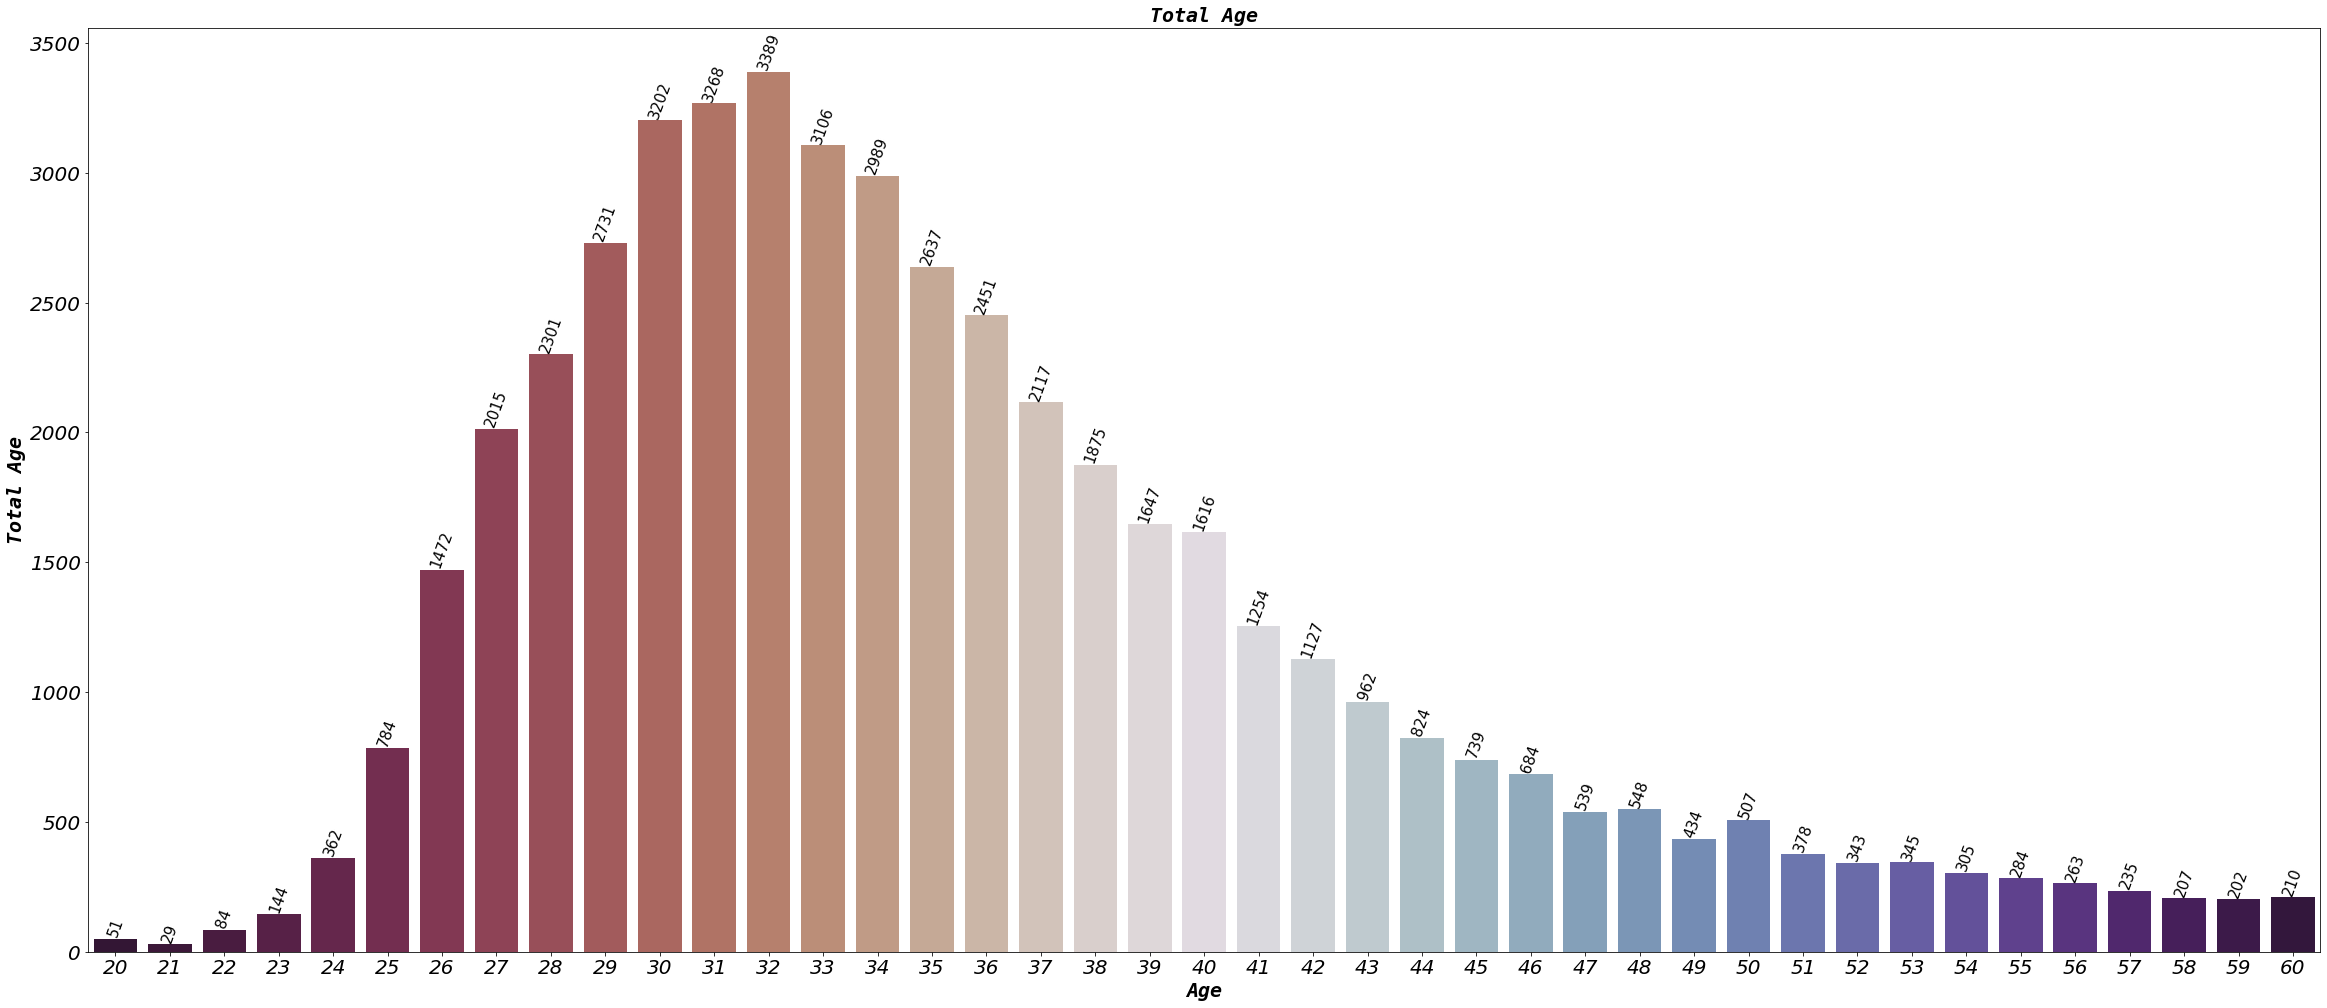

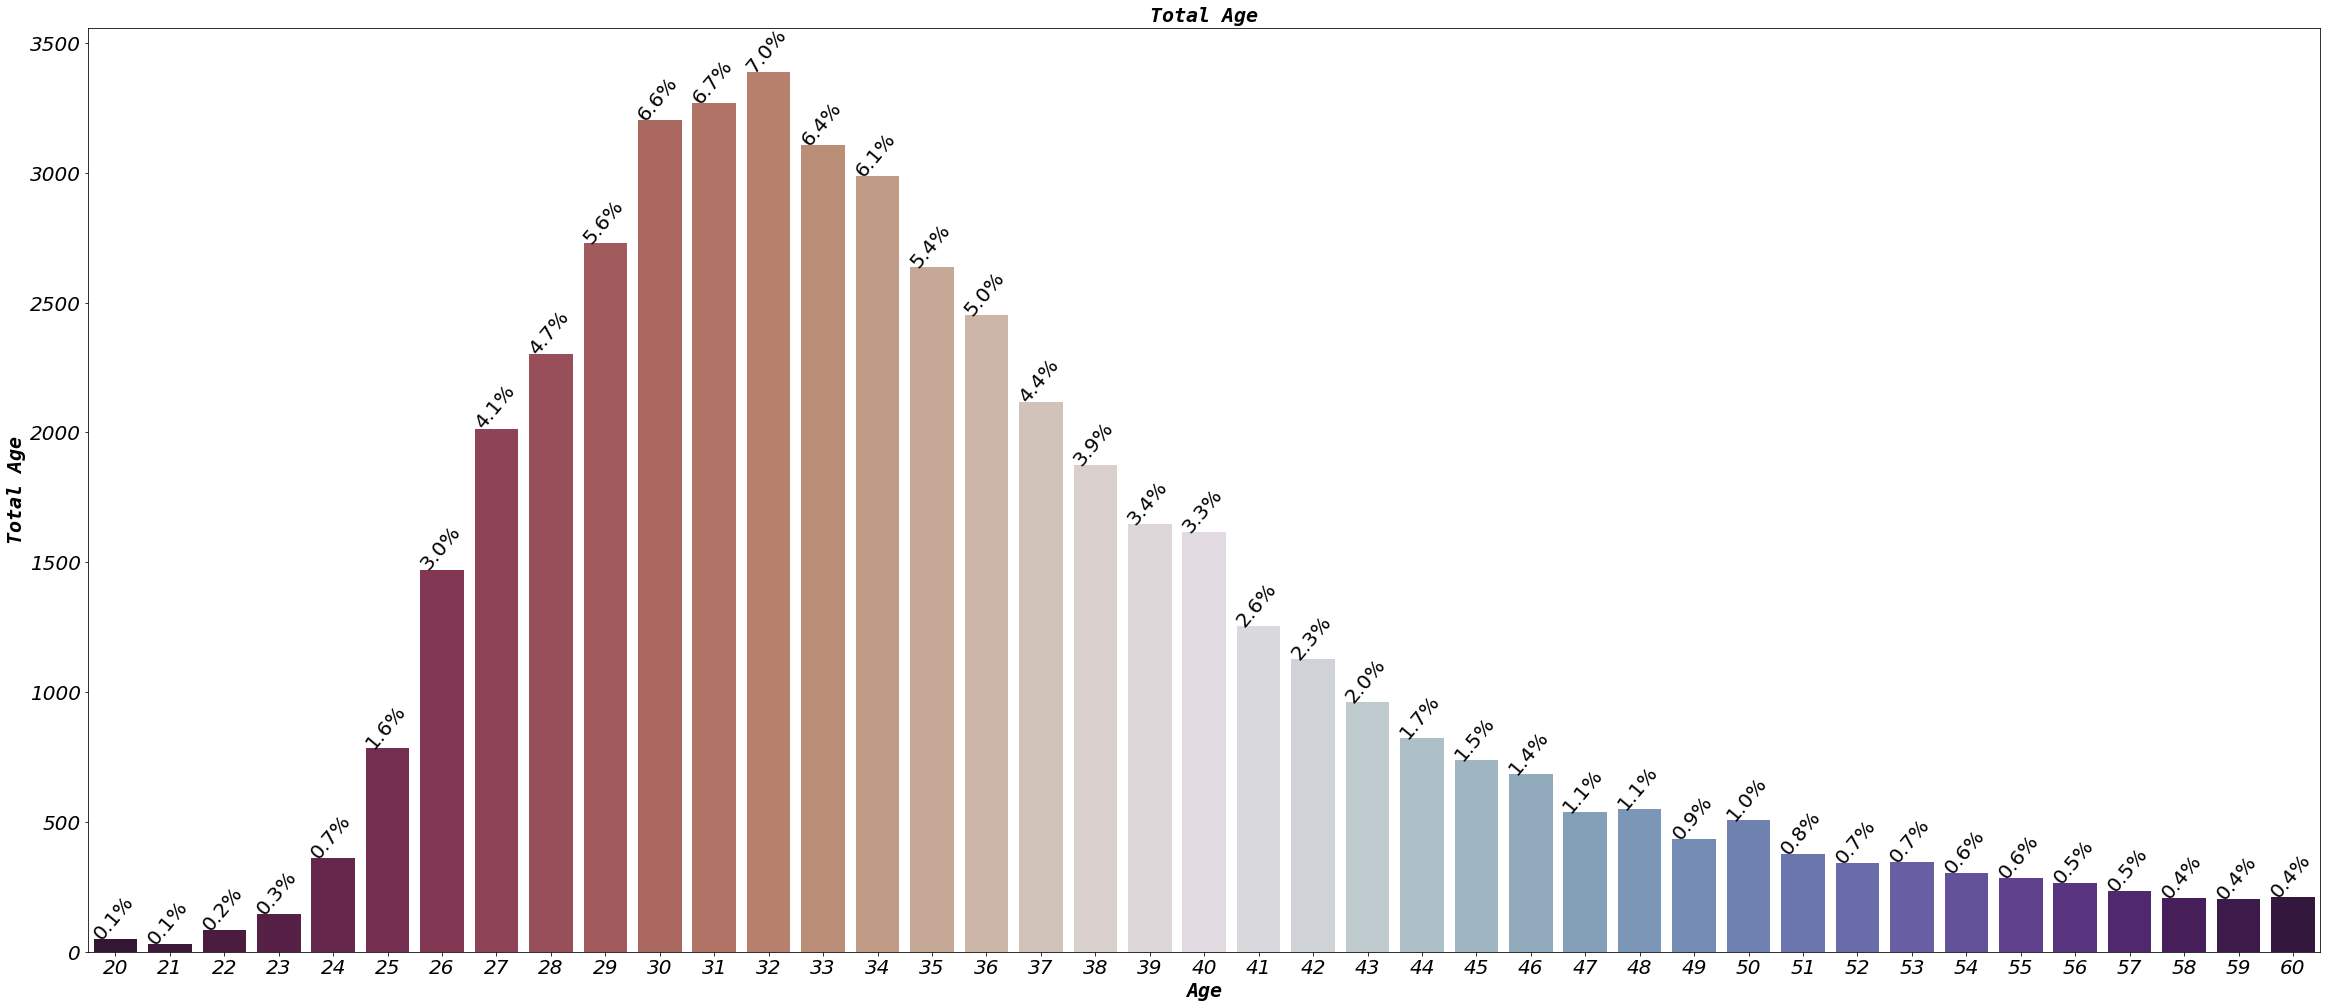

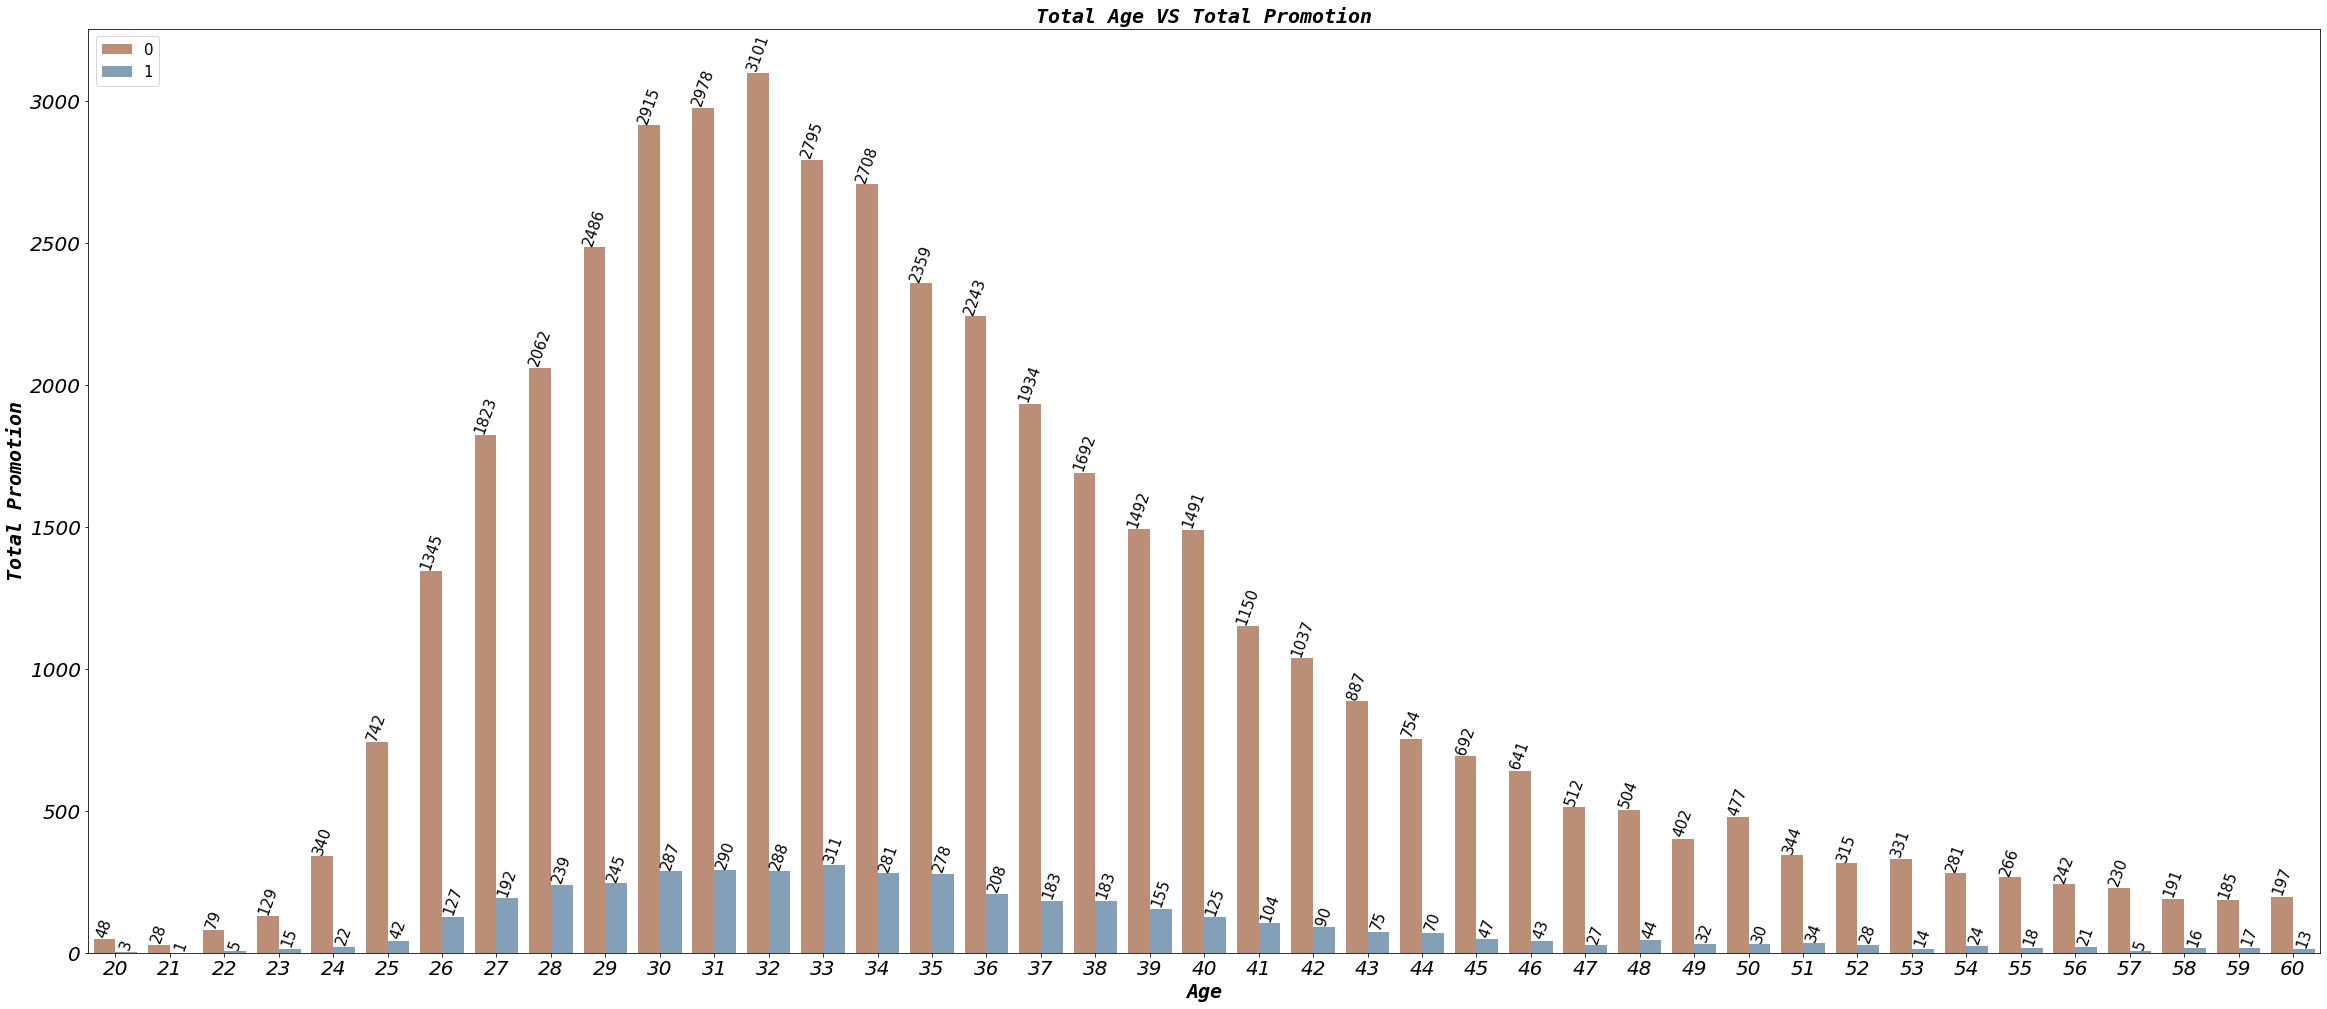

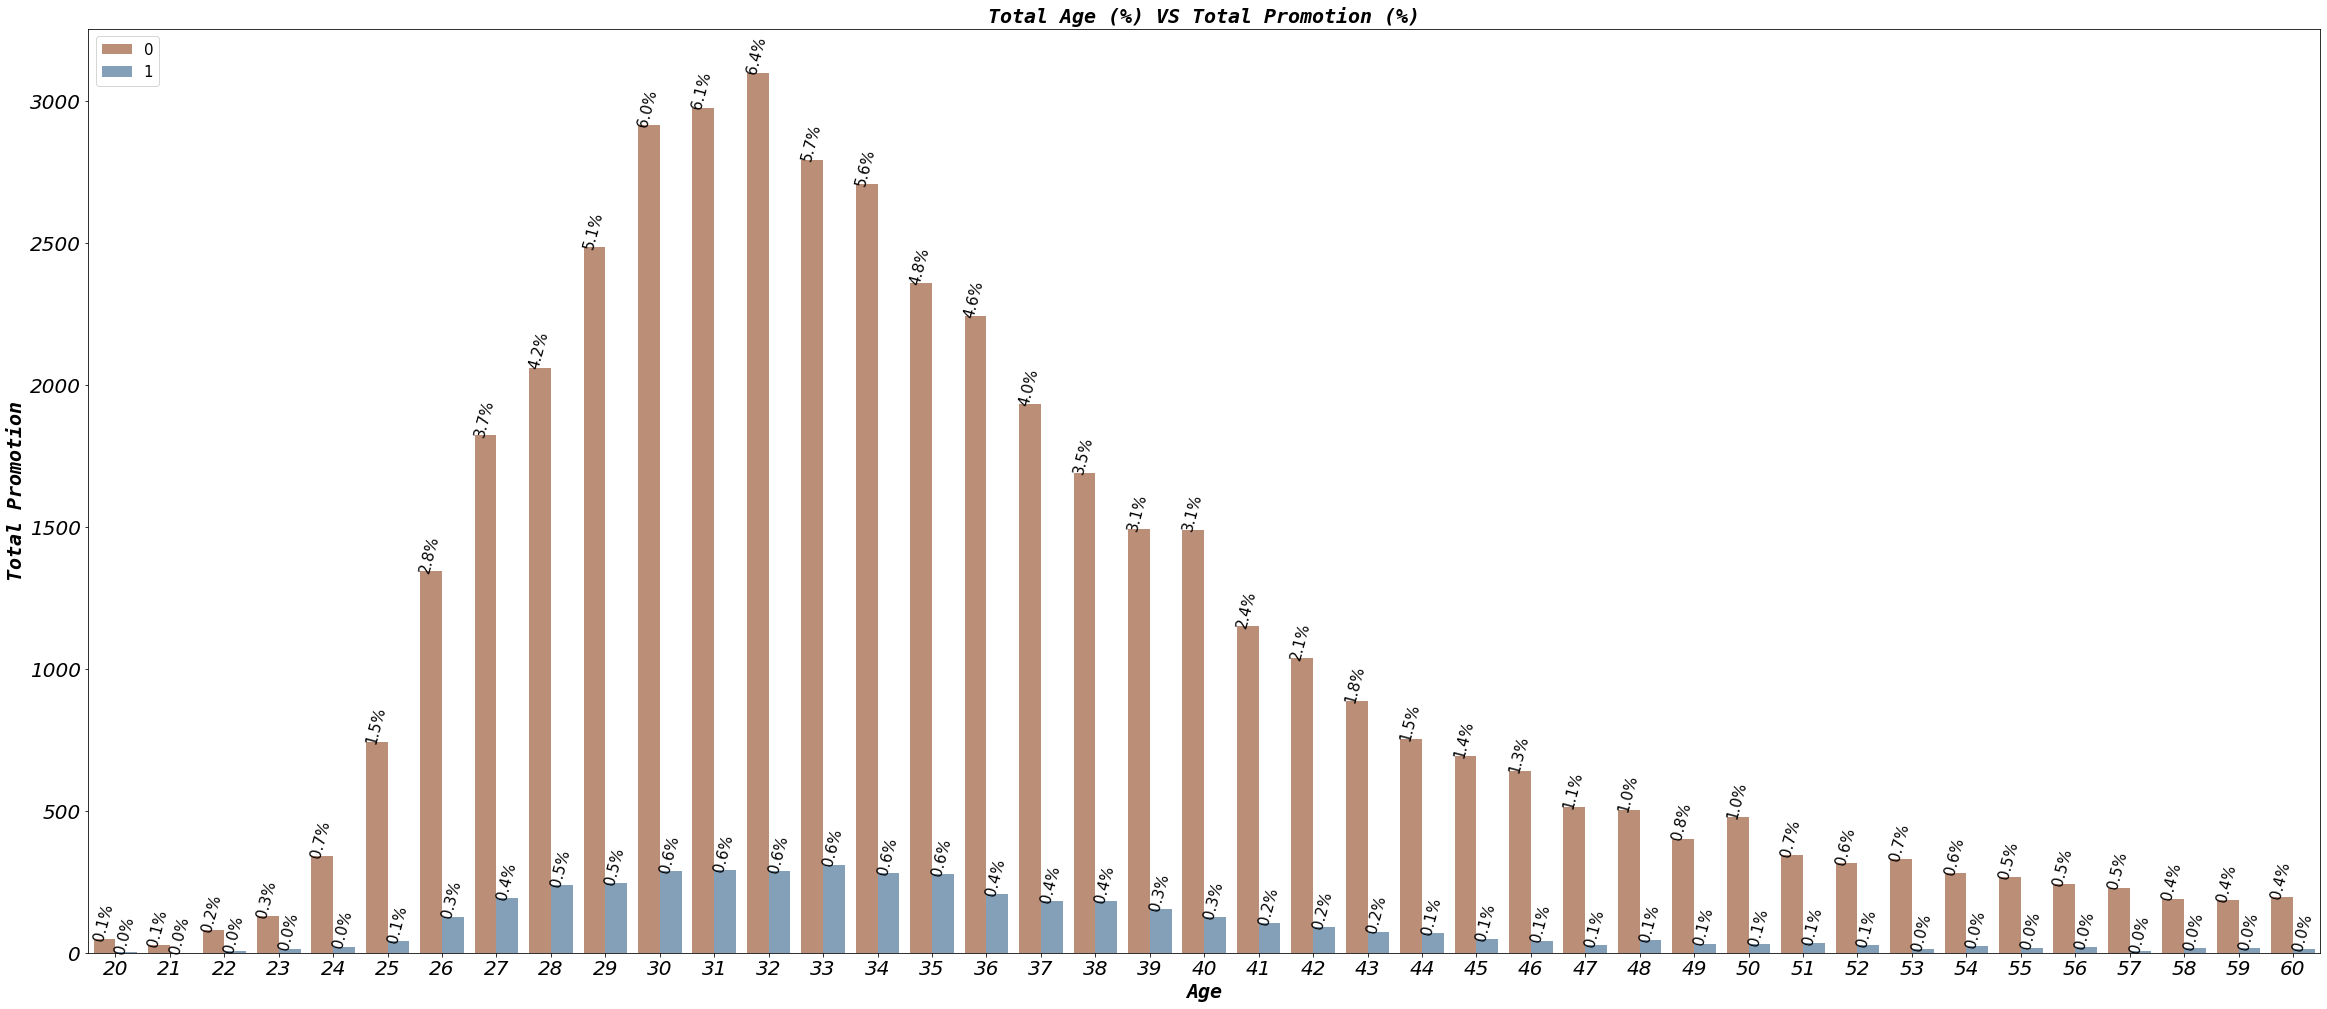

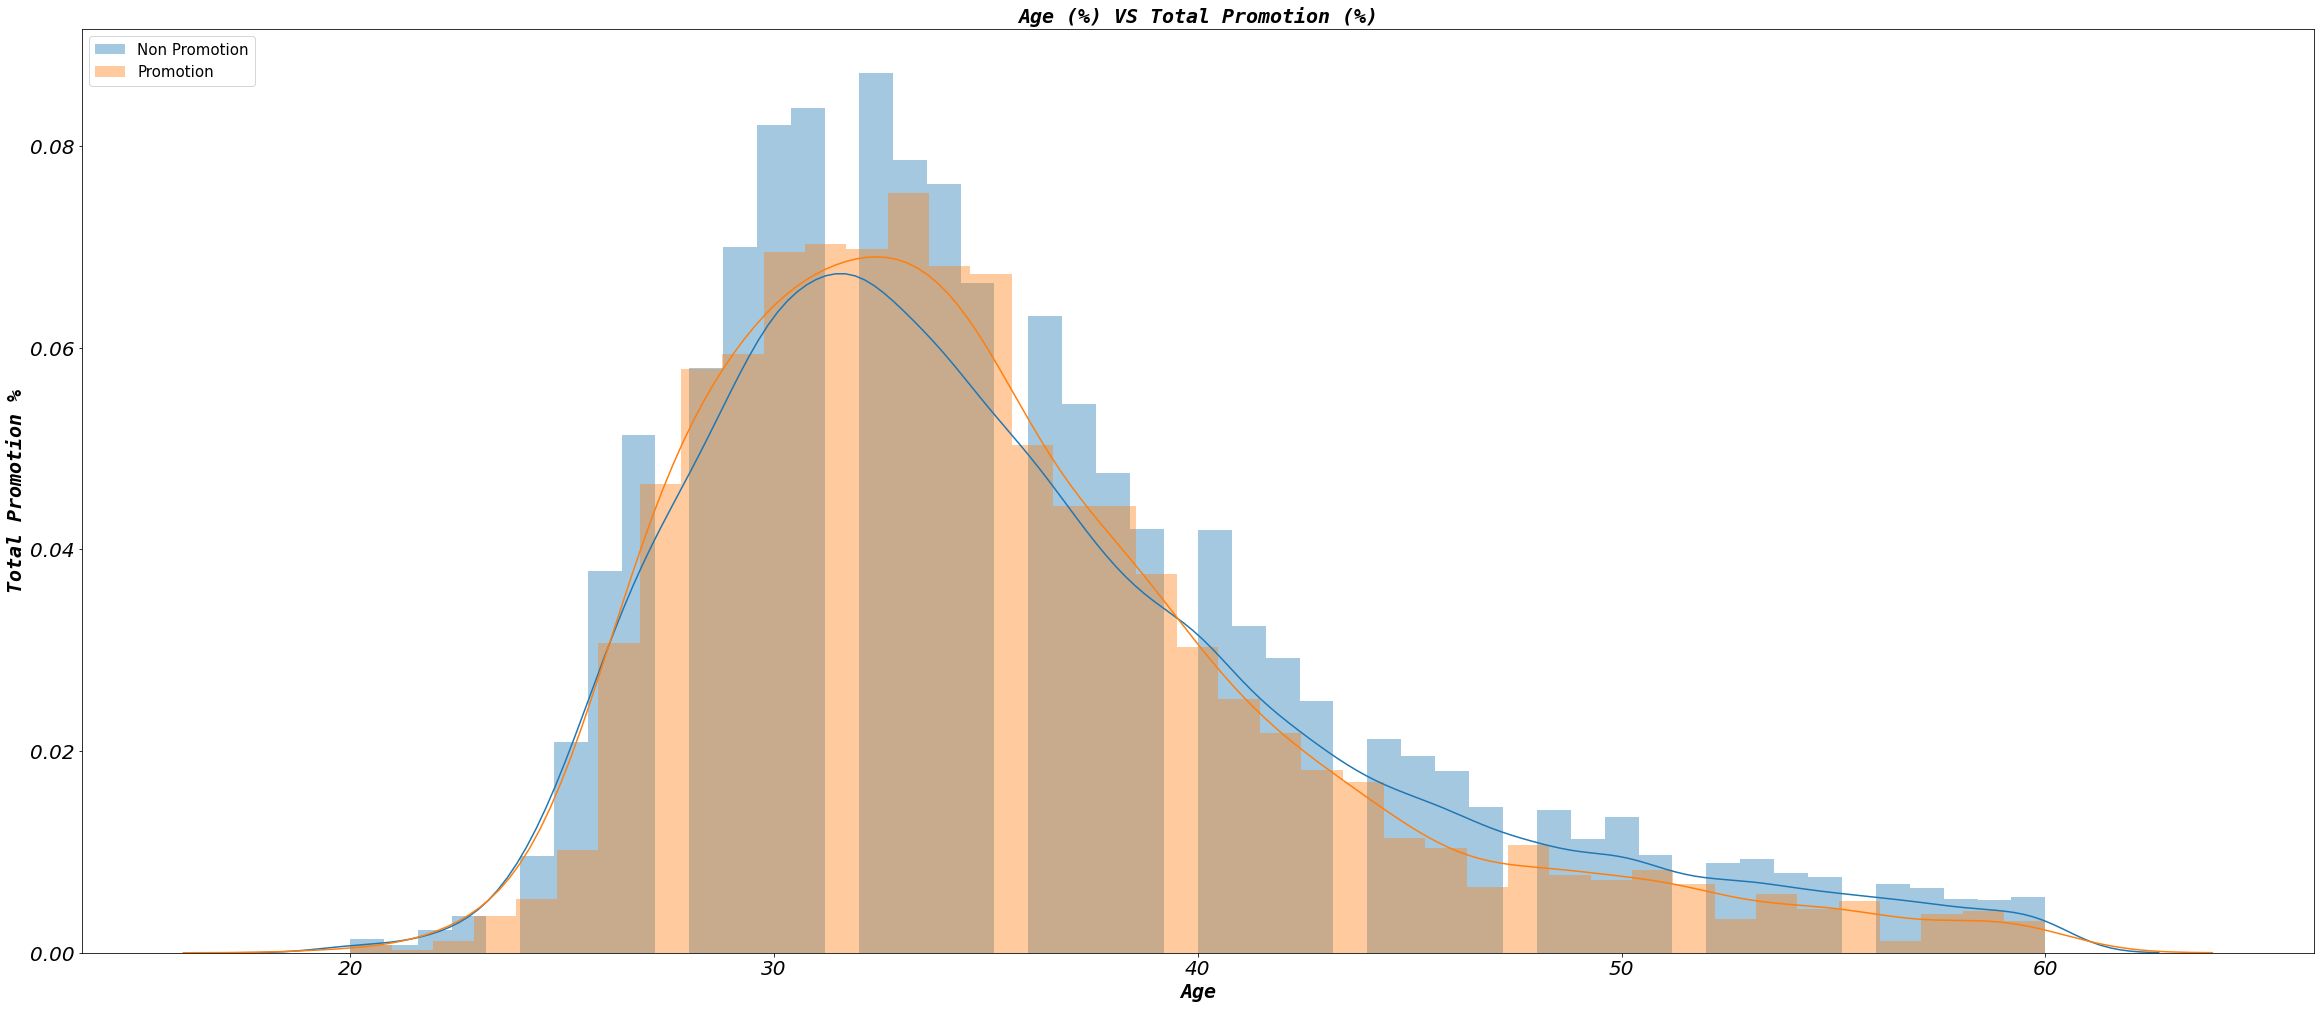

In [52]:
plt.figure(figsize=(40,17))
ax = sns.countplot(x='age', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Total Age',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Age', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total Age', size=20, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=15,rotation=70, horizontalalignment='left')
plt.show()

plt.figure(figsize=(40,17))
ax = sns.countplot(x="age",data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right',size=20,rotation=50,)
    plt.xticks(size=20,fontstyle='italic')
    plt.yticks(size=20,fontstyle='italic')
    plt.title('Total Age',size=20,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Age', fontstyle='italic', size=20, family='monospace',weight=900)
    plt.ylabel('Total Age', size=20, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(40,17))
ax = sns.countplot(x='age', data=df, hue="is_promoted", palette = 'twilight_shifted_r')
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Total Age VS Total Promotion',fontstyle='italic',family='monospace', weight=900,size=20)
plt.xlabel('Age', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total Promotion', size=20, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=15,rotation=70, horizontalalignment='left')
plt.legend(loc="upper left", fontsize=15)
plt.show()

plt.figure(figsize=(40,17))
ax = sns.countplot(x="age", hue="is_promoted", data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=15,rotation=75, horizontalalignment='right')
    plt.xticks(size=20,fontstyle='italic')
    plt.yticks(size=20,fontstyle='italic')
    plt.title('Total Age (%) VS Total Promotion (%)',fontstyle='italic',family='monospace', weight=900,size=20)
    plt.xlabel('Age', fontstyle='italic', size=20, family='monospace',weight=900)
    plt.ylabel('Total Promotion', size=20, fontstyle='italic',family='monospace', weight=900)
plt.legend(loc="upper left", fontsize=15)
plt.show()

plt.figure(figsize=(40,17))
ax = sns.distplot(df[df['is_promoted'] == 0]['age'], label = 'Non Promotion')
ax = sns.distplot(df[df['is_promoted'] == 1]['age'],  label = 'Promotion')        
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Age (%) VS Total Promotion (%)',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Age', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total Promotion %', size=20, fontstyle='italic',family='monospace', weight=900)
plt.legend(loc="upper left", fontsize=15)
plt.show()

- Insight : 
  - Karyawan yang paling banyak berumur dari 30 tahun sampai dengan 34 tahun dengan total persentase diatast 6%
  - Karyawan dari umur 30 tahun sampai 34 tahun paling banyak mendapatkan promosi dibandingkan karyawan umurnya kurang dari 30 tahun dan sedangkan karyawan yang mendapatkan promosi lebih dari 35 tahun lebih banyak tidak mendapatkan promosi.

In [53]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,avg_training_score_range
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,Low
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,Excellent
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,Low
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,Low
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,Good


In [54]:
pd.crosstab(index=df['awards_won?'],columns='count')

col_0,count
awards_won?,
0,47534
1,1126


In [55]:
pd.crosstab(index=df['awards_won?'],columns='count',normalize=True).round(2)

col_0,count
awards_won?,
0,0.98
1,0.02


In [56]:
pd.crosstab(index=df['awards_won?'],columns=df['is_promoted'])

is_promoted,0,1
awards_won?,,
0,43806,3728
1,622,504


In [57]:
pd.crosstab(index=df['awards_won?'],columns=df['is_promoted'],normalize=True).round(2).sort_values(1,ascending=False)

is_promoted,0,1
awards_won?,,
0,0.90,0.08
1,0.01,0.01


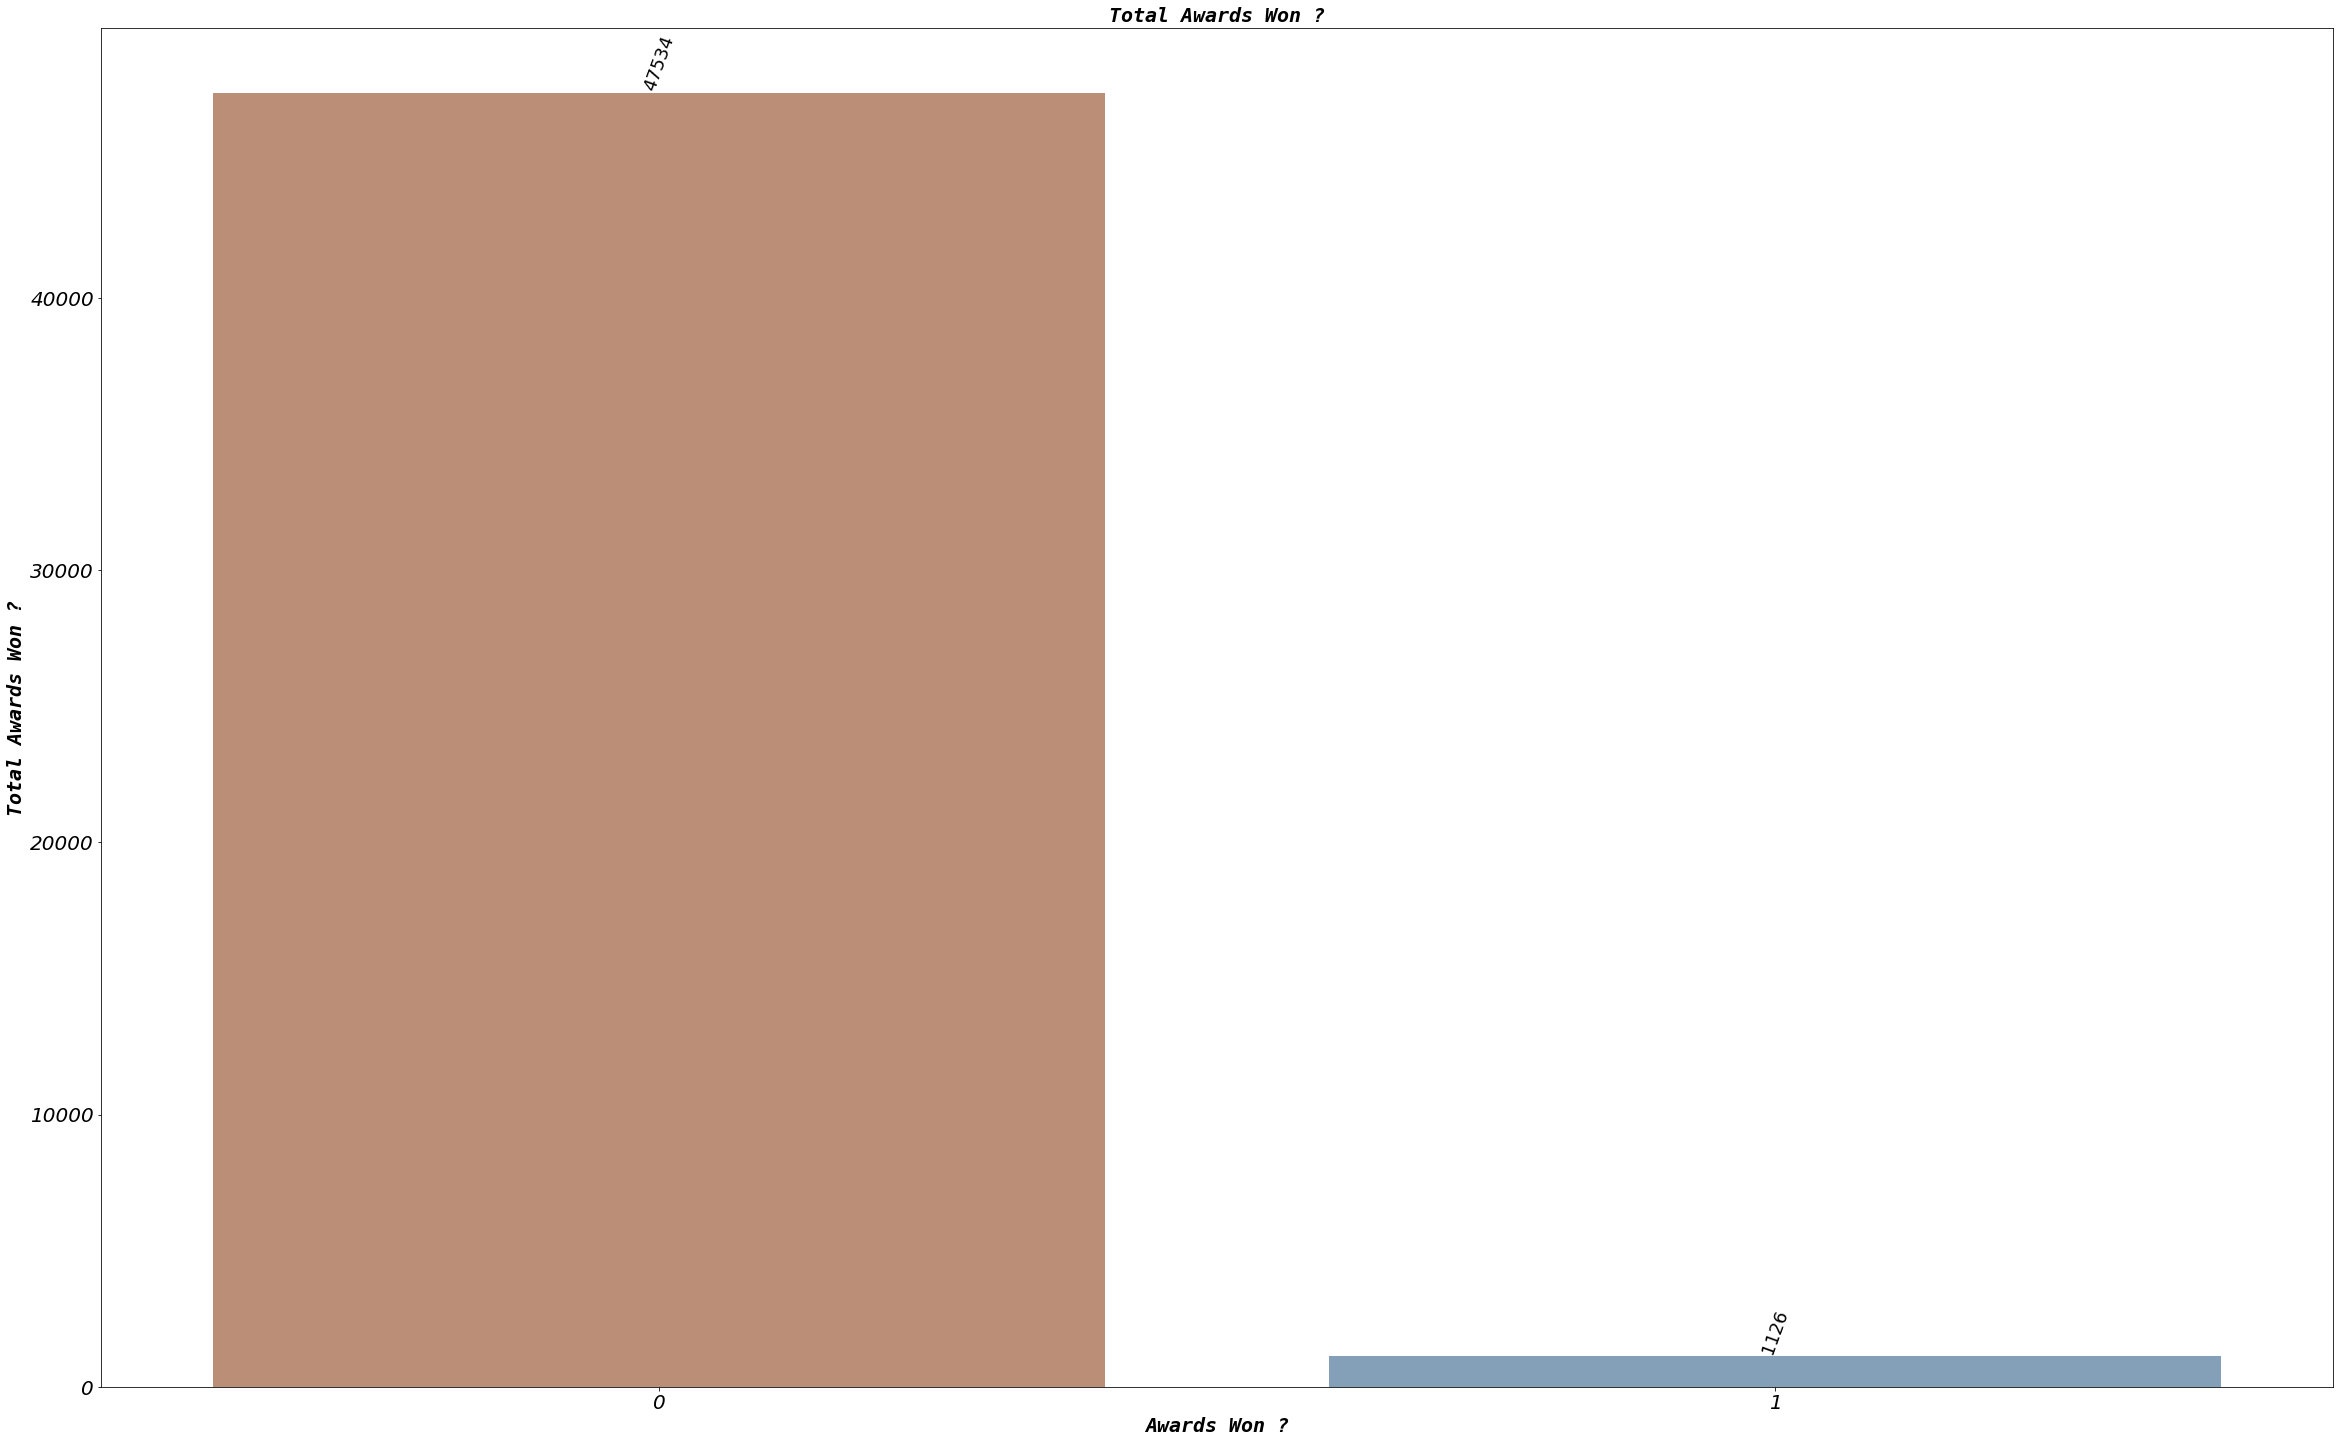

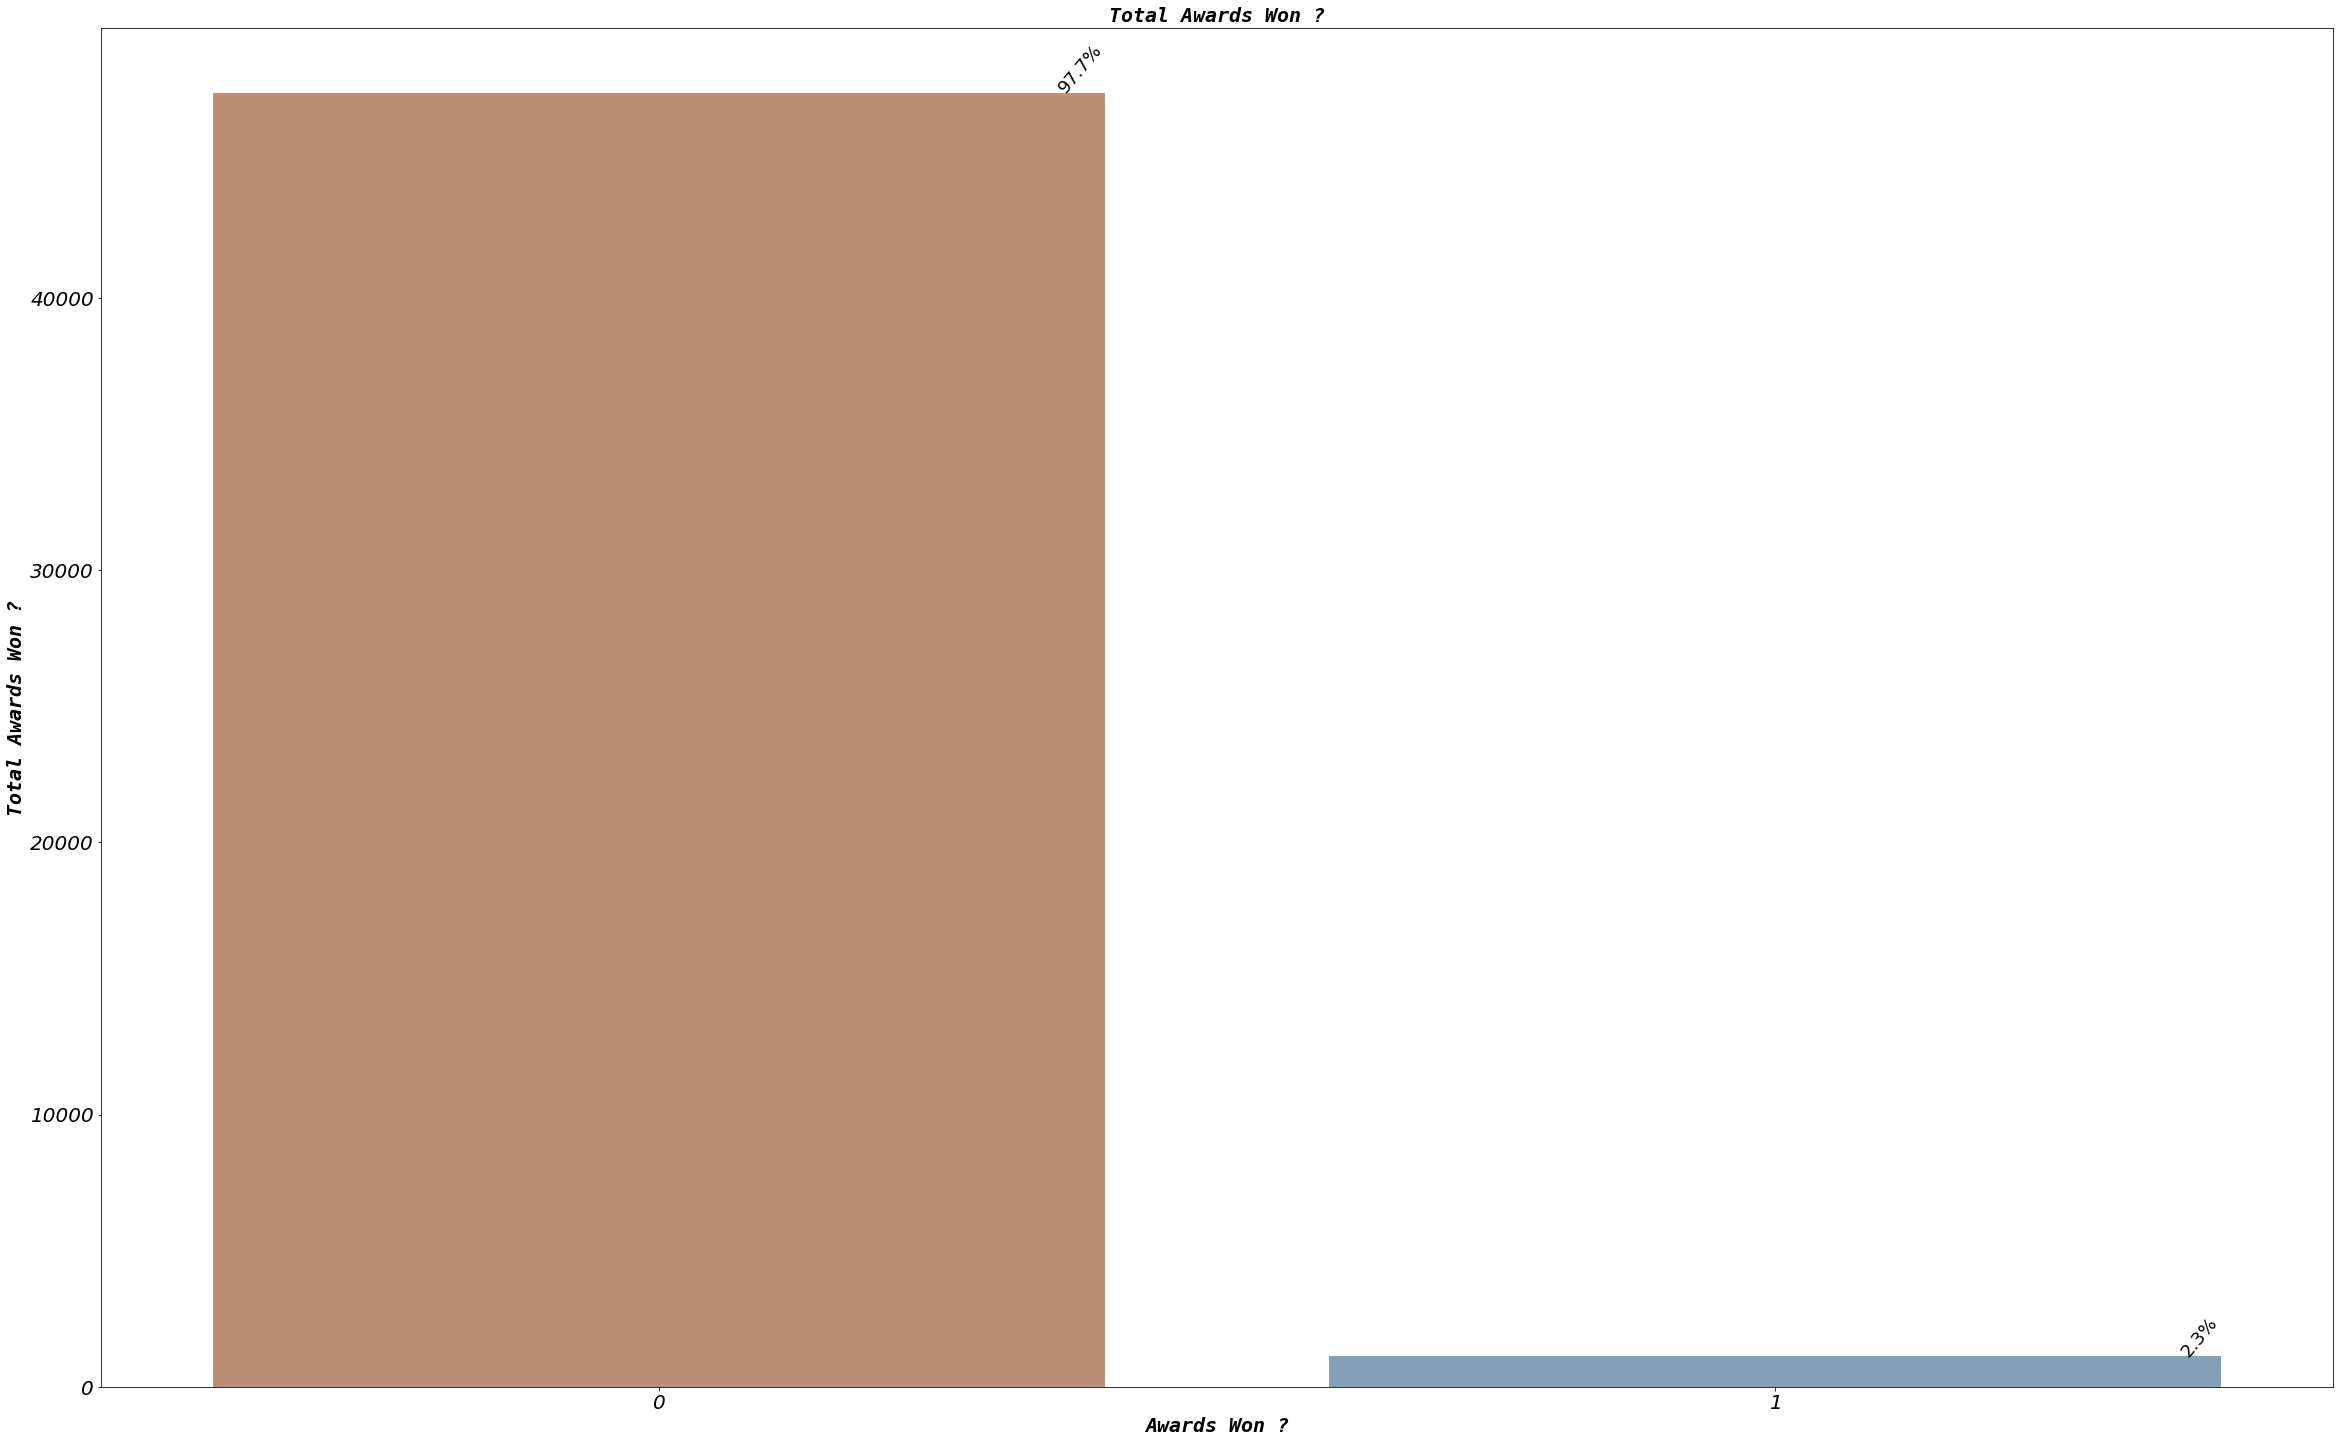

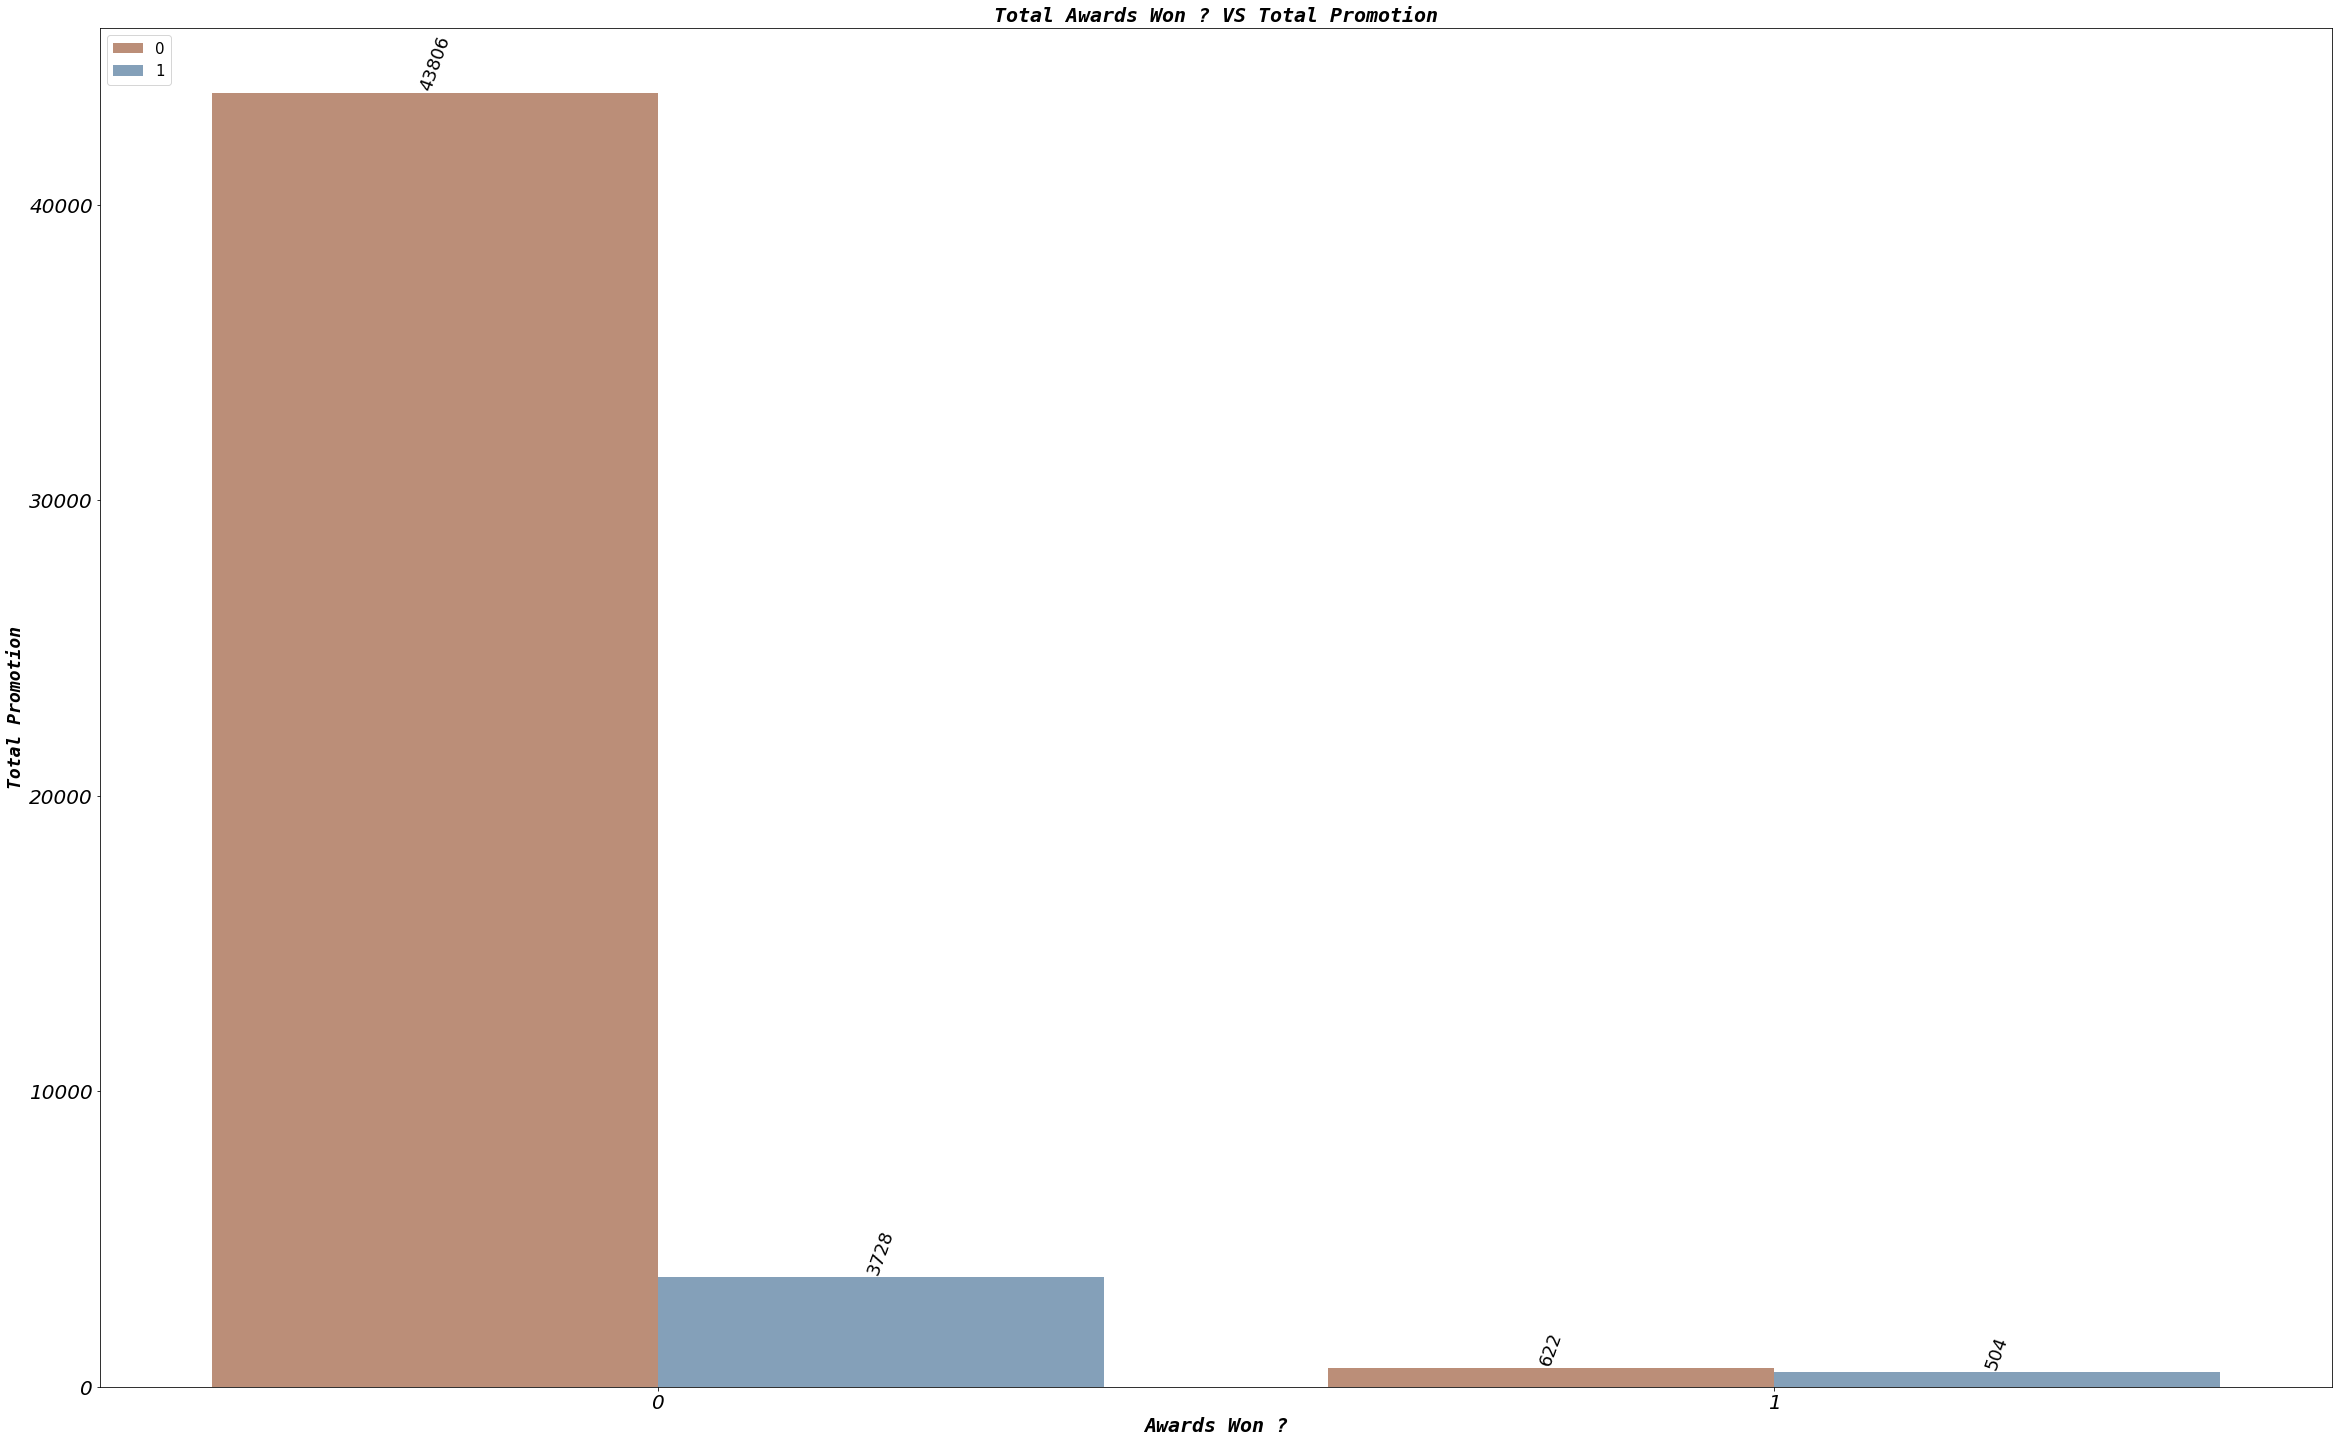

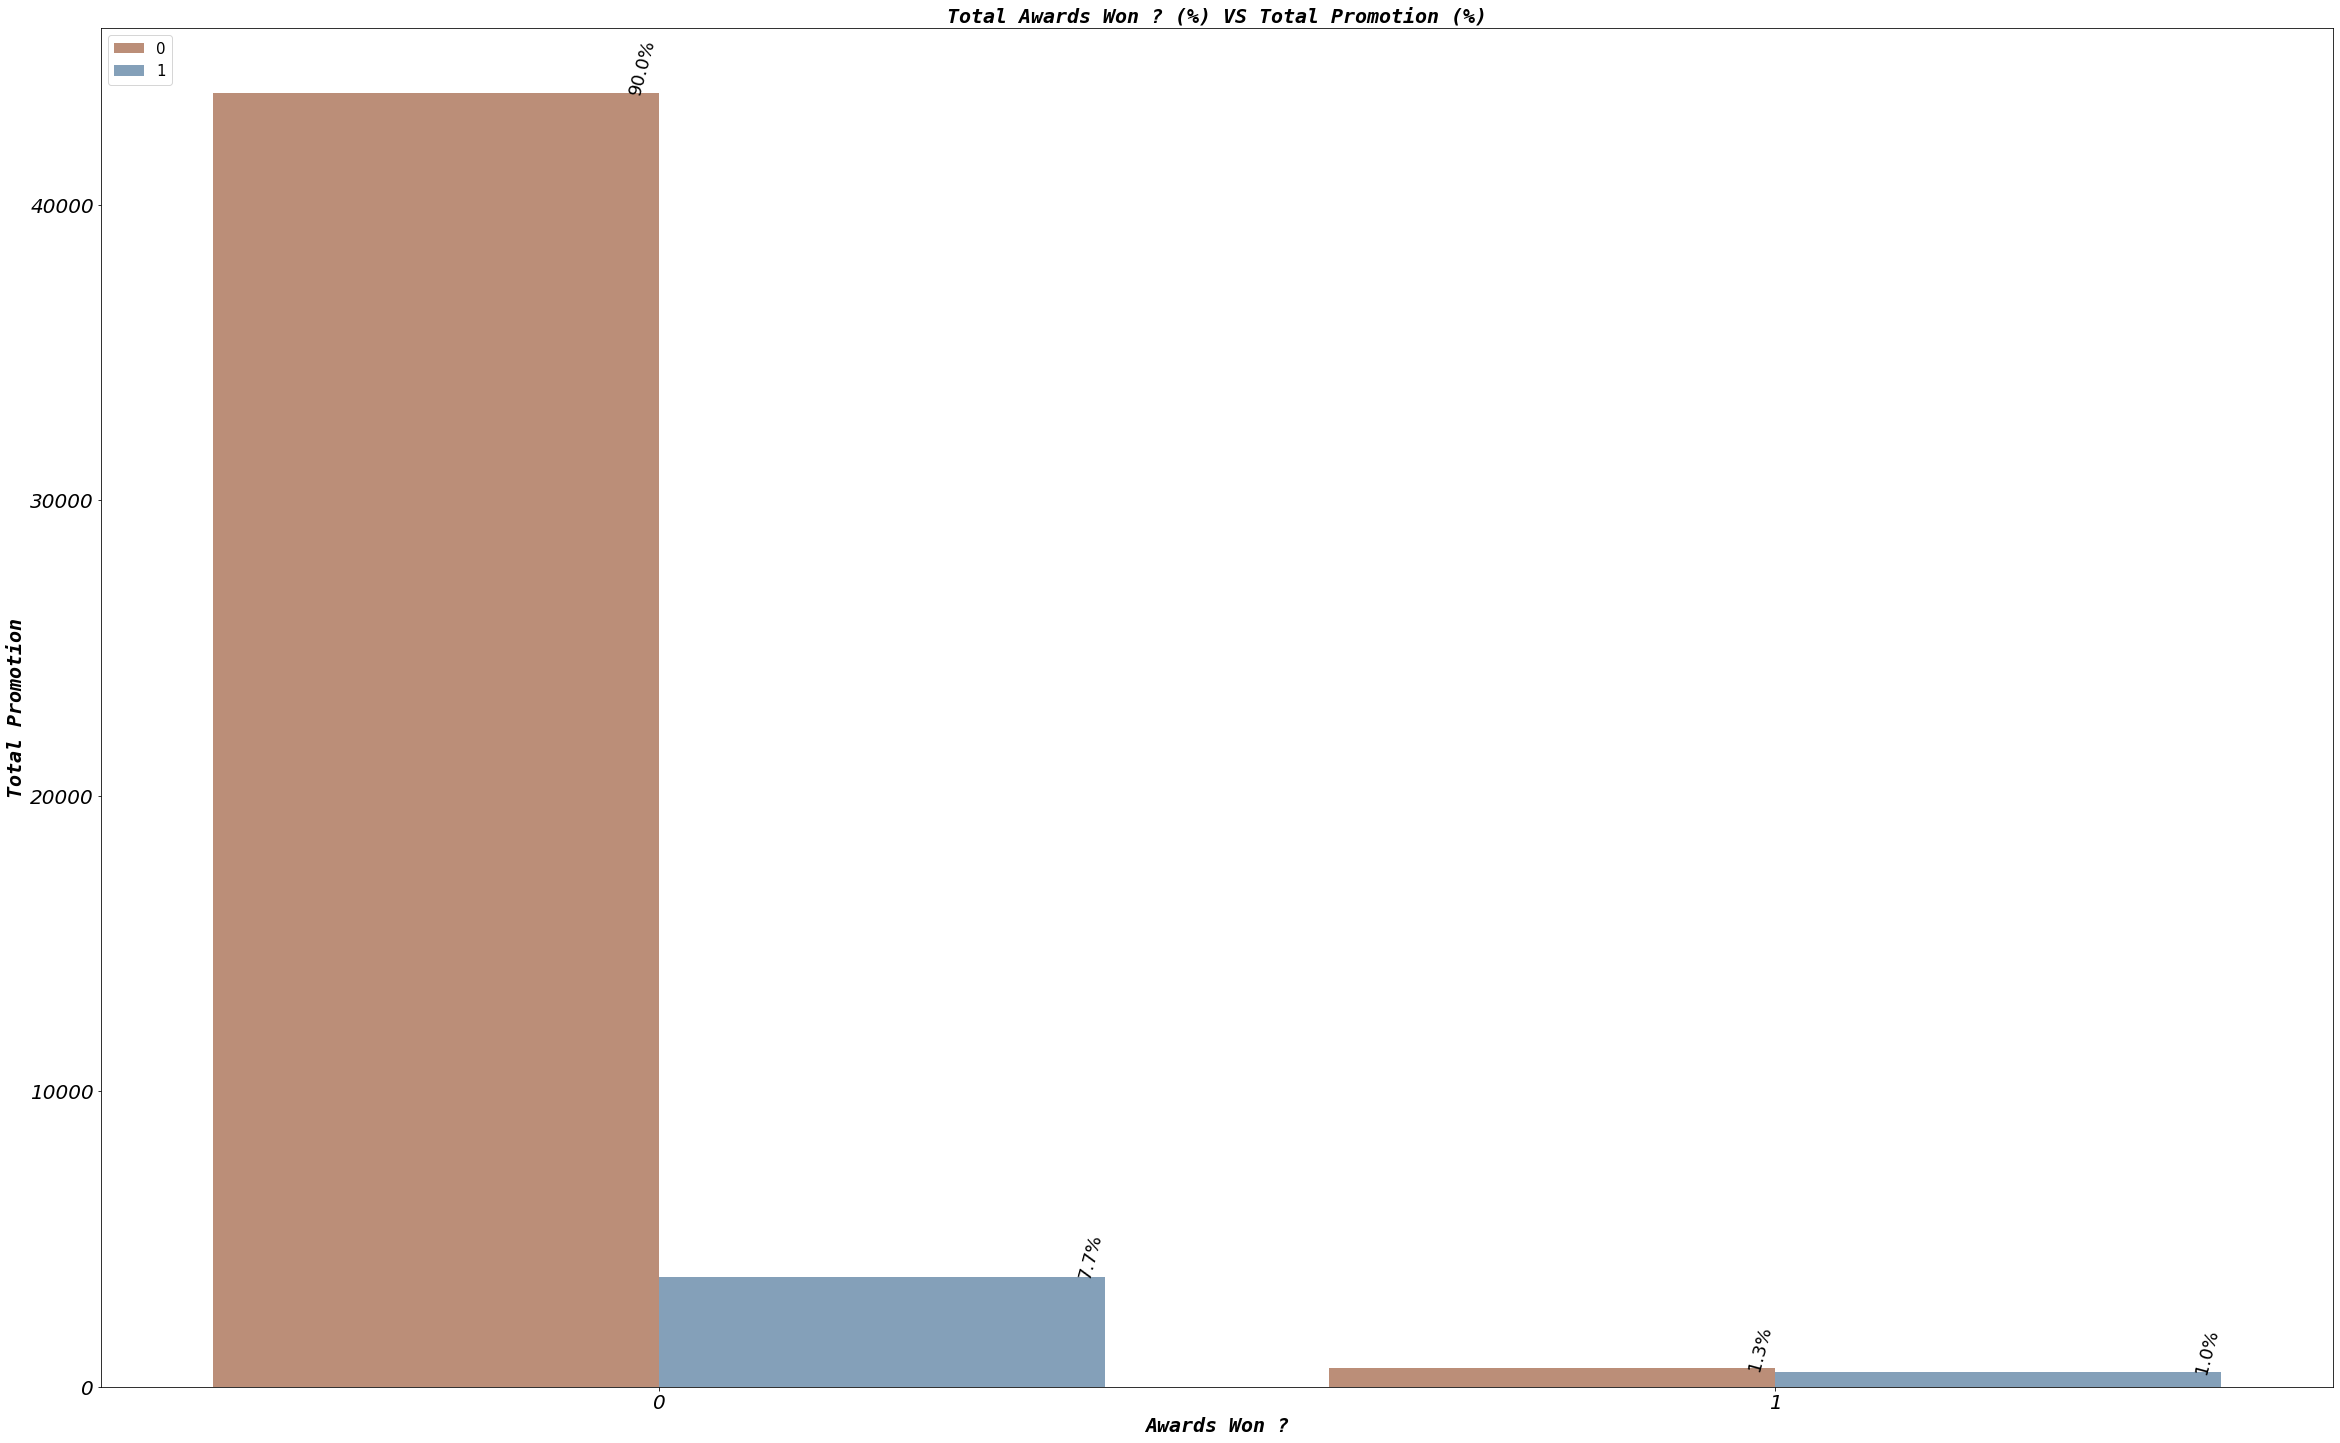

In [58]:
plt.figure(figsize=(40,25))
ax = sns.countplot(x='awards_won?', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Total Awards Won ?',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Awards Won ?', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total Awards Won ?', size=20, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=18,rotation=70, horizontalalignment='left')
plt.show()

plt.figure(figsize=(40,25))
ax = sns.countplot(x="awards_won?",data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right',size=18,rotation=50,)
    plt.xticks(size=20,fontstyle='italic')
    plt.yticks(size=20,fontstyle='italic')
    plt.title('Total Awards Won ?',size=20,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Awards Won ?', fontstyle='italic', size=20, family='monospace',weight=900)
    plt.ylabel('Total Awards Won ?', size=20, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(40,25))
ax = sns.countplot(x='awards_won?', data=df, hue="is_promoted", palette = 'twilight_shifted_r')
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Total Awards Won ? VS Total Promotion',fontstyle='italic',family='monospace', weight=900,size=20)
plt.xlabel('Awards Won ?', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total Promotion', size=18, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=18,rotation=70, horizontalalignment='left')
plt.legend(loc="upper left", fontsize=15)
plt.show()

plt.figure(figsize=(40,25))
ax = sns.countplot(x="awards_won?", hue="is_promoted", data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),size=18,rotation=75, horizontalalignment='right')
    plt.xticks(size=20,fontstyle='italic')
    plt.yticks(size=20,fontstyle='italic')
    plt.title('Total Awards Won ? (%) VS Total Promotion (%)',fontstyle='italic',family='monospace', weight=900,size=20)
    plt.xlabel('Awards Won ?', fontstyle='italic', size=20, family='monospace',weight=900)
    plt.ylabel('Total Promotion', size=20, fontstyle='italic',family='monospace', weight=900)
plt.legend(loc="upper left", fontsize=15)
plt.show()

- Insight :
  - Jumlah karyawan yang tidak memenangkan perhargaan lebih banyak 97,7% lebih banyak dari pada karyawan yang memenangkan penghargaan, dan karyawan yang mendapatkan promosi lebih banyak berasal dari karyawan yang tidak mendapatkan penghargaan sebanyak 7,7% dibandingkan karyawan yang pernah mendapatkan penghargaan.

#### **Avg Training Score**

In [59]:
pd.crosstab(index=df['avg_training_score_range'],columns='count').sort_values('count',ascending=False).round(2)

col_0,count
avg_training_score_range,
Low,22438
Good,14912
Excellent,11310


In [60]:
pd.crosstab(index=df['avg_training_score_range'],columns='count',normalize=True).sort_values('count',ascending=False).round(2)

col_0,count
avg_training_score_range,
Low,0.46
Good,0.31
Excellent,0.23


#### **Avg Training Score & Promoted**

In [61]:
pd.crosstab(index=df['avg_training_score_range'],columns=df['is_promoted'])

is_promoted,0,1
avg_training_score_range,,
Excellent,9632,1678
Good,13450,1462
Low,21346,1092


In [62]:
pd.crosstab(index=df['avg_training_score_range'],columns=df['is_promoted'],normalize=True).round(2).sort_values(1,ascending=False)

is_promoted,0,1
avg_training_score_range,,
Excellent,0.20,0.03
Good,0.28,0.03
Low,0.44,0.02


#### **Visualization Avg Training Score & Promoted**

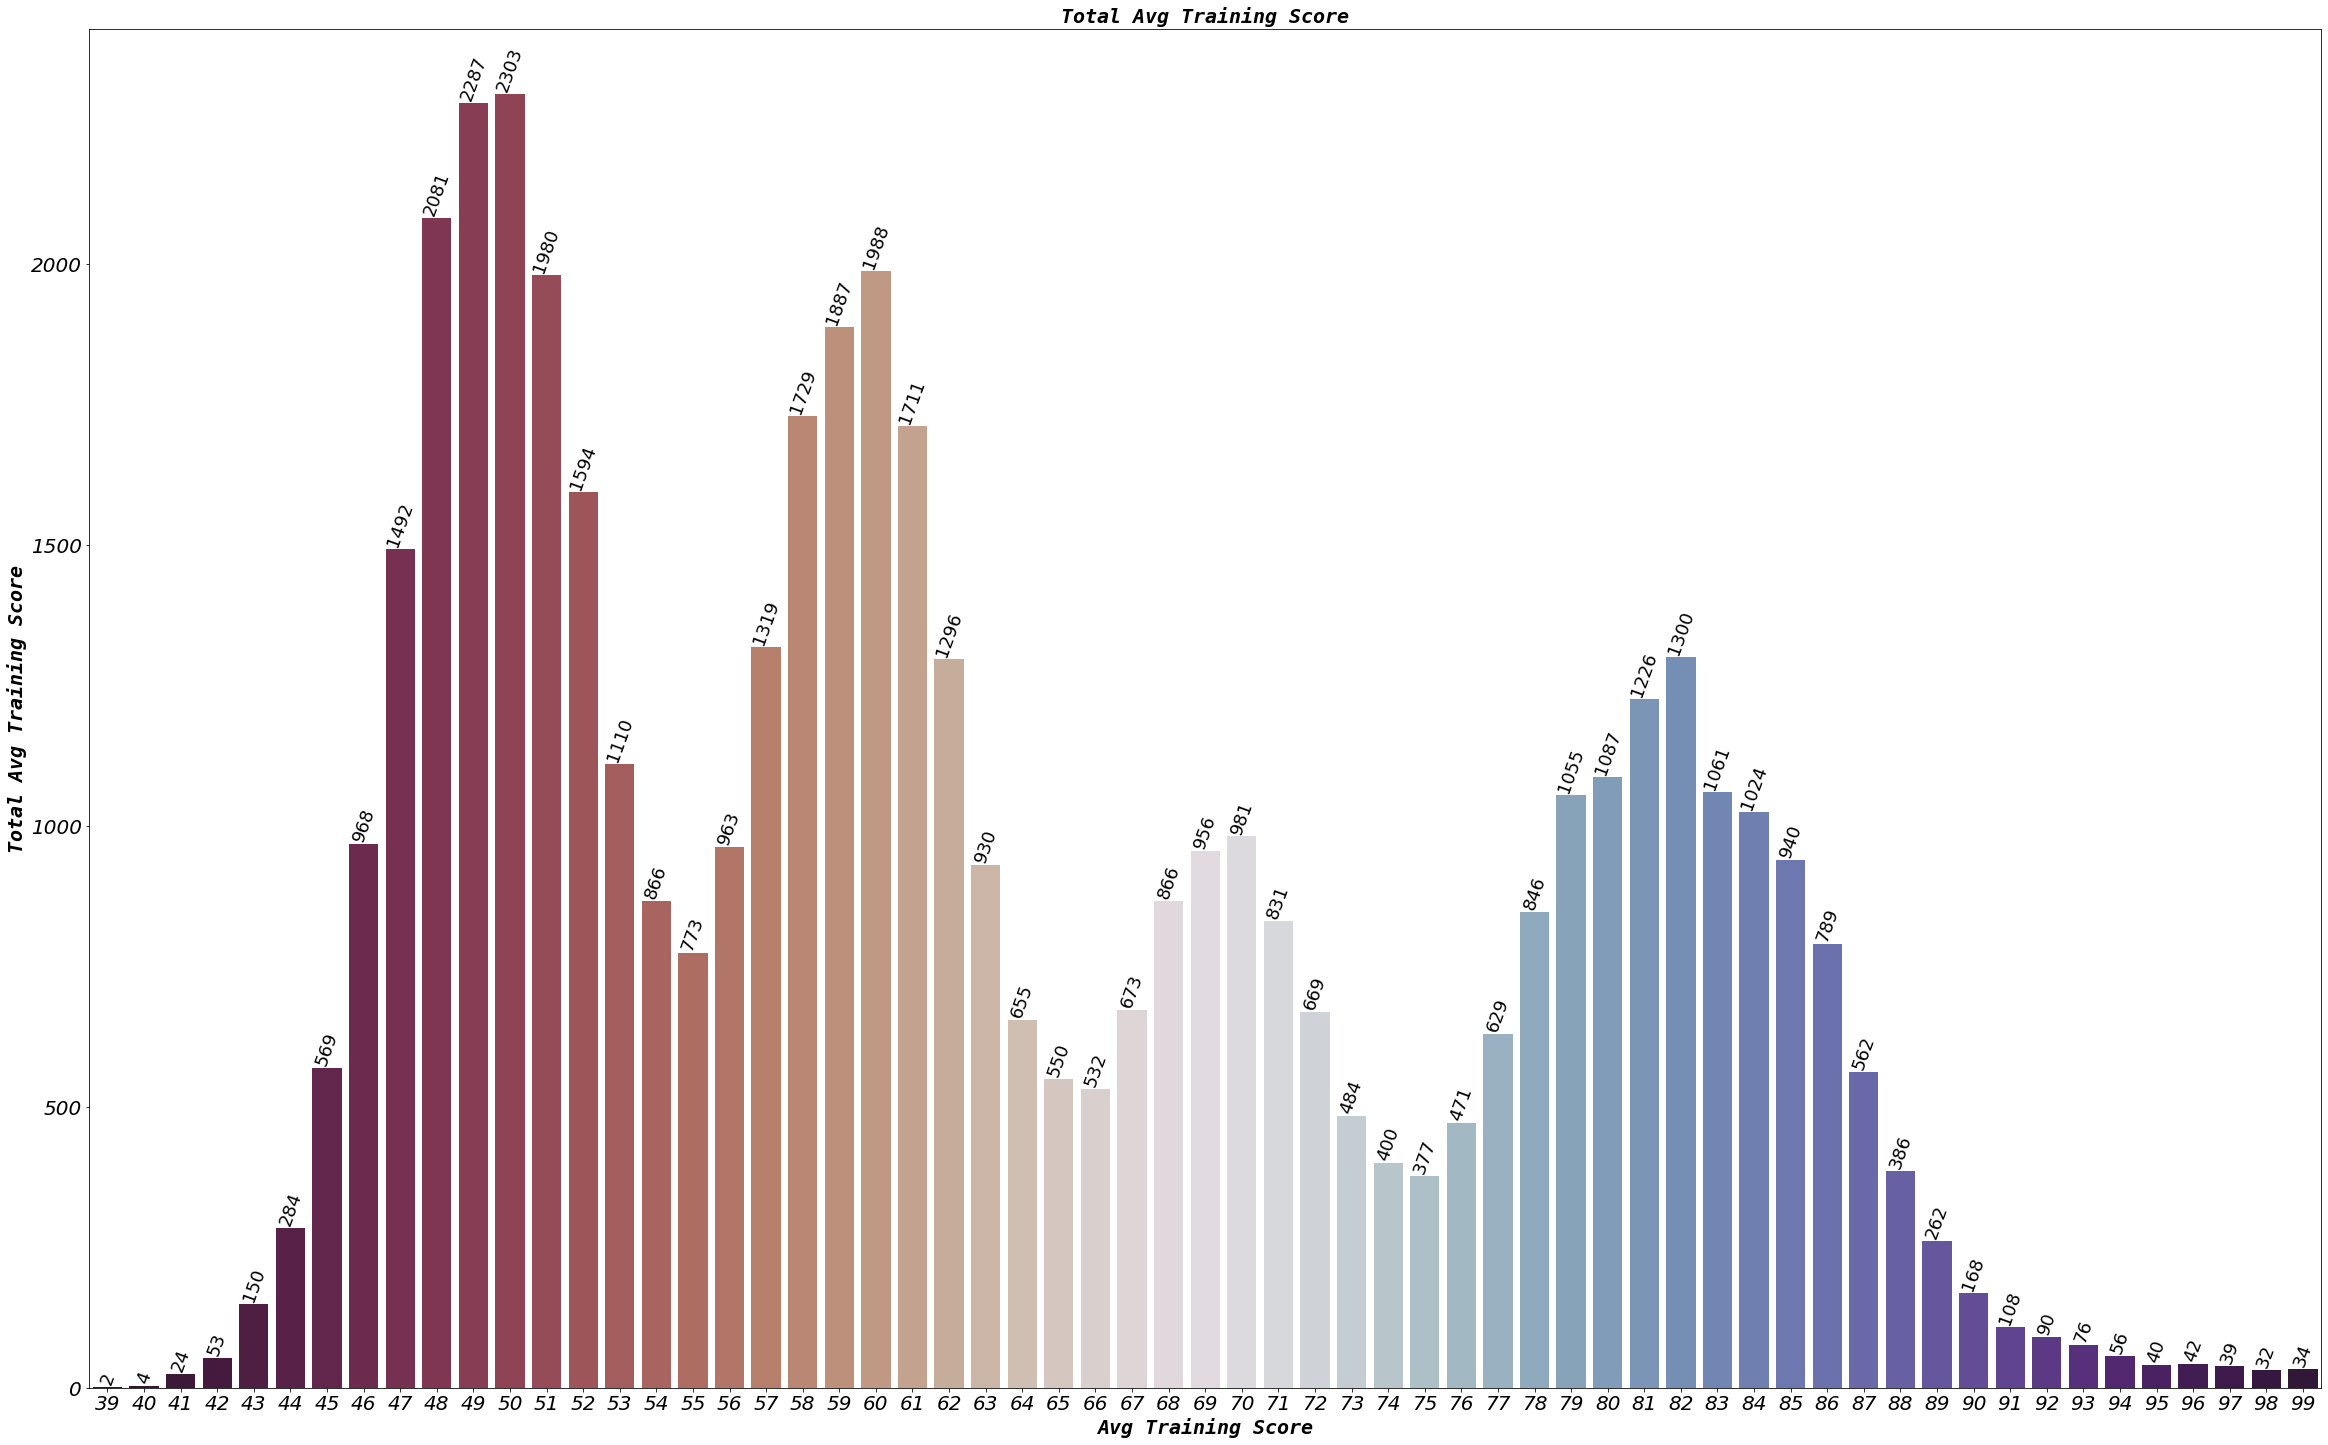

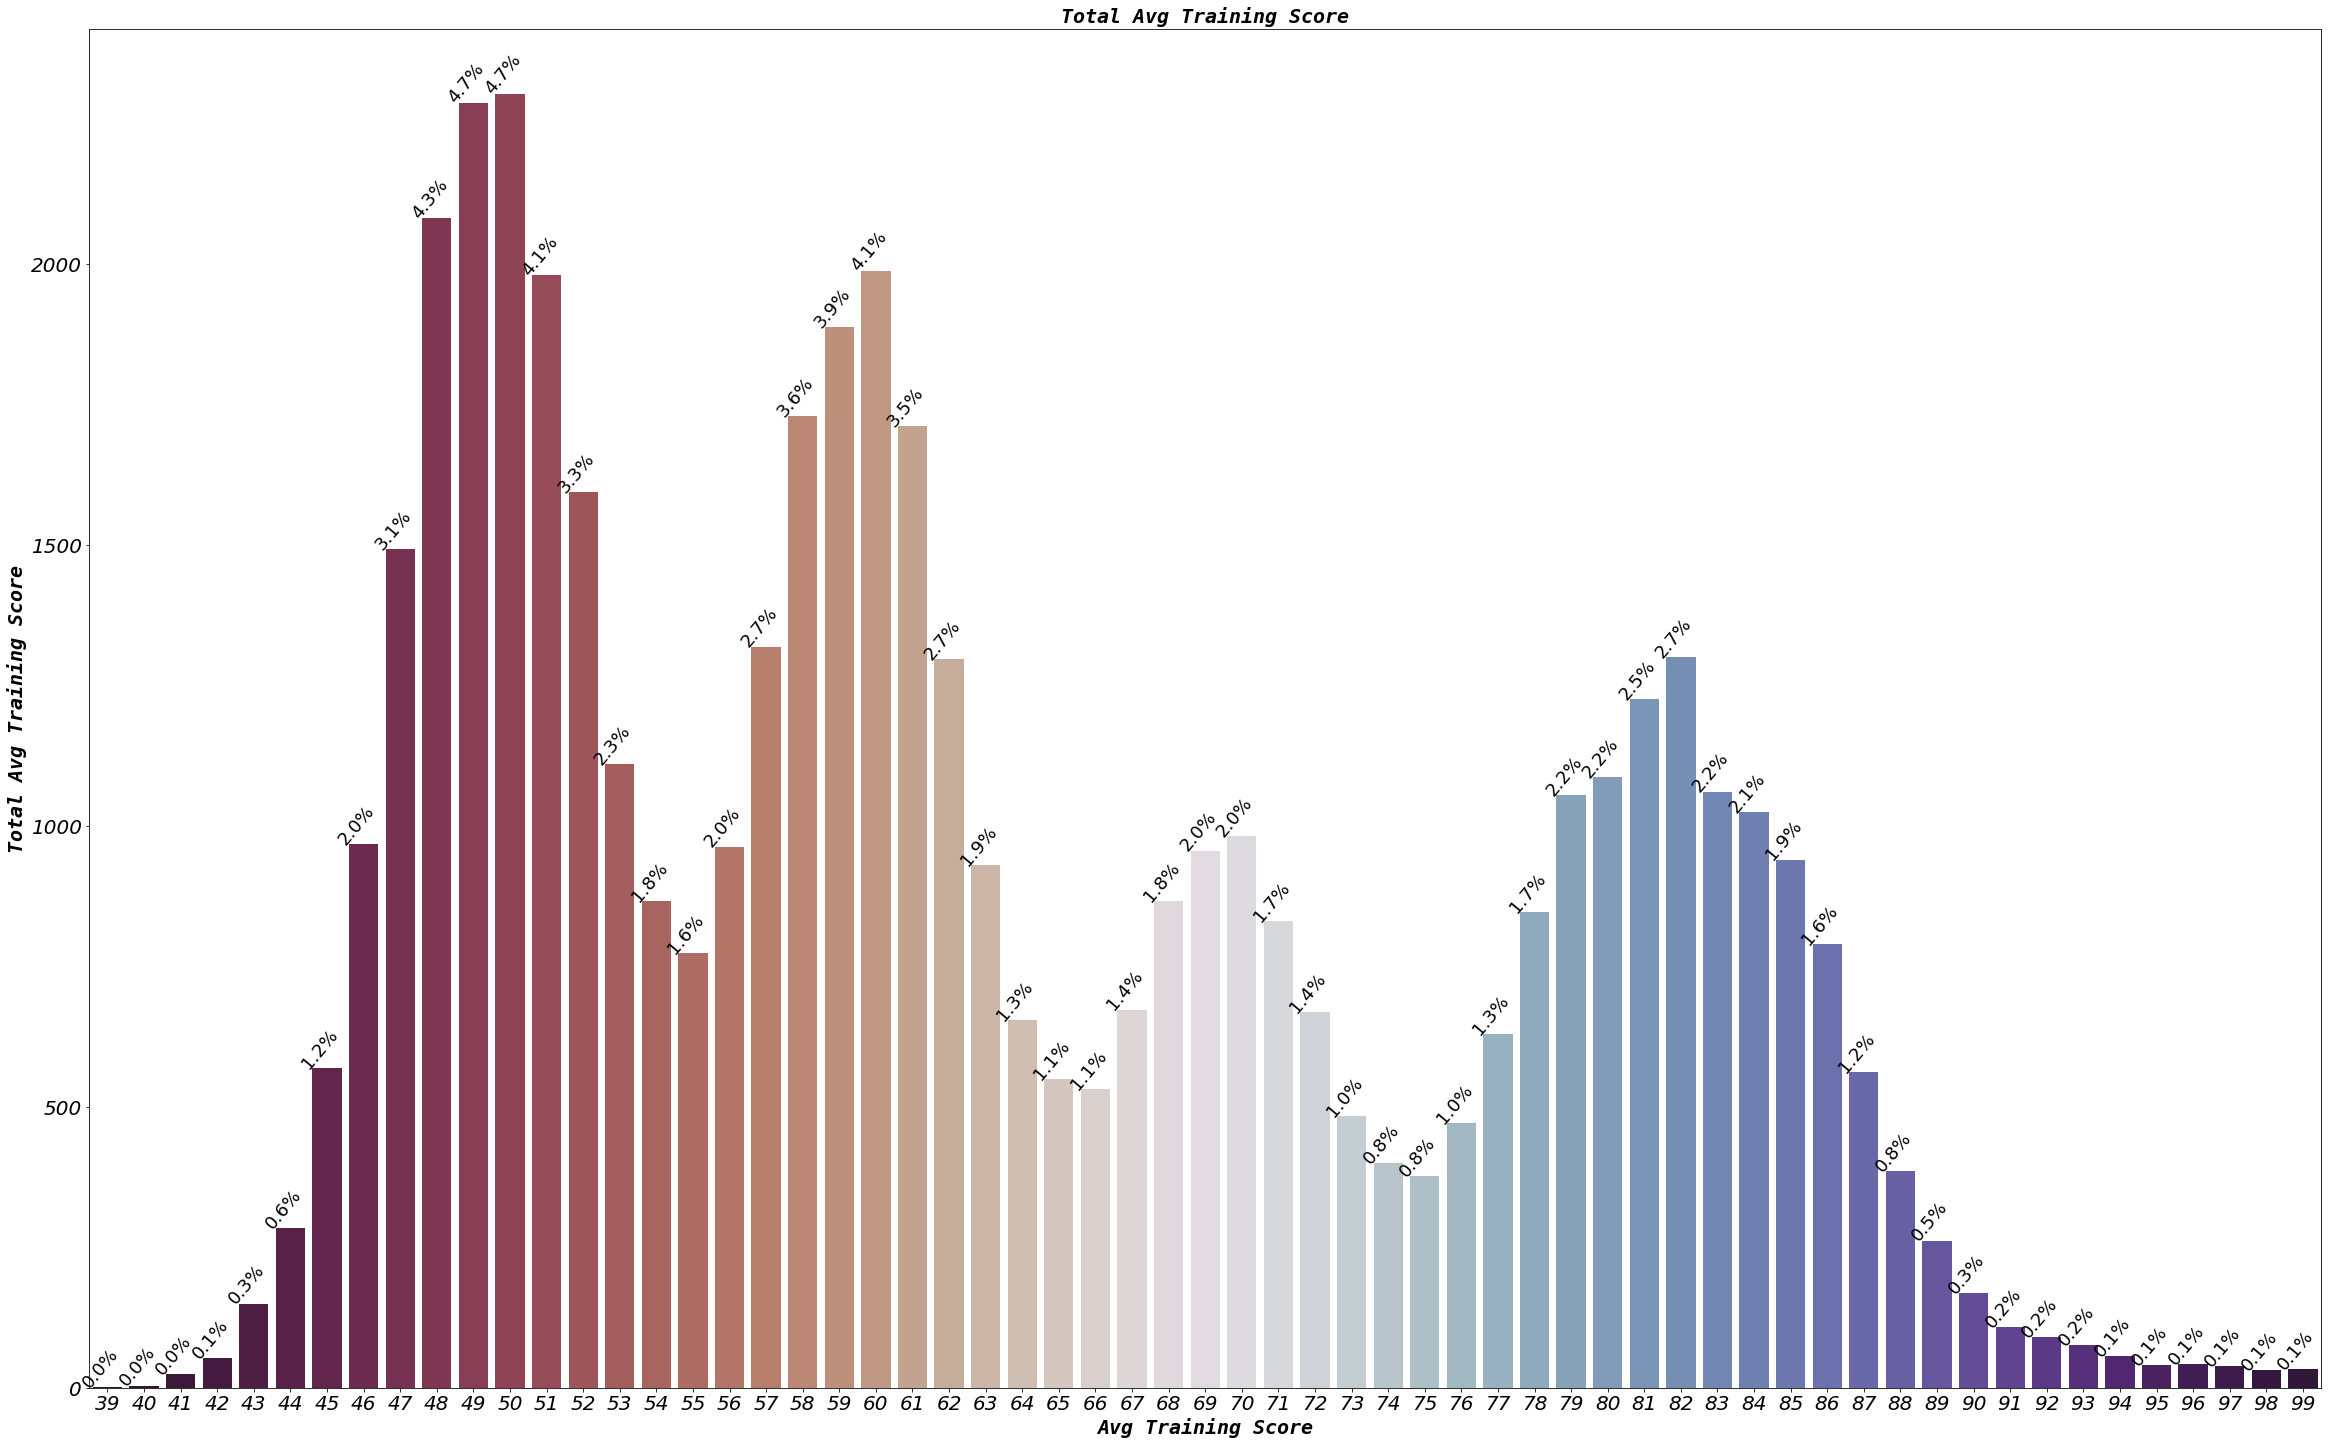

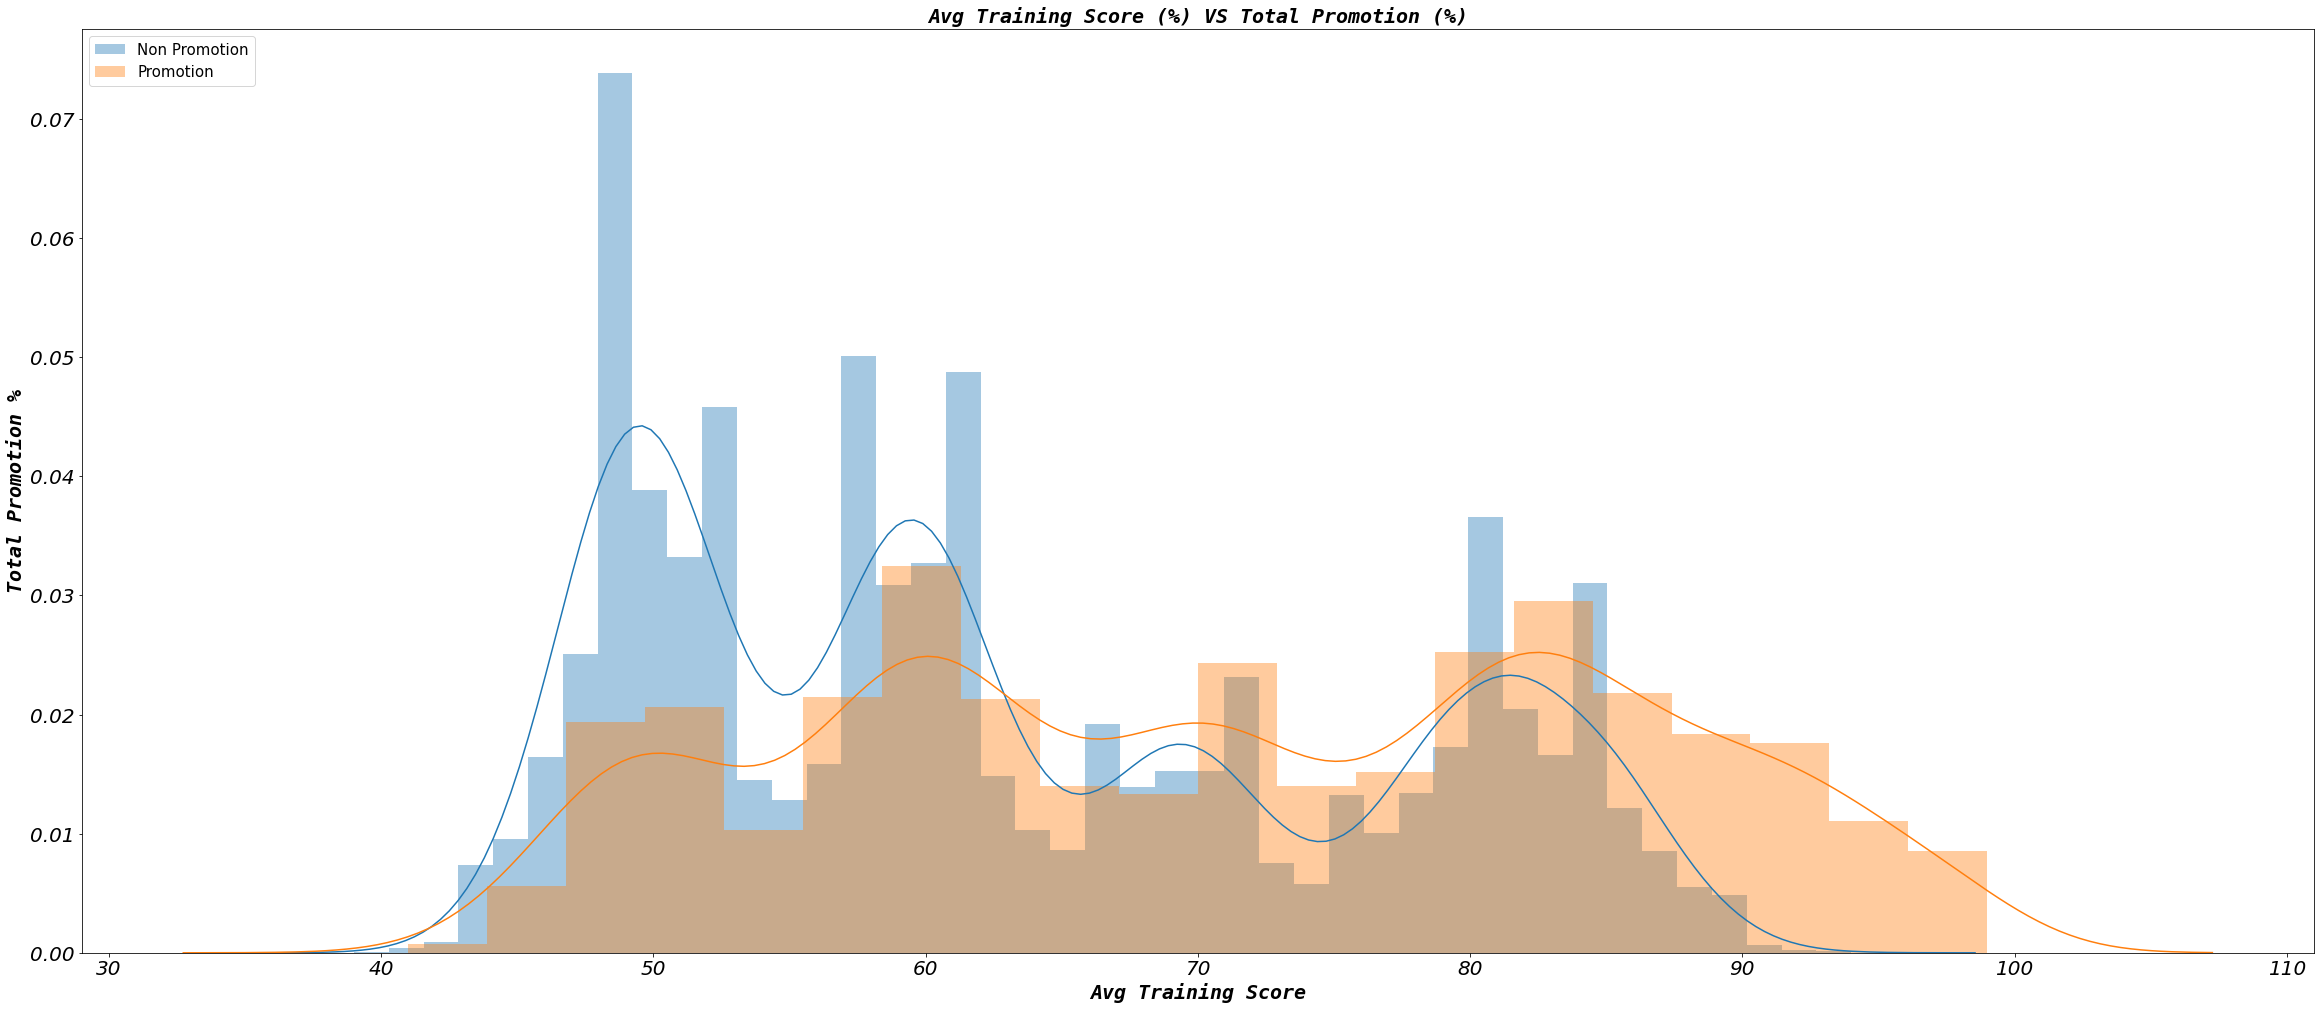

In [63]:
plt.figure(figsize=(40,25))
ax = sns.countplot(x='avg_training_score', data=df, palette = 'twilight_shifted_r')
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Total Avg Training Score',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Avg Training Score', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total Avg Training Score', size=20, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=18,rotation=70, horizontalalignment='left')
plt.show()

plt.figure(figsize=(40,25))
ax = sns.countplot(x="avg_training_score",data=df,palette = 'twilight_shifted_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right',size=18,rotation=50,)
    plt.xticks(size=20,fontstyle='italic')
    plt.yticks(size=20,fontstyle='italic')
    plt.title('Total Avg Training Score',size=20,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Avg Training Score', fontstyle='italic', size=20, family='monospace',weight=900)
    plt.ylabel('Total Avg Training Score', size=20, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(40,17))
ax = sns.distplot(df[df['is_promoted'] == 0]['avg_training_score'], label = 'Non Promotion')
ax = sns.distplot(df[df['is_promoted'] == 1]['avg_training_score'],  label = 'Promotion')        
plt.xticks(size=20,fontstyle='italic')
plt.yticks(size=20,fontstyle='italic')
plt.title('Avg Training Score (%) VS Total Promotion (%)',size=20,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Avg Training Score', fontstyle='italic', size=20, family='monospace',weight=900)
plt.ylabel('Total Promotion %', size=20, fontstyle='italic',family='monospace', weight=900)
plt.legend(loc="upper left", fontsize=15)
plt.show()

- Insight :
  - Karyawan yang mendapatkan skor low (skor dibawah 60) lebih banyak dibandingkan karyawan yang mendapatkan skor excellent (di atas 80). Namun karyawan yang paling banyak mendapatkan promosi berasal dari karyawan yang memiliki skor excellent (skor di atas 80).

# **4. MACHINE LEARNING**

##### **Feature Selection**

<AxesSubplot:>

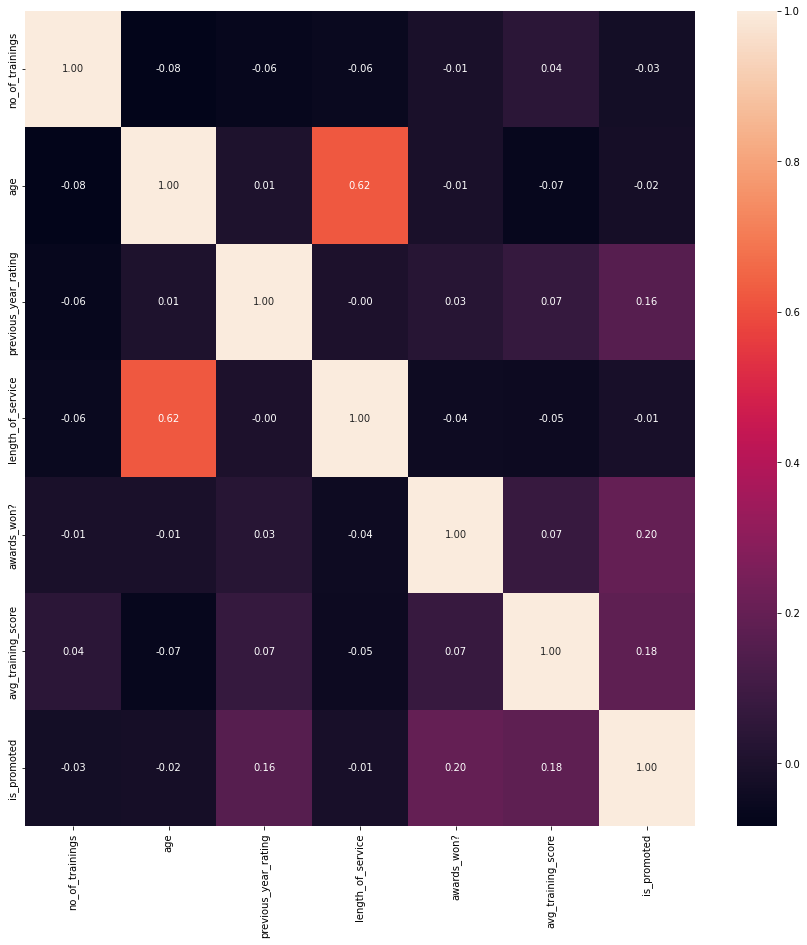

In [64]:
df_heatmaps = df.select_dtypes(['int64','float'])
plt.figure(figsize=(15,15))
sns.heatmap(df_heatmaps.corr(),annot=True, fmt='.2f')

- Insight :
  - kolom ini akan di hapus karena tidak digunakan karena memiliki korelasi negatif dan memiliki tingkat korelasi yang rendah.

In [65]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,avg_training_score_range
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,Low
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,Excellent
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,Low
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,Low
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,Good


In [66]:
df['gender']=df['gender'].apply(lambda x: 1 if x=='m' else 0)

In [67]:
df.drop(columns=['no_of_trainings','age','length_of_service'],inplace=True)

In [68]:
df.head()

,department,region,education,gender,recruitment_channel,previous_year_rating,awards_won?,avg_training_score,is_promoted,avg_training_score_range
0,Sales & Marketing,region_7,Master's & above,0,sourcing,5.0,0,49,0,Low
1,Operations,region_22,Bachelor's,1,other,5.0,0,60,0,Excellent
2,Sales & Marketing,region_19,Bachelor's,1,sourcing,3.0,0,50,0,Low
3,Sales & Marketing,region_23,Bachelor's,1,other,1.0,0,50,0,Low
4,Technology,region_26,Bachelor's,1,other,3.0,0,73,0,Good


#### **Pipeline Machine Learning**

In [69]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['department','education','recruitment_channel','avg_training_score_range','awards_won?','previous_year_rating']),
    ('binary', ce.BinaryEncoder(), ['region'])],remainder='passthrough')

#### **Variabel Machine Learning**

In [70]:
X = df.drop('is_promoted',axis=1)
y = df['is_promoted']

#### **Pola Train dan Test Machine Learning**

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

#### **Data Frame Dari Tranformasi Pipeline di Variabel Machine Learning**

In [72]:
cek_hasil_tranformer = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names())
cek_hasil_tranformer.head()

,onehot__x0_Finance,onehot__x0_HR,onehot__x0_Legal,onehot__x0_Operations,onehot__x0_Procurement,onehot__x0_R&D,onehot__x0_Sales & Marketing,onehot__x0_Technology,onehot__x1_Below Secondary,onehot__x1_Master's & above,...,onehot__x5_4.0,onehot__x5_5.0,binary__region_0,binary__region_1,binary__region_2,binary__region_3,binary__region_4,binary__region_5,gender,avg_training_score
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,58.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,88.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,86.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,87.0


#### **Modeling Machine Learning**

In [73]:
model_rl = KNeighborsClassifier()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()

#### **Benchmarking Train Model Machine Learning**

In [74]:
model_machine_learning = [model_rl,model_dt,model_rf,model_xgb]

score_accuracy_mean_model_train_machinelearning = []
score_recall_mean_model_train_machinelearning = []
score_precision_mean_model_train_machinelearning = []
score_f1_mean_model_train_machinelearning = []

for i in model_machine_learning:
    cross_validation_classification = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('transformer',transformer),
        ('model_machine_learning',i)])

    model_crossval_acc_train = cross_val_score(estimator,X_train,y_train,cv=cross_validation_classification,scoring='accuracy')
    model_crossval_recall_train = cross_val_score(estimator,X_train,y_train,cv=cross_validation_classification,scoring='recall')
    model_crossval_precision_train = cross_val_score(estimator,X_train,y_train,cv=cross_validation_classification,scoring='precision')
    model_crossval_f1_train = cross_val_score(estimator,X_train,y_train,cv=cross_validation_classification,scoring='f1')
    
    score_accuracy_mean_model_train_machinelearning.append(model_crossval_acc_train.mean())
    score_recall_mean_model_train_machinelearning.append(model_crossval_recall_train.mean())
    score_precision_mean_model_train_machinelearning.append(model_crossval_precision_train.mean())
    score_f1_mean_model_train_machinelearning.append(model_crossval_f1_train.mean())
    
    print(model_crossval_acc_train,i)
    print(model_crossval_recall_train,i)
    print(model_crossval_precision_train,i)
    print(model_crossval_f1_train,i)

[0.92763834 0.927198   0.92527892 0.92454492 0.92689372] KNeighborsClassifier()
[0.21416526 0.20910624 0.18581081 0.18243243 0.18918919] KNeighborsClassifier()
[0.82467532 0.82119205 0.80291971 0.7826087  0.86153846] KNeighborsClassifier()
[0.34002677 0.33333333 0.30178326 0.29589041 0.31024931] KNeighborsClassifier()
[0.90723617 0.91046529 0.90516735 0.90913095 0.90898415] DecisionTreeClassifier()
[0.38617201 0.38954469 0.36486486 0.40202703 0.40033784] DecisionTreeClassifier()
[0.47302905 0.47261663 0.44399185 0.478      0.46812749] DecisionTreeClassifier()
[0.41372913 0.42619926 0.39405204 0.43430657 0.43223443] DecisionTreeClassifier()
[0.92646411 0.92558344 0.92043453 0.92615972 0.92733412] RandomForestClassifier()
[0.33389545 0.34569983 0.30574324 0.35810811 0.35472973] RandomForestClassifier()
[0.63291139 0.64423077 0.58389262 0.64831804 0.62654321] RandomForestClassifier()
[0.45182724 0.4379085  0.39553073 0.45887446 0.45299145] RandomForestClassifier()
[0.94011449 0.94114193 0

#### **Benchmarking Test Model Machine Learning**

In [75]:
model_machine_learning = [model_rl,model_dt,model_rf,model_xgb]

score_accuracy_mean_model_test_machinelearning = []
score_recall_mean_model_test_machinelearning = []
score_precision_mean_test_model_machinelearning = []
score_f1_mean_model_test_machinelearning = []

for i in model_machine_learning:
    cross_validation_classification = StratifiedKFold(n_splits=10)
    estimator = Pipeline([
        ('transformer',transformer),
        ('model_machine_learning',i)])

    model_crossval_acc_test = cross_val_score(estimator,X_test,y_test,cv=cross_validation_classification,scoring='accuracy')
    model_crossval_recall_test = cross_val_score(estimator,X_test,y_test,cv=cross_validation_classification,scoring='recall')
    model_crossval_precision_test = cross_val_score(estimator,X_test,y_test,cv=cross_validation_classification,scoring='precision')
    model_crossval_f1_test = cross_val_score(estimator,X_test,y_test,cv=cross_validation_classification,scoring='f1')
    
    score_accuracy_mean_model_test_machinelearning.append(model_crossval_acc_test.mean())
    score_recall_mean_model_test_machinelearning.append(model_crossval_recall_test.mean())
    score_precision_mean_test_model_machinelearning.append(model_crossval_precision_test.mean())
    score_f1_mean_model_test_machinelearning.append(model_crossval_f1_test.mean())
    
    print(model_crossval_acc_test,i)
    print(model_crossval_recall_test,i)
    print(model_crossval_precision_test,i)
    print(model_crossval_f1_test,i)

[0.93013699 0.92465753 0.92534247 0.92465753 0.9239726  0.91780822
 0.9239726  0.92534247 0.92186429 0.9266621 ] KNeighborsClassifier()
[0.2519685  0.21259843 0.22047244 0.18110236 0.18897638 0.14173228
 0.18897638 0.18897638 0.16535433 0.17322835] KNeighborsClassifier()
[0.82051282 0.72972973 0.73684211 0.79310345 0.75       0.62068966
 0.75       0.8        0.72413793 0.91666667] KNeighborsClassifier()
[0.38554217 0.32926829 0.33939394 0.29487179 0.30188679 0.23076923
 0.30188679 0.30573248 0.26923077 0.29139073] KNeighborsClassifier()
[0.9130137  0.89794521 0.89315068 0.88493151 0.88356164 0.88561644
 0.90342466 0.90068493 0.89376285 0.90130226] DecisionTreeClassifier()
[0.43307087 0.36220472 0.40944882 0.33070866 0.34645669 0.33070866
 0.4015748  0.42519685 0.39370079 0.35433071] DecisionTreeClassifier()
[0.48148148 0.40350877 0.36231884 0.34745763 0.36153846 0.34375
 0.42975207 0.432      0.3984375  0.41964286] DecisionTreeClassifier()
[0.43776824 0.38016529 0.37547893 0.31782946 

In [76]:
score_train = pd.DataFrame({ 'Model': ['Train Model KNN Regressor', 'Train Model DecisionTree Regressor', 'Train Model RandomForest Regressor', 'Train Model XGBoost Regressor'],
    'Score Accuracy': score_accuracy_mean_model_train_machinelearning,
    'Score Precision': score_precision_mean_model_train_machinelearning,
    'Score Recall': score_recall_mean_model_train_machinelearning,
    'Score F1': score_f1_mean_model_train_machinelearning})
print('Score Training :')
score_train.head()

Score Training :


,Model,Score Accuracy,Score Precision,Score Recall,Score F1
0,Train Model KNN Regressor,0.926311,0.818587,0.196141,0.316257
1,Train Model DecisionTree Regressor,0.908197,0.467153,0.388589,0.420104
2,Train Model RandomForest Regressor,0.925195,0.627179,0.339635,0.439426
3,Train Model XGBoost Regressor,0.940550,0.895891,0.357863,0.511336


In [77]:
score_testing = pd.DataFrame({ 'Model': ['Testing Model KNN Regressor', 'Testing Model DecisionTree Regressor', 'Testing Model RandomForest Regressor', 'Testing Model XGBoost Regressor'],
    'Score Accuracy': score_accuracy_mean_model_test_machinelearning,
    'Score Precision': score_precision_mean_test_model_machinelearning,
    'Score Recall': score_recall_mean_model_test_machinelearning,
    'Score F1': score_f1_mean_model_test_machinelearning})
print('Score Testing :')
score_testing.head()

Score Testing :


,Model,Score Accuracy,Score Precision,Score Recall,Score F1
0,Testing Model KNN Regressor,0.924442,0.764168,0.191339,0.304997
1,Testing Model DecisionTree Regressor,0.895739,0.397989,0.378740,0.379949
2,Testing Model RandomForest Regressor,0.922865,0.585421,0.322835,0.413133
3,Testing Model XGBoost Regressor,0.938690,0.850020,0.360630,0.504997


In [78]:
score_testing = pd.DataFrame({ 'Model': ['Model KNN Regressor', 'Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'Train Accuracy': score_accuracy_mean_model_train_machinelearning,
    'Test Accuracy': score_accuracy_mean_model_test_machinelearning,
    'Train Precision': score_accuracy_mean_model_train_machinelearning,
    'Test Precision': score_precision_mean_test_model_machinelearning,
    'Train Recall': score_recall_mean_model_train_machinelearning,
    'Test Recall': score_recall_mean_model_test_machinelearning,
    'Train F1': score_f1_mean_model_train_machinelearning,
    'Test F1': score_f1_mean_model_test_machinelearning})
print('Score Training dan Testing :')
score_testing.round(2).head()

Score Training dan Testing :


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Model KNN Regressor,0.93,0.92,0.93,0.76,0.20,0.19,0.32,0.30
1,Model DecisionTree Regressor,0.91,0.90,0.91,0.40,0.39,0.38,0.42,0.38
2,Model RandomForest Regressor,0.93,0.92,0.93,0.59,0.34,0.32,0.44,0.41
3,Model XGBoost Regressor,0.94,0.94,0.94,0.85,0.36,0.36,0.51,0.50


In [79]:
def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(model_machine_learning, ['KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    estimator,y_pred,X_test = y_pred_func(i)
    y_pred = estimator.predict(X_test)
    print(j,'\n', classification_report(y_test,y_pred))

KNN 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     13328
           1       0.82      0.23      0.36      1270

    accuracy                           0.93     14598
   macro avg       0.88      0.61      0.66     14598
weighted avg       0.92      0.93      0.91     14598

Decision Tree 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     13328
           1       0.47      0.39      0.43      1270

    accuracy                           0.91     14598
   macro avg       0.71      0.67      0.69     14598
weighted avg       0.90      0.91      0.90     14598

Random Forest 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     13328
           1       0.62      0.34      0.44      1270

    accuracy                           0.92     14598
   macro avg       0.78      0.66      0.70     14598
weighted avg       0.91      0.92   

- Insight :
    - Dari Score `Model XGBoost Regressor` memiliki skore Precision `85%`, recall `35%` dan f1 `50%` dan model ini menghasilkan nilai yang paling tinggi untuk benchmark marking awal.
    - Hasil dari model `XGBoost` untuk clasification report memiliki nilai precision lebih besar 92% keakuratannya untuk memprediksi karyawan yang tidak berpotensi di prediksi akan di promosi sedangkan untuk hasil dari Recalll memiliki kebenaran prediksi 99% karyawan yang berpotensi akan di promosikan. Skor dari model ini lebih baik dari skor model KNN, Decision Tree dan Random Forest.
    - Di karenakan fokus disini ingin mendapatkan karyawan yang berpotensi untuk di promosikan dan bisa menghemat waktu untuk assesment test promosi jabatan, skor machine learning yang digunakan menggunakan dari skor `f1`.

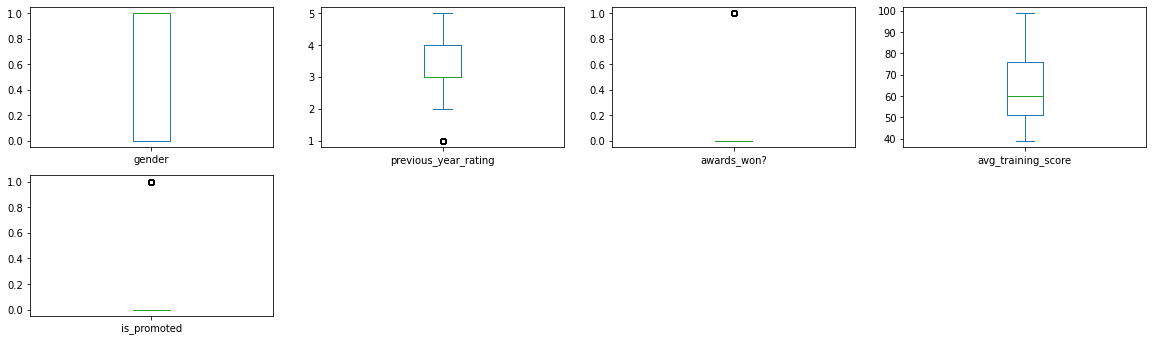

In [80]:
df.plot(kind='box', figsize=(20,15), subplots=True, layout=(5,4))
plt.show()

In [81]:
def check_outliers(df,col):
    Q1=df[col].describe()['25%']
    Q3=df[col].describe()['75%']
    IQR=Q3-Q1
    Upper_fence=Q3+(1.5*IQR)
    Lower_fence=Q1-(1.5*IQR)
    df_outliers=df[(df[col]<Lower_fence) | (df[col]>Upper_fence)]
    if len(df_outliers)==0:
        return 'Tidak Ada Outliers'
    else:
        return df_outliers

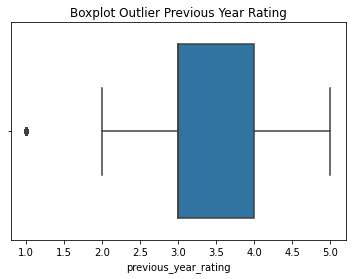

Total outlier pada kolom previous_year_rating : 5887
Total data awal: 48660
Persentase total outlier dari total data (%): 12.09823263460748


In [82]:
sns.boxplot(df['previous_year_rating'])
plt.title('Boxplot Outlier Previous Year Rating')
plt.show()
outliers_previous_year_rating=check_outliers(df,'previous_year_rating')
outliers_previous_year_rating.head()
print(f'Total outlier pada kolom previous_year_rating : {outliers_previous_year_rating.shape[0]}')
print(f'Total data awal: {df.shape[0]}')
print(f'Persentase total outlier dari total data (%): {(outliers_previous_year_rating.shape[0]/df.shape[0])*100}')

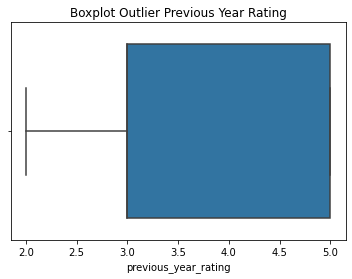

In [83]:
### Menghapus Outlier
df.drop(outliers_previous_year_rating.index,inplace=True)
sns.boxplot(df['previous_year_rating'])
plt.title('Boxplot Outlier Previous Year Rating')
plt.show()

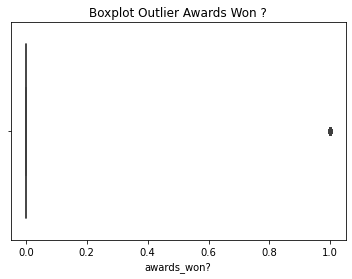

Total outlier pada kolom Awards Won ? : 1021
Total data awal: 42773
Persentase total outlier dari total data (%): 2.387019848970145


In [84]:
sns.boxplot(df['awards_won?'])
plt.title('Boxplot Outlier Awards Won ?')
plt.show()
outliers_awards_won=check_outliers(df,'awards_won?')
outliers_awards_won.head()
print(f'Total outlier pada kolom Awards Won ? : {outliers_awards_won.shape[0]}')
print(f'Total data awal: {df.shape[0]}')
print(f'Persentase total outlier dari total data (%): {(outliers_awards_won.shape[0]/df.shape[0])*100}')

#### **Machine Learning OverSampling**

In [85]:
model_machine_learning_os = [model_rl,model_dt,model_rf,model_xgb]

score_accuracy_mean_model_train_machinelearning_os = []
score_recall_mean_model_train_machinelearning_os = []
score_precision_mean_model_train_machinelearning_os = []
score_f1_mean_model_train_machinelearning_os = []

for i in model_machine_learning_os:
    cross_validation_classification_os = StratifiedKFold(n_splits=10)
    estimator_os = Pipeline([
        ('transformer',transformer),
        ('balancing',RandomOverSampler()),
        ('model_machine_learning',i)])

    model_crossval_acc_train_os = cross_val_score(estimator_os,X_train,y_train,cv=cross_validation_classification_os,scoring='accuracy')
    model_crossval_recall_train_os = cross_val_score(estimator_os,X_train,y_train,cv=cross_validation_classification_os,scoring='recall')
    model_crossval_precision_train_os = cross_val_score(estimator_os,X_train,y_train,cv=cross_validation_classification_os,scoring='precision')
    model_crossval_f1_train_os = cross_val_score(estimator_os,X_train,y_train,cv=cross_validation_classification_os,scoring='f1')
    
    score_accuracy_mean_model_train_machinelearning_os.append(model_crossval_acc_train_os.mean())
    score_recall_mean_model_train_machinelearning_os.append(model_crossval_recall_train_os.mean())
    score_precision_mean_model_train_machinelearning_os.append(model_crossval_precision_train_os.mean())
    score_f1_mean_model_train_machinelearning_os.append(model_crossval_f1_train_os.mean())
    
    print(model_crossval_acc_train_os,i)
    print(model_crossval_recall_train_os,i)
    print(model_crossval_precision_train_os,i)
    print(model_crossval_f1_train_os,i)

[0.88024655 0.88523628 0.88667058 0.88931298 0.88109219 0.88079859
 0.87903699 0.8766882  0.8772754  0.88578978] KNeighborsClassifier()
[0.34343434 0.34680135 0.36824324 0.32432432 0.31081081 0.31081081
 0.375      0.28378378 0.31756757 0.36486486] KNeighborsClassifier()
[0.321875   0.3410596  0.35973597 0.35036496 0.31292517 0.3161512
 0.32738095 0.29452055 0.30322581 0.3538961 ] KNeighborsClassifier()
[0.33550489 0.34563758 0.36363636 0.33684211 0.31292517 0.31133672
 0.34920635 0.28231293 0.30845771 0.35880399] KNeighborsClassifier()
[0.85529792 0.85353684 0.85085144 0.85349383 0.84732824 0.84820904
 0.84351145 0.85320023 0.83822666 0.85496183] DecisionTreeClassifier()
[0.43097643 0.43434343 0.45608108 0.4222973  0.41216216 0.43918919
 0.43918919 0.45608108 0.41891892 0.46959459] DecisionTreeClassifier()
[0.27708333 0.2790224  0.27777778 0.26211454 0.24369748 0.25311203
 0.27       0.27408994 0.25       0.29124236] DecisionTreeClassifier()
[0.35714286 0.34554974 0.33041302 0.3319615

In [86]:
model_machine_learning_os = [model_rl,model_dt,model_rf,model_xgb]

score_accuracy_mean_model_test_machinelearning_os = []
score_recall_mean_model_test_machinelearning_os = []
score_precision_mean_model_test_machinelearning_os = []
score_f1_mean_model_test_machinelearning_os = []

for i in model_machine_learning_os:
    cross_validation_classification_os = StratifiedKFold(n_splits=10)
    estimator_os = Pipeline([
        ('transformer',transformer),
        ('balancing',RandomOverSampler()),
        ('model_machine_learning',i)])

    model_crossval_acc_test_os = cross_val_score(estimator_os,X_test,y_test,cv=cross_validation_classification_os,scoring='accuracy')
    model_crossval_recall_test_os = cross_val_score(estimator_os,X_test,y_test,cv=cross_validation_classification_os,scoring='recall')
    model_crossval_precision_test_os = cross_val_score(estimator_os,X_test,y_test,cv=cross_validation_classification_os,scoring='precision')
    model_crossval_f1_test_os = cross_val_score(estimator_os,X_test,y_test,cv=cross_validation_classification_os,scoring='f1')
    
    score_accuracy_mean_model_test_machinelearning_os.append(model_crossval_acc_test_os.mean())
    score_recall_mean_model_test_machinelearning_os.append(model_crossval_recall_test_os.mean())
    score_precision_mean_model_test_machinelearning_os.append(model_crossval_precision_test_os.mean())
    score_f1_mean_model_test_machinelearning_os.append(model_crossval_f1_test_os.mean())
    
    print(model_crossval_acc_test_os,i)
    print(model_crossval_recall_test_os,i)
    print(model_crossval_precision_test_os,i)
    print(model_crossval_f1_test_os,i)

[0.87739726 0.8739726  0.8739726  0.87671233 0.85821918 0.86575342
 0.88424658 0.88082192 0.87731323 0.87457162] KNeighborsClassifier()
[0.39370079 0.35433071 0.38582677 0.37007874 0.32283465 0.2519685
 0.35433071 0.38582677 0.30708661 0.29133858] KNeighborsClassifier()
[0.32679739 0.29931973 0.31410256 0.32432432 0.25308642 0.23880597
 0.34615385 0.33333333 0.29770992 0.28244275] KNeighborsClassifier()
[0.35714286 0.32846715 0.34628975 0.34532374 0.28373702 0.23255814
 0.34749035 0.36029412 0.30232558 0.2890625 ] KNeighborsClassifier()
[0.88356164 0.86232877 0.85136986 0.85616438 0.86232877 0.8609589
 0.89109589 0.86917808 0.85195339 0.86771761] DecisionTreeClassifier()
[0.45669291 0.4488189  0.41732283 0.36220472 0.44094488 0.37795276
 0.43307087 0.43307087 0.42519685 0.35433071] DecisionTreeClassifier()
[0.35428571 0.2994012  0.26737968 0.27810651 0.26519337 0.25423729
 0.32544379 0.31382979 0.27777778 0.27564103] DecisionTreeClassifier()
[0.35483871 0.34       0.32679739 0.35254237

In [87]:
score_testing_os = pd.DataFrame({ 'Model': ['Model KNN Regressor', 'Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'Train Accuracy OS': score_accuracy_mean_model_train_machinelearning_os,
    'Test Accuracy OS': score_accuracy_mean_model_test_machinelearning_os,
    'Train Precision OS': score_accuracy_mean_model_train_machinelearning_os,
    'Test Precision OS': score_precision_mean_model_test_machinelearning_os,
    'Train Recall OS': score_recall_mean_model_train_machinelearning_os,
    'Test Recall OS': score_recall_mean_model_test_machinelearning_os,
    'Train F1 OS': score_f1_mean_model_train_machinelearning_os,
    'Test F1 OS': score_f1_mean_model_test_machinelearning_os})
print('Score Training dan Testing OS:')
score_testing_os.round(2).head()

Score Training dan Testing OS:


,Model,Train Accuracy OS,Test Accuracy OS,Train Precision OS,Test Precision OS,Train Recall OS,Test Recall OS,Train F1 OS,Test F1 OS
0,Model KNN Regressor,0.88,0.87,0.88,0.30,0.33,0.34,0.33,0.32
1,Model DecisionTree Regressor,0.85,0.87,0.85,0.29,0.44,0.41,0.33,0.34
2,Model RandomForest Regressor,0.87,0.89,0.87,0.38,0.43,0.40,0.36,0.38
3,Model XGBoost Regressor,0.82,0.84,0.82,0.29,0.59,0.53,0.37,0.37


In [88]:
score_testing_os = pd.DataFrame({ 'Model': ['Model KNN Regressor', 'Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'Test Accuracy': score_accuracy_mean_model_test_machinelearning,
    'Test Accuracy OS': score_accuracy_mean_model_test_machinelearning_os,
    'Test Precision': score_accuracy_mean_model_test_machinelearning,
    'Test Precision OS': score_precision_mean_model_test_machinelearning_os,
    'Test Recall': score_recall_mean_model_test_machinelearning,
    'Test Recall OS': score_recall_mean_model_test_machinelearning_os,
    'Test F1': score_f1_mean_model_test_machinelearning,
    'Test F1 OS': score_f1_mean_model_test_machinelearning_os})
print('Score Training dan Testing OS:')
score_testing_os.round(2).head()

Score Training dan Testing OS:


,Model,Test Accuracy,Test Accuracy OS,Test Precision,Test Precision OS,Test Recall,Test Recall OS,Test F1,Test F1 OS
0,Model KNN Regressor,0.92,0.87,0.92,0.30,0.19,0.34,0.30,0.32
1,Model DecisionTree Regressor,0.90,0.87,0.90,0.29,0.38,0.41,0.38,0.34
2,Model RandomForest Regressor,0.92,0.89,0.92,0.38,0.32,0.40,0.41,0.38
3,Model XGBoost Regressor,0.94,0.84,0.94,0.29,0.36,0.53,0.50,0.37


In [89]:
model_machine_learning_s = [model_rl,model_dt,model_rf,model_xgb]

score_accuracy_mean_model_train_machinelearning_s = []
score_recall_mean_model_train_machinelearning_s = []
score_precision_mean_model_train_machinelearning_s = []
score_f1_mean_model_train_machinelearning_s = []

for i in model_machine_learning_s:
    cross_validation_classification_s = StratifiedKFold(n_splits=5)
    estimator_s = Pipeline([
        ('transformer',transformer),
        ('balancing',SMOTE()),
        ('model_machine_learning',i)])

    model_crossval_acc_train_s = cross_val_score(estimator_s,X_train,y_train,cv=cross_validation_classification_s,scoring='accuracy')
    model_crossval_recall_train_s = cross_val_score(estimator_s,X_train,y_train,cv=cross_validation_classification_s,scoring='recall')
    model_crossval_precision_train_s = cross_val_score(estimator_s,X_train,y_train,cv=cross_validation_classification_s,scoring='precision')
    model_crossval_f1_train_s = cross_val_score(estimator_s,X_train,y_train,cv=cross_validation_classification_s,scoring='f1')
    
    score_accuracy_mean_model_train_machinelearning_s.append(model_crossval_acc_train_s.mean())
    score_recall_mean_model_train_machinelearning_s.append(model_crossval_recall_train_s.mean())
    score_precision_mean_model_train_machinelearning_s.append(model_crossval_precision_train_s.mean())
    score_f1_mean_model_train_machinelearning_s.append(model_crossval_f1_train_s.mean())
    
    print(model_crossval_acc_train_s,i)
    print(model_crossval_recall_train_s,i)
    print(model_crossval_precision_train_s,i)
    print(model_crossval_f1_train_s,i)

[0.778952   0.77396154 0.78523194 0.77554316 0.78126835] KNeighborsClassifier()
[0.5143339  0.50084317 0.45608108 0.5        0.52195946] KNeighborsClassifier()
[0.20160214 0.19087948 0.19087719 0.19146184 0.20469361] KNeighborsClassifier()
[0.29675573 0.28395062 0.27359919 0.27191749 0.29938418] KNeighborsClassifier()
[0.90195215 0.90268604 0.89445097 0.89900176 0.90193776] DecisionTreeClassifier()
[0.37268128 0.34738617 0.33445946 0.34628378 0.34797297] DecisionTreeClassifier()
[0.42023346 0.42268041 0.38446602 0.42454728 0.41060904] DecisionTreeClassifier()
[0.39927405 0.37316176 0.36230558 0.38068709 0.39317774] DecisionTreeClassifier()
[0.91765742 0.91707031 0.91103934 0.91514974 0.91294774] RandomForestClassifier()
[0.32546374 0.32546374 0.28378378 0.33445946 0.33445946] RandomForestClassifier()
[0.53684211 0.51612903 0.50439883 0.52356021 0.52043597] RandomForestClassifier()
[0.40618557 0.39375    0.35978836 0.40899796 0.4       ] RandomForestClassifier()
[0.94026127 0.93967415 0

In [90]:
model_machine_learning_s = [model_rl,model_dt,model_rf,model_xgb]

score_accuracy_mean_model_test_machinelearning_s = []
score_recall_mean_model_test_machinelearning_s = []
score_precision_mean_model_test_machinelearning_s = []
score_f1_mean_model_test_machinelearning_s = []

for i in model_machine_learning_s:
    cross_validation_classification_s = StratifiedKFold(n_splits=10)
    estimator_s = Pipeline([
        ('transformer',transformer),
        ('balancing',SMOTE()),
        ('model_machine_learning',i)])

    model_crossval_acc_test_s = cross_val_score(estimator_s,X_test,y_test,cv=cross_validation_classification_s,scoring='accuracy')
    model_crossval_recall_test_s = cross_val_score(estimator_s,X_test,y_test,cv=cross_validation_classification_s,scoring='recall')
    model_crossval_precision_test_s = cross_val_score(estimator_s,X_test,y_test,cv=cross_validation_classification_s,scoring='precision')
    model_crossval_f1_test_s = cross_val_score(estimator_s,X_test,y_test,cv=cross_validation_classification_s,scoring='f1')
    
    score_accuracy_mean_model_test_machinelearning_s.append(model_crossval_acc_test_s.mean())
    score_recall_mean_model_test_machinelearning_s.append(model_crossval_recall_test_s.mean())
    score_precision_mean_model_test_machinelearning_s.append(model_crossval_precision_test_s.mean())
    score_f1_mean_model_test_machinelearning_s.append(model_crossval_f1_test_s.mean())
    
    print(model_crossval_acc_test_s,i)
    print(model_crossval_recall_test_s,i)
    print(model_crossval_precision_test_s,i)
    print(model_crossval_f1_test_s,i)

[0.72876712 0.75616438 0.73561644 0.74520548 0.7260274  0.73972603
 0.75       0.74863014 0.74160384 0.74297464] KNeighborsClassifier()
[0.5984252  0.51968504 0.57480315 0.52755906 0.51181102 0.51968504
 0.53543307 0.55905512 0.51181102 0.46456693] KNeighborsClassifier()
[0.18632075 0.18428184 0.18461538 0.1878453  0.16582915 0.15561224
 0.17597765 0.17179487 0.16129032 0.16129032] KNeighborsClassifier()
[0.28308824 0.27755102 0.26335878 0.27254509 0.25891182 0.24418605
 0.27402863 0.27952756 0.24254473 0.24144869] KNeighborsClassifier()
[0.8890411  0.89041096 0.89589041 0.88013699 0.87739726 0.88287671
 0.89589041 0.89178082 0.88827964 0.88074023] DecisionTreeClassifier()
[0.36220472 0.37007874 0.34645669 0.29133858 0.34645669 0.2992126
 0.37007874 0.34645669 0.25984252 0.29133858] DecisionTreeClassifier()
[0.40350877 0.38842975 0.39495798 0.36134454 0.33333333 0.31858407
 0.3984375  0.3671875  0.32038835 0.3364486 ] DecisionTreeClassifier()
[0.37007874 0.36213992 0.36595745 0.3571428

In [91]:
score_testing_all_model = pd.DataFrame({ 'Model': ['Model KNN Regressor', 'Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'Test Acc': score_accuracy_mean_model_test_machinelearning,
    'Test Acc OS': score_accuracy_mean_model_test_machinelearning_os,
    'Test Acc S': score_accuracy_mean_model_test_machinelearning_s,
    'Test Pr': score_accuracy_mean_model_test_machinelearning,
    'Test Pr OS': score_precision_mean_model_test_machinelearning_os,
    'Test Pr S': score_precision_mean_model_test_machinelearning_s,
    'Test R': score_recall_mean_model_test_machinelearning,
    'Test R OS': score_recall_mean_model_test_machinelearning_os,
    'Test R S': score_recall_mean_model_test_machinelearning_s,
    'Test F1': score_f1_mean_model_test_machinelearning,
    'Test F1 OS': score_f1_mean_model_test_machinelearning_os,
    'Test F1 S': score_f1_mean_model_test_machinelearning_s})
print('Score Testing Non OS & S , Testing OS & Testing S:')
score_testing_all_model.round(2).head()

Score Testing Non OS & S , Testing OS & Testing S:


,Model,Test Acc,Test Acc OS,Test Acc S,Test Pr,Test Pr OS,Test Pr S,Test R,Test R OS,Test R S,Test F1,Test F1 OS,Test F1 S
0,Model KNN Regressor,0.92,0.87,0.74,0.92,0.30,0.17,0.19,0.34,0.53,0.30,0.32,0.26
1,Model DecisionTree Regressor,0.90,0.87,0.89,0.90,0.29,0.36,0.38,0.41,0.33,0.38,0.34,0.35
2,Model RandomForest Regressor,0.92,0.89,0.91,0.92,0.38,0.50,0.32,0.40,0.31,0.41,0.38,0.38
3,Model XGBoost Regressor,0.94,0.84,0.94,0.94,0.29,0.83,0.36,0.53,0.36,0.50,0.37,0.50


In [92]:
score_testing_all_model[['Model','Test F1','Test F1 OS','Test F1 S']].round(2)

,Model,Test F1,Test F1 OS,Test F1 S
0,Model KNN Regressor,0.30,0.32,0.26
1,Model DecisionTree Regressor,0.38,0.34,0.35
2,Model RandomForest Regressor,0.41,0.38,0.38
3,Model XGBoost Regressor,0.50,0.37,0.50


- Dari seluruh model machine learning dari tabel di atas dapat dilihat kalau `Model XGBoost Regressor` memiliki skor tertinggi pada Test F1 sebelum dilakukan Oversampling dan Smote, sehingga untuk base model yang akan digunakan untuk tuning adalah Model XGBoost Regressor yang tidak dilakukan Oversampling dan Smote.

#### **Hyperparameter Tuning**

In [93]:
model_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [94]:
pipe_XGB = Pipeline([
    ('prep', transformer),
    ('balancing', SMOTE()),
    ('algo', XGBClassifier())
])

param_XGB = {
    "algo__n_estimators" : np.arange(400, 601, 50),
    "algo__max_depth" : np.arange(1, 12),
    "algo__learning_rate" : np.logspace(-3, 0, 4),
    "algo__gamma" : np.logspace(-3, 0, 6),
    "algo__colsample_bytree" : [0.3, 0.5, 0.7, 0.8],
    "algo__subsample" : [0.3, 0.5, 0.7, 0.8],
    "algo__reg_alpha" : np.logspace(-5, 3, 7),
    "algo__reg_lambda" : np.logspace(-5, 3, 7)
}


In [95]:
skfold = StratifiedKFold(n_splits=5)

In [96]:
RS_XGB = RandomizedSearchCV(
    pipe_XGB, 
    param_distributions = param_XGB,
    n_iter = 200,
    cv = skfold, 
    scoring = ['f1'], 
    n_jobs = -1,
    refit = 'f1')


In [97]:
RS_XGB.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['department',
                                                                                'education',
                                                                                'recruitment_channel',
                                                                                'avg_training_score_range',
                                                                                'awards_won?',
                                                                                'previous_year_rating']),
                                                                              ('binary',
                                                                               BinaryEncoder(),...
                                        'algo__n_estimators': array([400, 450, 500, 550, 600]),
                                        'algo__reg_alpha': array([1.00000000e-05, 2.15443469e-04, 4.64158883e-03, 1.00000000e-01,
       2.15443469e+00, 4.64158883e+01, 1.00000000e+03]),
                                        'algo__reg_lambda': array([1.00000000e-05, 2.15443469e-04, 4.64158883e-03, 1.00000000e-01,
       2.15443469e+00, 4.64158883e+01, 1.00000000e+03]),
                                        'algo__subsample': [0.3, 0.5, 0.7,
                                                            0.8]},
                   refit='f1', scoring=['f1'])

In [98]:
RS_XGB.best_params_

{'algo__subsample': 0.7,
 'algo__reg_lambda': 0.00021544346900318823,
 'algo__reg_alpha': 0.00021544346900318823,
 'algo__n_estimators': 500,
 'algo__max_depth': 5,
 'algo__learning_rate': 0.1,
 'algo__gamma': 0.001,
 'algo__colsample_bytree': 0.8}

In [99]:
RS_XGB.best_score_

0.5100609339244673

In [100]:
pipe_XGB = Pipeline([
    ('prep', transformer),
    ('algo', XGBClassifier())
])
pipe_XGB.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['department', 'education',
                                                   'recruitment_channel',
                                                   'avg_training_score_range',
                                                   'awards_won?',
                                                   'previous_year_rating']),
                                                 ('binary', BinaryEncoder(),
                                                  ['region'])])),
                ('algo',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsampl...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [101]:
best_model = RS_XGB.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['department', 'education',
                                                   'recruitment_channel',
                                                   'avg_training_score_range',
                                                   'awards_won?',
                                                   'previous_year_rating']),
                                                 ('binary', BinaryEncoder(),
                                                  ['region'])])),
                ('balancing', SMOTE()),
                ('algo',
                 XGBClassifier(base_score=0.5, booster='gbtree', c...
                               gamma=0.001, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=500, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0,
                               reg_alpha=0.00021544346900318823,
                               reg_lambda=0.00021544346900318823, ...))])

In [102]:
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

In [103]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGB : \n', report_default)
print('Classification Report Tuned XGB : \n', report_tuned)

Classification Report Default XGB : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     13328
           1       0.90      0.35      0.51      1270

    accuracy                           0.94     14598
   macro avg       0.92      0.67      0.74     14598
weighted avg       0.94      0.94      0.93     14598

Classification Report Tuned XGB : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     13328
           1       0.90      0.36      0.51      1270

    accuracy                           0.94     14598
   macro avg       0.92      0.68      0.74     14598
weighted avg       0.94      0.94      0.93     14598



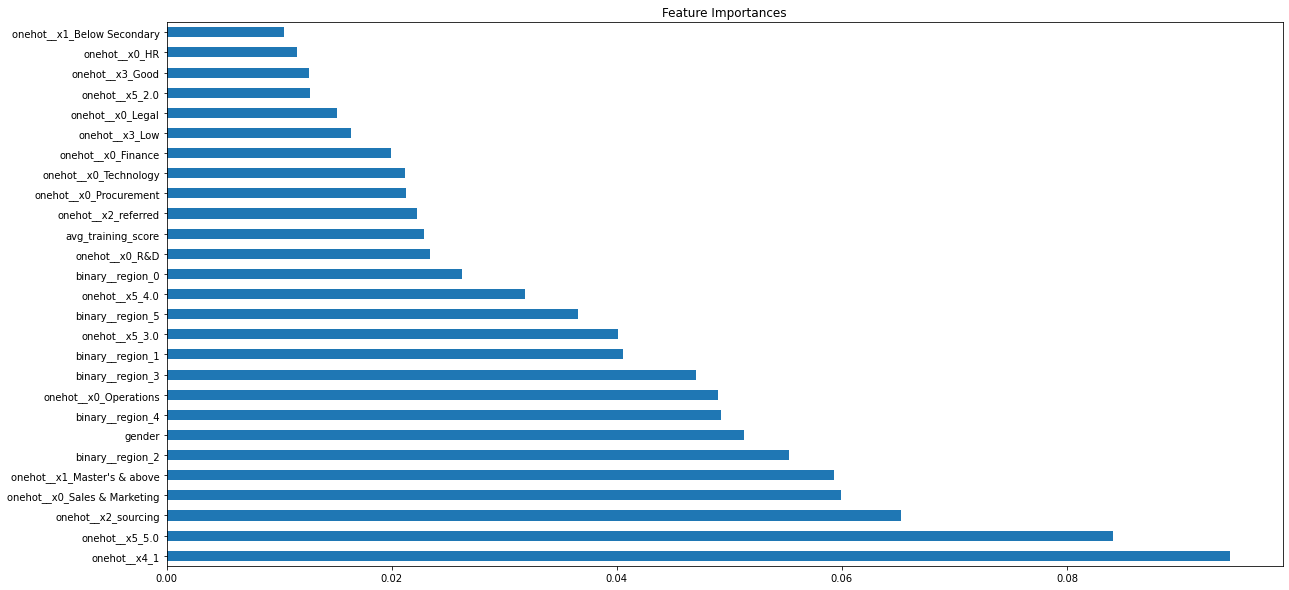

In [107]:
coef1 = pd.Series(best_model['algo'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
coef1.plot(kind='barh', figsize=(20,10),title='Feature Importances')
plt.show()

Terlihat bahwa ternyata untuk Model XGB fitur / kolom yang paling berpengaruh ada pada kolom rating kinerja karyawan yang mana rating terbanyak ada pada rating 4 dan 5. selanjutnya diikuti channel karyawan direkrut, departement karyawan, pendidikan karyawan dan sebagainya.

Secara garis besar, model kita melihat kolom previous year rating merupakan fitur yang sangat penting dibandingkan fitur lainnya, bahkan fitur/kolom avg_training_score berada pada urutan ke 18. Ini dapat menunjukkan bahwa hasil training belum sepenuhnya menentukan pegawai akan dipromosi. Nantinya, kita dapat lebih fokus menentukan kenaikan jabatan untuk pegawai di masing - masing department. Sehingga setiap pegawai di masing-masing department memiliki kesempatan yang sama dalam proses kenaikan jabatan.

In [109]:
best_model[0]

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['department', 'education',
                                  'recruitment_channel',
                                  'avg_training_score_range', 'awards_won?',
                                  'previous_year_rating']),
                                ('binary', BinaryEncoder(), ['region'])])

In [110]:
best_model[1]

SMOTE()

In [111]:
best_model[2]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.001, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.00021544346900318823,
              reg_lambda=0.00021544346900318823, ...)

#### **KESIMPULAN**

1. Total karyawan yang akan di promosikan berjumlah 4.232 atau setara dengan 9% dari total keseluruhan karyawan.
2. Karyawan paling banyak berasal dari departement sales dan marketing serta dari departement ini banyak karyawan yang mendapatkan promosi.
3. Banyak karyawan yang dipromosikan dari rating terbaik yaitu rating 5 yang paling banyak berasal dari departement Operations dan department Sales & marketing.
4. Karyawan yang mendapatkan promosi berasal dari gelar sarjana / Bachelor's
5. Paling banyak karyawan laki-laki yang mendapatkan promosi sebanyak 6% dari total keseluruhan karyawan yang di promosi dan yang tidak dapat promosi.
6. Umur paling banyak karyawan yang mendapatkan promosi berasal dari umur 29 tahun sampai dengan 34 tahun.
7. Karyawan yang dapat promosi paling banyak yang tidak pernah mendapatkan penghargaan sebanyak 8% dari pada karyawan yang mendapatkan penghargaan hanya 1%.
8. Karyawan yang memiliki skor training `exellent` paling banyak mendapatkan promosi dari keseluruhan karyawan yang di promosikan.
9. Dengan menggunakan model Machine Learning kita dapat melakukan penghematan waktu dengan menyaring terlebih dahulu pegawai yang akan direkomendasikan untuk dipromosi. hal ini dapat dilihat dari classification report dengan nilai precision sebesar 0.90 pada class positive. yang berarti model memiliki ketepatan sebesar 81% dalam menyaring pegawai yang sebenarnya akan dipromosi. Dengan nilai recall sebesar 0.99 pada kelas negative, artinya model dapat dapat memprediksi hingga 99% untuk pegawai yang tidak akan dipromosi dari keseluruhan pegawai yang tebakannnya benar, dengan ketepatan (precision) prediksinya sebesar 0.94. Ini berarti model dapat menebak pegawai mana yang tidak untuk dipromosikan dengan ketepatan mencapai 94%. Artinya dari 100 pegawai yang tidak dipromosikan, model dapat menebak 94 pegawai. Dengan nilai recall pada kelas positive yang hanya sebesar 0.36. Model hanya dapat menebak sebesar 36% dari keseluruhan pegawai yang benar tebakannya. Ini mengakibatkan konsekuensi semakin sedikitnya pegawai potensial yang akan direkomendasikan.


10. Tanpa menggunakan model, dengan asumsi pengecekan dokumen seorang pegawai berkisar 5 menit.
Maka apabila terdapat 1000 pegawai yang akan diperiksa secara keseluruhan dengan cara manual, dibutuhkan waktu selama 5000 menit. Sedangkan dengan menggunakan model, kita dapat menyaring dari 1000 pegawai. 
Kita akan mendapatkan, ketepatan rata-rata hingga 92% (macro avg precision) dalam menyaring pegawai. Artinya model dapat menghemat waktu hingga 92% (4.600 menit) dari total keseluruhan. Dengan menggunakan model, setidaknya model dapat mengklasifikasikan hingga 36% (recall positive) pegawai akan rekomendasikan untuk promosi dari total pegawai yang telah diprediksi secara benar.

#### **SARAN**

- **Proses Identifikasi** : Proses identifikasi untuk karyawan yang akan di lakukan training untuk promosi jabatan dapat dilakukan pada semua department yang ada di perusahaan dengan persyaratan rating KPI Karyawan masuk dalam skor 3 / Good.
-  **Proses Latihan dan Evaluasi** : Saat proses training perusahaan dapat memfokuskan / menyaring karyawan yang mendapatkan skor training di atas 60 atau masuk dalam kategori excellent.
-  **Prediksi Karyawan DiPromosi** : Setelah karyawan dilakukan identifikasi dan latihan serta evaluasi terhadap skor karyawan maka Perusahaan dapat menggunakan mesin learning untuk melakukan prediksi karyawan mana saja yang akan di promosikan dan karyawan yang belum bisa di promosikan. Pada hal ini yang menjadi fokus penilaian dan pertimbangan pada saat menggunakan mechine learning ada pada Skor `KPI Karyawan` **,** `Karyawan dipromosikan sesuai dengan Departement bekerja` **,** `Pendidikan minimal sarjana / bachelor` dan `Skor Training`.